# JuMP - Julia for Mathematial Programming
# @ SBPO (Brazilian Operations Research Society Meeting)
### Fortaleza, Ceara, Brazil
### November 4 to 5, 2024

Open http://colab.research.google.com/ and import the `notebook_sbpo.ipynb` by providing the link to the GitHub repository:

https://github.com/joaquimg/SBPO2024
Install Julia
Click "Connect" in the top-right corner.

You will get a warning that the kernel julia-1.x (for some x) is not recognized, defaulting to python3. This is because Julia is not officially supported by Google Colab.

To install Julia, create a new code cell at the top of the notebook,

Run this cell once

In [1]:
# %%shell
# set -x

# wget -nv https://julialang-s3.julialang.org/bin/linux/x64/1.8/julia-1.8.5-linux-x86_64.tar.gz -O /tmp/julia.tar.gz
# tar -xzf /tmp/julia.tar.gz -C /usr/local/ --strip-components 1
# rm /tmp/julia.tar.gz

Then refresh the page... and run this cell once

In [2]:
# import Downloads, Pkg
# Downloads.download("https://raw.githubusercontent.com/joaquimg/SBPO2024/main/Project.toml", "/tmp/Project.toml")
# Pkg.activate("/tmp/Project.toml")
# Pkg.instantiate()  # Can take ~ 7 minutes

If you have cloned the repo and is running locally, you can do:

In [3]:
cd(@__DIR__)
using Pkg
Pkg.activate(".")

  Activating project at `c:\JG\SBPO2024`


### **Note**

This notebook was based on https://github.com/odow/SESO2023/

---

# Getting started with Julia

Because JuMP is embedded in Julia, knowing some basic Julia is important
before you start learning JuMP.

**Tip**
    This tutorial is designed to provide a minimalist crash course in the
    basics of Julia. You can find resources that provide a more comprehensive
    introduction to Julia [here](https://julialang.org/learning/).

More material can be found at:
* Julia workflows: https://modernjuliaworkflows.org/
* Advanced Scientific Computing in Julia: https://www.youtube.com/watch?v=x4oi0IKf52w&list=PL-G47MxHVTewUm5ywggLvmbUCNOD2RbKA&ab_channel=TimHoly
* Julia tutorials by Abel: https://www.youtube.com/watch?v=o6H-J0Vu2uo&list=PLOOY0eChA1uwYXUGnF0FZBuiYQjgQffPu&ab_channel=AbelSiqueira
* Julia and JuMP tutorials by Abel [in portuguese]: https://www.youtube.com/watch?v=v1hJsmMqpvw&list=PLOOY0eChA1uyjKRQDeR4-LfsObNqslIUh&index=10&ab_channel=AbelSiqueira

## Installing Julia

To install Julia, [download the latest stable release](https://julialang.org/downloads/),
then follow the [platform specific install instructions](https://julialang.org/downloads/platform/).

Alternatively, consider using the command line tool: [juliaup](https://github.com/JuliaLang/juliaup)

*Windows*:
`winget install julia -s msstore`

*Mac / Linux*:
`curl -fsSL https://install.julialang.org | sh`

**Tip**
    Unless you know otherwise, you probably want the 64-bit version.

## IDEs

Next, you need an IDE to develop in. VS Code is a popular choice, so follow
[these install instructions](https://www.julia-vscode.org/docs/stable/gettingstarted/).

Julia can also be used with [Jupyter notebooks](https://github.com/JuliaLang/IJulia.jl)
or the reactive notebooks of [Pluto.jl](https://github.com/fonsp/Pluto.jl).

## The Julia REPL

The main way of interacting with Julia is via its REPL (Read Evaluate Print
Loop). To access the REPL, start the Julia executable to arrive at the
`julia>` prompt, and then start coding:

In [4]:
1 + 1

2

As your programs become larger, write a script as a text file, and then run
that file using:
```julia
julia> include("path/to/file.jl")
```

**Warning**
    Because of Julia's startup latency, running scripts from the command line
    like the following is slow:
    ```
    $ julia path/to/file.jl
    ```
    Use the REPL or a notebook instead, and read The "time-to-first-solve" issue
    for more information.

### Code blocks in this documentation

In this documentation you'll see a mix of code examples with and without the
`julia>`.

The Julia prompt is mostly used to demonstrate short code snippets, and the
output is exactly what you will see if run from the REPL.

Blocks without the `julia>` can be copy-pasted into the REPL, but they are
used because they enable richer output like plots or LaTeX to be displayed in
the online and [PDF](https://jump.dev/JuMP.jl/stable/JuMP.pdf) versions of the
documentation. If you run them from the REPL you may see different output.

## Where to get help

 * Read the documentation
   * JuMP [https://jump.dev/JuMP.jl/stable/](https://jump.dev/JuMP.jl/stable/)
   * Julia [https://docs.julialang.org/en/v1/](https://docs.julialang.org/en/v1/)
 * Ask (or browse) the Julia community forum: [https://discourse.julialang.org](https://discourse.julialang.org)
   * If the question is JuMP-related, ask in the [Optimization (Mathematical)](https://discourse.julialang.org/c/domain/opt/13)
     section, or tag your question with "jump"

To access the built-in help at the REPL, type `?` to enter help-mode, followed
by the name of the function to lookup:
```julia
help?> print
search: print println printstyled sprint isprint prevind parentindices precision escape_string

  print([io::IO], xs...)

  Write to io (or to the default output stream stdout if io is not given) a canonical
  (un-decorated) text representation. The representation used by print includes minimal formatting
  and tries to avoid Julia-specific details.

  print falls back to calling show, so most types should just define show. Define print if your
  type has a separate "plain" representation. For example, show displays strings with quotes, and
  print displays strings without quotes.

  string returns the output of print as a string.

  Examples
  ≡≡≡≡≡≡≡≡≡≡

  julia> print("Hello World!")
  Hello World!
  julia> io = IOBuffer();

  julia> print(io, "Hello", ' ', :World!)

  julia> String(take!(io))
  "Hello World!"
```

## Numbers and arithmetic

Since we want to solve optimization problems, we're going to be using a lot of
math. Luckily, Julia is great for math, with all the usual operators:

In [5]:
1 + 1
1 - 2
2 * 2
4 / 5
3^2

9

Did you notice how Julia didn't print `.0` after some of the numbers? Julia is
a dynamic language, which means you never have to explicitly declare the type
of a variable. However, in the background, Julia is giving each variable a
type. Check the type of something using the `typeof` function:

In [6]:
typeof(1)
typeof(1.0)

Float64

Here `1` is an `Int64`, which is an integer with 64 bits of precision, and
`1.0` is a `Float64`, which is a floating point number with 64-bits of
precision.

**Tip**
    If you aren't familiar with floating point numbers, make sure to read
    the Floating point numbers section.

We create complex numbers using `im`:

In [7]:
x = 2 + 1im
real(x)
imag(x)
typeof(x)
x * (1 - 2im)

4 - 3im

**Info**
    The curly brackets surround what we call the _parameters_ of a type. You
    can read `Complex{Int64}`  as "a complex number, where the real and
    imaginary parts are represented by `Int64`." If we call
    `typeof(1.0 + 2.0im)` it will be `Complex{Float64}`, which a complex
    number with the parts represented by `Float64`.

There are also some cool things like an irrational representation of π.

In [8]:
π

π = 3.1415926535897...

**Tip**
    To make π (and most other Greek letters), type `\pi` and then press
    `[TAB]`.

In [9]:
typeof(π)

Irrational{:π}

However, if we do math with irrational numbers, they get converted to
`Float64`:

In [10]:
typeof(2π / 3)

Float64

### Floating point numbers

**Warning**
    If you aren't familiar with floating point numbers, make sure to read this
    section carefully.

A `Float64` is a [floating point](https://en.wikipedia.org/wiki/Floating-point_arithmetic)
approximation of a real number using 64-bits of information.

Because it is an approximation, things we know hold true in mathematics don't
hold true in a computer. For example:

In [11]:
0.1 * 3 == 0.3

false

A more complicated example is:

In [12]:
sin(2π / 3) == √3 / 2

false

**Tip**
    Get `√` by typing `\sqrt` then press `[TAB]`.

Let's see what the differences are:

In [13]:
0.1 * 3 - 0.3
sin(2π / 3) - √3 / 2

1.1102230246251565e-16

They are small, but not zero.

One way of explaining this difference is to consider how we would write
`1 / 3` and `2 / 3` using only four digits after the decimal point. We would
write `1 / 3` as `0.3333`, and `2 / 3` as `0.6667`. So, despite the fact that
`2 * (1 / 3) == 2 / 3`, `2 * 0.3333 == 0.6666 != 0.6667`.

Let's try that again using ≈ (`\approx + [TAB]`) instead of `==`:

In [14]:
0.1 * 3 ≈ 0.3
sin(2π / 3) ≈ √3 / 2

true

`≈` is a clever way of calling the `isapprox` function:

In [15]:
isapprox(sin(2π / 3), √3 / 2; atol = 1e-8)

true

**Warning**
    Floating point is the reason solvers use tolerances when they solve
    optimization models. A common mistake you're likely to make is checking
    whether a binary variable is 0 using `value(z) == 0`. Always remember to
    use something like `isapprox` when comparing floating point numbers.

Note that `isapprox` will always return `false` if one of the number being
compared is `0` and `atol` is zero (its default value).

In [16]:
1e-300 ≈ 0.0

false

so always set a nonzero value of `atol` if one of the arguments can be zero.

In [17]:
isapprox(1e-9, 0.0; atol = 1e-8)

true

**Tip**
    Gurobi has a [good series of articles](https://www.gurobi.com/documentation/9.0/refman/num_grb_guidelines_for_num.html)
    on the implications of floating point in optimization if you want to read
    more.

If you aren't careful, floating point arithmetic can throw up all manner of
issues. For example:

In [18]:
1 + 1e-16 == 1

true

It even turns out that floating point numbers aren't associative:

In [19]:
(1 + 1e-16) - 1e-16 == 1 + (1e-16 - 1e-16)

false

It's important to note that this issue isn't Julia-specific. It happens in
every programming language (try it out in Python).

## Vectors, matrices, and arrays

Similar to MATLAB, Julia has native support for vectors, matrices and tensors;
all of which are represented by arrays of different dimensions. Vectors are
constructed by comma-separated elements surrounded by square brackets:

In [20]:
b = [5, 6]

2-element Vector{Int64}:
 5
 6

Matrices can be constructed with spaces separating the columns, and semicolons
separating the rows:

In [21]:
A = [1.0 2.0; 3.0 4.0]

2×2 Matrix{Float64}:
 1.0  2.0
 3.0  4.0

We can do linear algebra:

In [22]:
x = A \ b

2-element Vector{Float64}:
 -3.9999999999999987
  4.499999999999999

**Info**
    Here is floating point at work again; `x` is approximately `[-4, 4.5]`.

In [23]:
A * x
A * x ≈ b

true

Note that when multiplying vectors and matrices, dimensions matter. For
example, you can't multiply a vector by a vector:

In [24]:
try
    b * b
catch err
    showerror(stderr, err)
end

MethodError: no method matching *(::Vector{Int64}, ::Vector{Int64})

Closest candidates are:
  *(::Any, ::Any, ::Any, ::Any...)
   @ Base operators.jl:587
  *(::LinearAlgebra.AbstractQ, ::AbstractVector)
   @ LinearAlgebra C:\JG\Julia\juliaup\julia-1.10.5+0.x64.w64.mingw32\share\julia\stdlib\v1.10\LinearAlgebra\src\abstractq.jl:172
  *(::LinearAlgebra.AbstractRotation, ::AbstractVector)
   @ LinearAlgebra C:\JG\Julia\juliaup\julia-1.10.5+0.x64.w64.mingw32\share\julia\stdlib\v1.10\LinearAlgebra\src\givens.jl:12
  ...


But multiplying transposes works:

In [25]:
b' * b
b * b'

2×2 Matrix{Int64}:
 25  30
 30  36

## Other common types

### Comments

Although not technically a type, code comments begin with the `#` character:

In [26]:
1 + 1  # This is a comment

2

Multiline comments begin with `#=` and end with `=#`:
```julia
#=
Here is a
multiline comment
=#
```

Comments can even be nested inside expressions. This is sometimes helpful when
documenting inputs to functions:

In [27]:
isapprox(
    sin(π),
    0.0;
    #= We need an explicit atol here because we are comparing with 0 =#
    atol = 0.001,
)

true

### Strings

Double quotes are used for strings:

In [28]:
typeof("This is Julia")

String

Unicode is fine in strings:

In [29]:
typeof("π is about 3.1415")

String

Use `println` to print a string:

In [30]:
println("Hello, World!")

Hello, World!


Use `$()` to interpolate values into a string:

In [31]:
x = 123
println("The value of x is: $(x)")

The value of x is: 123


Use triple-quotes for multiline strings:

In [32]:
s = """
Here is
a
multiline string
"""

println(s)

Here is
a
multiline string



### Symbols

Julia `Symbol`s are a data structure from the compiler that represent Julia
identifiers (that is, variable names).

In [33]:
println("The value of x is: $(eval(:x))")

The value of x is: 123


**Warning**
    We used `eval` here to demonstrate how Julia links `Symbol`s to variables.
    However, avoid calling `eval` in your code. It is usually a sign that your
    code is doing something that could be more easily achieved a different
    way. The [Community Forum](https://jump.dev/forum) is a good place to ask
    for advice on alternative approaches.

In [34]:
typeof(:x)

Symbol

You can think of a `Symbol` as a `String` that takes up less memory, and that
can't be modified.

Convert between `String` and `Symbol` using their constructors:

In [35]:
String(:abc)
Symbol("abc")

:abc

**Tip**
    `Symbol`s are often (ab)used to stand in for a `String` or an `Enum`, when
    one of the latter is likely a better choice. The JuMP Style guide
    recommends reserving `Symbol`s for identifiers. See @enum vs. Symbol
    for more.

### Tuples

Julia makes extensive use of a simple data structure called Tuples. Tuples are
immutable collections of values. For example:

In [36]:
t = ("hello", 1.2, :foo)
typeof(t)

Tuple{String, Float64, Symbol}

Tuples can be accessed by index, similar to arrays:

In [37]:
t[2]

1.2

And they can be "unpacked" like so:

In [38]:
a, b, c = t
b

1.2

The values can also be given names, which is a convenient way of making
light-weight data structures.

In [39]:
t = (word = "hello", num = 1.2, sym = :foo)

(word = "hello", num = 1.2, sym = :foo)

Values can be accessed using dot syntax:

In [40]:
t.word

"hello"

## Dictionaries

Similar to Python, Julia has native support for dictionaries. Dictionaries
provide a very generic way of mapping keys to values.  For example, a map of
integers to strings:

In [41]:
d1 = Dict(1 => "A", 2 => "B", 4 => "D")

Dict{Int64, String} with 3 entries:
  4 => "D"
  2 => "B"
  1 => "A"

**Info**
    Type-stuff again: `Dict{Int64,String}` is a dictionary with `Int64` keys
    and `String` values.

Looking up a value uses the bracket syntax:

In [42]:
d1[2]

"B"

Dictionaries support non-integer keys and can mix data types:

In [43]:
Dict("A" => 1, "B" => 2.5, "D" => 2 - 3im)

Dict{String, Number} with 3 entries:
  "B" => 2.5
  "A" => 1
  "D" => 2-3im

**Info**
    Julia types form a hierarchy. Here the value type of the dictionary is
    `Number`, which is a generalization of `Int64`, `Float64`, and
    `Complex{Int}`. Leaf nodes in this hierarchy are called "concrete" types,
    and all others are called "Abstract." In general, having variables with
    abstract types like `Number` can lead to slower code, so you should try to
    make sure every element in a dictionary or vector is the same type. For
    example, in this case we could represent every element as a
    `Complex{Float64}`:

In [44]:
Dict("A" => 1.0 + 0.0im, "B" => 2.5 + 0.0im, "D" => 2.0 - 3.0im)

Dict{String, ComplexF64} with 3 entries:
  "B" => 2.5+0.0im
  "A" => 1.0+0.0im
  "D" => 2.0-3.0im

Dictionaries can be nested:

In [45]:
d2 = Dict("A" => 1, "B" => 2, "D" => Dict(:foo => 3, :bar => 4))
d2["B"]
d2["D"][:foo]

3

## Structs

You can define custom datastructures with `struct`:

In [46]:
struct MyStruct
    x::Int
    y::String
    z::Dict{Int,Int}
end

a = MyStruct(1, "a", Dict(2 => 3))
a.x

1

By default, these are not mutable

In [47]:
try
    a.x = 2
catch err
    showerror(stderr, err)
end

setfield!: immutable struct of type MyStruct cannot be changed

However, you can declare a `mutable struct` which is mutable:

In [48]:
mutable struct MyStructMutable
    x::Int
    y::String
    z::Dict{Int,Int}
end

a = MyStructMutable(1, "a", Dict(2 => 3))
a.x
a.x = 2
a

MyStructMutable(2, "a", Dict(2 => 3))

## Loops

Julia has native support for for-each style loops with the syntax
`for <value> in <collection> end`:

In [49]:
for i in 1:5
    println(i)
end

1
2
3
4
5


**Info**
    Ranges are constructed as `start:stop`, or `start:step:stop`.

In [50]:
for i in 1.2:1.1:5.6
    println(i)
end

1.2
2.3
3.4
4.5
5.6


This for-each loop also works with dictionaries:

In [51]:
for (key, value) in Dict("A" => 1, "B" => 2.5, "D" => 2 - 3im)
    println("$(key): $(value)")
end

B: 2.5
A: 1
D: 2 - 3im


Note that in contrast to vector languages like MATLAB and R, loops do not
result in a significant performance degradation in Julia.

## Control flow

Julia control flow is similar to MATLAB, using the keywords
`if-elseif-else-end`, and the logical operators `||` and `&&` for **or** and
**and** respectively:

In [52]:
for i in 0:5:15
    if i < 5
        println("$(i) is less than 5")
    elseif i < 10
        println("$(i) is less than 10")
    else
        if i == 10
            println("the value is 10")
        else
            println("$(i) is bigger than 10")
        end
    end
end

0 is less than 5
5 is less than 10
the value is 10
15 is bigger than 10


## Comprehensions

Similar to languages like Haskell and Python, Julia supports the use of simple
loops in the construction of arrays and dictionaries, called comprehensions.

A list of increasing integers:

In [53]:
[i for i in 1:5]

5-element Vector{Int64}:
 1
 2
 3
 4
 5

Matrices can be built by including multiple indices:

In [54]:
[i * j for i in 1:5, j in 5:10]

5×6 Matrix{Int64}:
  5   6   7   8   9  10
 10  12  14  16  18  20
 15  18  21  24  27  30
 20  24  28  32  36  40
 25  30  35  40  45  50

Conditional statements can be used to filter out some values:

In [55]:
[i for i in 1:10 if i % 2 == 1]

5-element Vector{Int64}:
 1
 3
 5
 7
 9

A similar syntax can be used for building dictionaries:

In [56]:
Dict("$(i)" => i for i in 1:10 if i % 2 == 1)

Dict{String, Int64} with 5 entries:
  "1" => 1
  "5" => 5
  "7" => 7
  "9" => 9
  "3" => 3

## Functions

A simple function is defined as follows:

In [57]:
function print_hello()
    return println("hello")
end
print_hello()

hello


Arguments can be added to a function:

In [58]:
function print_it(x)
    return println(x)
end
print_it("hello")
print_it(1.234)
print_it(:my_id)

hello
1.234
my_id


Optional keyword arguments are also possible:

In [59]:
function print_it(x; prefix = "value:")
    return println("$(prefix) $(x)")
end
print_it(1.234)
print_it(1.234; prefix = "val:")

value: 1.234
val: 1.234


The keyword `return` is used to specify the return values of a function:

In [60]:
function mult(x; y = 2.0)
    return x * y
end

mult(4.0)
mult(4.0; y = 5.0)

20.0

### Anonymous functions

The syntax `input -> output` creates an anonymous function. These are most
useful when passed to other functions. For example:

In [61]:
f = x -> x^2
f(2)
map(x -> x^2, 1:4)

4-element Vector{Int64}:
  1
  4
  9
 16

### Type parameters

We can constrain the inputs to a function using type parameters, which are
`::` followed by the type of the input we want. For example:

In [62]:
function foo(x::Int)
    return x^2
end

function foo(x::Float64)
    return exp(x)
end

function foo(x::Number)
    return x + 1
end

foo(2)
foo(2.0)
foo(1 + 1im)

2 + 1im

But what happens if we call `foo` with something we haven't defined it for?

In [63]:
try
    foo([1, 2, 3])
catch err
    showerror(stderr, err)
end

MethodError: no method matching foo(::Vector{Int64})

Closest candidates are:
  foo(::Float64)
   @ Main c:\JG\SBPO2024\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y345sZmlsZQ==.jl:5
  foo(::Int64)
   @ Main c:\JG\SBPO2024\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y345sZmlsZQ==.jl:1
  foo(::Number)
   @ Main c:\JG\SBPO2024\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y345sZmlsZQ==.jl:9


A `MethodError` means that you passed a
function something that didn't match the type that it was expecting. In this
case, the error message says that it doesn't know how to handle an
`Vector{Int64}`, but it does know how to handle `Float64`, `Int64`, and
`Number`.

**Tip**
    Read the "Closest candidates" part of the error message carefully to get a
    hint as to what was expected.

### Broadcasting

In the example above, we didn't define what to do if `f` was passed a
`Vector`. Luckily, Julia provides a convenient syntax for mapping `f`
element-wise over arrays. Just add a `.` between the name of the function and
the opening `(`. This works for _any_ function, including functions with
multiple arguments. For example:

In [64]:
foo.([1, 2, 3])

3-element Vector{Int64}:
 1
 4
 9

**Tip**
    Get a `MethodError` when calling a function that takes a `Vector`,
    `Matrix`, or `Array`? Try broadcasting.

## Mutable vs immutable objects

Some types in Julia are *mutable*, which means you can change the values
inside them. A good example is an array. You can modify the contents of an
array without having to make a new array.

In contrast, types like `Float64` are *immutable*. You cannot modify the
contents of a `Float64`.

This is something to be aware of when passing types into functions. For
example:

In [65]:
function mutability_example(mutable_type::Vector{Int}, immutable_type::Int)
    mutable_type[1] += 1
    immutable_type += 1
    return
end

mutable_type = [1, 2, 3]
immutable_type = 1

mutability_example(mutable_type, immutable_type)

println("mutable_type: $(mutable_type)")
println("immutable_type: $(immutable_type)")

mutable_type: [2, 2, 3]
immutable_type: 1


Because `Vector{Int}` is a mutable type, modifying the variable inside the
function changed the value outside of the function. In contrast, the change
to `immutable_type` didn't modify the value outside the function.

You can check mutability with the `isimmutable` function:

In [66]:
isimmutable([1, 2, 3])
isimmutable(1)

true

## The package manager

### Installing packages

No matter how wonderful Julia's base language is, at some point you will want
to use an extension package.  Some of these are built-in, for example random
number generation is available in the `Random` package in the standard
library. These packages are loaded with the commands `using` and `import`.

In [67]:
using Random  # The equivalent of Python's `from Random import *`
import Random  # The equivalent of Python's `import Random`

Random.seed!(33)

[rand() for i in 1:10]

10-element Vector{Float64}:
 0.4745319377345316
 0.9650392357070774
 0.8194019096093067
 0.9297749959069098
 0.3127122336048005
 0.9684448191382753
 0.9063743823581542
 0.8386731983150535
 0.5103924401614957
 0.9296414851080324

The Package Manager is used to install packages that are not part of Julia's
standard library.

For example the following can be used to install JuMP,
```julia
using Pkg
Pkg.add("JuMP")
```

For a complete list of registered Julia packages see the package listing at
[JuliaHub](https://juliahub.com).

From time to you may wish to use a Julia package that is not registered.  In
this case a git repository URL can be used to install the package.
```julia
using Pkg
Pkg.add("https://github.com/user-name/MyPackage.jl.git")
```

### Package environments

By default, `Pkg.add` will add packages to Julia's global environment.
However, Julia also has built-in support for virtual environments.

Activate a virtual environment with:
```julia
import Pkg; Pkg.activate("/path/to/environment")
```

You can see what packages are installed in the current environment with
`Pkg.status()`.

**Tip**
    We _strongly_ recommend you create a Pkg environment for each project
    that you create in Julia, and add only the packages that you need, instead
    of adding lots of packages to the global environment. The [Pkg manager documentation](https://julialang.github.io/Pkg.jl/v1/environments/)
    has more information on this topic.

---

# Noteworthy packages

* Debugger: [Debugger.jl](https://github.com/JuliaDebug/Debugger.jl)
* Another debugger: [Infiltrator.jl](https://github.com/JuliaDebug/Infiltrator.jl)
* Executable creator: [PackageCompiler.jl](https://github.com/JuliaLang/PackageCompiler.jl)
* Profiling tool: [PProf.jl](https://github.com/JuliaPerf/PProf.jl)
* Benchmarking tool: [BenchmarkTool.jl](https://github.com/JuliaCI/BenchmarkTools.jl)
* Useful efficient workflow (code reloader): [Revise.jl](https://github.com/timholy/Revise.jl)
* Formatter: [JuliaFormatter.jl](https://github.com/domluna/JuliaFormatter.jl)

---

# The knapsack problem example

The purpose of this tutorial is to demonstrate how to formulate and solve a
simple optimization problem.

## Required packages

This tutorial requires the following packages:

In [68]:
using JuMP
import HiGHS

## Formulation

The [knapsack problem](https://en.wikipedia.org/wiki/Knapsack_problem)
is a classical optimization problem: given a set of items and a container with
a fixed capacity, choose a subset of items having the greatest combined
value that will fit within the container without exceeding the capacity.

The name of the problem suggests its analogy to packing for a trip,
where the baggage weight limit is the capacity and the goal is to pack the
most profitable combination of belongings.

We can formulate the knapsack problem as the integer linear program:
$$
\begin{aligned}
\max \; & \sum_{i=1}^n c_i x_i      \\
s.t. \; & \sum_{i=1}^n w_i x_i \le C, \\
        & x_i \in \{0,1\},\quad \forall i=1,\ldots,n,
\end{aligned}
$$
where $C$ is the capacity, and there is a choice between $n$ items, with
item $i$ having weight $w_i$, profit $c_i$. Decision variable $x_i$ is
equal to 1 if the item is chosen and 0 if not.

This formulation can be written more compactly as:
$$
\begin{aligned}
\max \; & c^\top x       \\
s.t. \; & w^\top x \le C \\
        & x \text{ binary }
\end{aligned}
$$

## Data

The data for the problem consists of two vectors (one for the profits and one
for the weights) along with a capacity.

There are five objects:

In [69]:
n = 5;

For our example, we use a capacity of 10 units:

In [70]:
capacity = 10.0;

and the profit and cost data:

In [71]:
profit = [5.0, 3.0, 2.0, 7.0, 4.0];
weight = [2.0, 8.0, 4.0, 2.0, 5.0];

## JuMP formulation

Let's begin constructing the JuMP model for our knapsack problem.

First, we'll create a `Model` object for holding model elements as we
construct each part. We'll also set the solver that will ultimately be called
to solve the model, once it's constructed.

In [72]:
model = Model(HiGHS.Optimizer)

A JuMP Model
├ solver: HiGHS
├ objective_sense: FEASIBILITY_SENSE
├ num_variables: 0
├ num_constraints: 0
└ Names registered in the model: none

Next we need the decision variables representing which items are chosen:

In [73]:
@variable(model, x[1:n], Bin)

5-element Vector{VariableRef}:
 x[1]
 x[2]
 x[3]
 x[4]
 x[5]

We now want to constrain those variables so that their combined
weight is less than or equal to the given capacity:

In [74]:
@constraint(model, sum(weight[i] * x[i] for i in 1:n) <= capacity)

2 x[1] + 8 x[2] + 4 x[3] + 2 x[4] + 5 x[5] <= 10

Finally, our objective is to maximize the combined profit of the chosen items:

In [75]:
@objective(model, Max, sum(profit[i] * x[i] for i in 1:n))

5 x[1] + 3 x[2] + 2 x[3] + 7 x[4] + 4 x[5]

Let's print a human-readable description of the model and check that the model
looks as expected:

In [76]:
print(model)

Max 5 x[1] + 3 x[2] + 2 x[3] + 7 x[4] + 4 x[5]
Subject to
 2 x[1] + 8 x[2] + 4 x[3] + 2 x[4] + 5 x[5] <= 10
 x[1] binary
 x[2] binary
 x[3] binary
 x[4] binary
 x[5] binary


We can now solve the optimization problem and inspect the results.

In [77]:
optimize!(model)
@assert is_solved_and_feasible(model)
solution_summary(model)

Running HiGHS 1.8.0 (git hash: fcfb53414): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [2e+00, 8e+00]
  Cost   [2e+00, 7e+00]
  Bound  [1e+00, 1e+00]
  RHS    [1e+01, 1e+01]
Presolving model
1 rows, 5 cols, 5 nonzeros  0s
1 rows, 4 cols, 4 nonzeros  0s
Objective function is integral with scale 1

Solving MIP model with:
   1 rows
   4 cols (4 binary, 0 integer, 0 implied int., 0 continuous)
   4 nonzeros

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
     Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp Confl. | LpIters     Time

         0       0         0   0.00%   18              -inf                 inf        0      0      0         0     0.0s
         1       0         1 100.00%   16              16                 0.00%        0      0      0         1     0.0s

Solving report
  Status            Optimal
  Primal bound      16
 

* Solver : HiGHS

* Status
  Result count       : 1
  Termination status : OPTIMAL
  Message from the solver:
  "kHighsModelStatusOptimal"

* Candidate solution (result #1)
  Primal status      : FEASIBLE_POINT
  Dual status        : NO_SOLUTION
  Objective value    : 1.60000e+01
  Objective bound    : 1.60000e+01
  Relative gap       : 0.00000e+00
  Dual objective value : NaN

* Work counters
  Solve time (sec)   : 1.16298e-02
  Simplex iterations : 1
  Barrier iterations : -1
  Node count         : 1


The items chosen are

In [78]:
items_chosen = [i for i in 1:n if value(x[i]) > 0.5]

3-element Vector{Int64}:
 1
 4
 5

## Writing a function

After working interactively, it is good practice to implement your model in a
function.

The function can be used to ensure that the model is given well-defined input
data with validation checks, and that the solution process went as expected.

In [79]:
function solve_knapsack_problem(;
    profit::Vector{Float64},
    weight::Vector{Float64},
    capacity::Float64,
)
    n = length(weight)
    # The profit and weight vectors must be of equal length.
    @assert length(profit) == n
    model = Model(HiGHS.Optimizer)
    set_silent(model)
    @variable(model, x[1:n], Bin)
    @objective(model, Max, profit' * x)
    @constraint(model, weight' * x <= capacity)
    optimize!(model)
    @assert is_solved_and_feasible(model)
    println("Objective is: ", objective_value(model))
    println("Solution is:")
    for i in 1:n
        print("x[$i] = ", round(Int, value(x[i])))
        println(", c[$i] / w[$i] = ", profit[i] / weight[i])
    end
    chosen_items = [i for i in 1:n if value(x[i]) > 0.5]
    return chosen_items
end

solve_knapsack_problem(; profit = profit, weight = weight, capacity = capacity)

Objective is: 16.0
Solution is:
x[1] = 1, c[1] / w[1] = 2.5
x[2] = 0, c[2] / w[2] = 0.375
x[3] = 0, c[3] / w[3] = 0.5
x[4] = 1, c[4] / w[4] = 3.5
x[5] = 1, c[5] / w[5] = 0.8


3-element Vector{Int64}:
 1
 4
 5

We observe that the chosen items (1, 4, and 5) have the best
profit to weight ratio in this particular example.

## Next steps

Here are some things to try next:

* Call the function with different data. What happens as the capacity
  increases?
* What happens if the profit and weight vectors are different lengths?
* Instead of creating a binary variable with `Bin`, we could have written
  `@variable(model, 0 <= x[1:n] <= 1, Int)`. Verify that this formulation
  finds the same solution. What happens if we are allowed to take more than
  one of each item?

---

# The diet problem

The purpose of this tutorial is to demonstrate how to incorporate DataFrames
into a JuMP model. As an example, we use classic [Stigler diet problem](https://en.wikipedia.org/wiki/Stigler_diet).

## Required packages

This tutorial requires the following packages:

In [80]:
using JuMP
import CSV
import DataFrames
import HiGHS
import Test

## Formulation

We wish to cook a nutritionally balanced meal by choosing the quantity of each
food $f$ to eat from a set of foods $F$ in our kitchen.

Each food $f$ has a cost, $c_f$, as well as a macro-nutrient profile
$a_{m,f}$ for each macro-nutrient $m \in M$.

Because we care about a nutritionally balanced meal, we set some minimum and
maximum limits for each nutrient, which we denote $l_m$ and $u_m$
respectively.

Furthermore, because we are optimizers, we seek the minimum cost solution.

With a little effort, we can formulate our dinner problem as the following
linear program:
$$
\begin{aligned}
\min & \sum\limits_{f \in F} c_f x_f \\
\text{s.t.}\ \ & l_m \le \sum\limits_{f \in F} a_{m,f} x_f \le u_m, && \forall m \in M \\
& x_f \ge 0, && \forall f \in F.
\end{aligned}
$$

In the rest of this tutorial, we will create and solve this problem in JuMP,
and learn what we should cook for dinner.

## Data

First, we need some data for the problem. For this tutorial, we'll write CSV
files to a temporary directory from Julia. If you have existing files, you
could change the filenames to point to them instead.

In [81]:
dir = mktempdir()

"C:\\Users\\JOAQUI~1\\AppData\\Local\\Temp\\jl_srFfY0"

The first file is a list of foods with their macro-nutrient profile:

In [82]:
food_csv_filename = joinpath(dir, "diet_foods.csv")
open(food_csv_filename, "w") do io
    write(
        io,
        """
        name,cost,calories,protein,fat,sodium
        hamburger,2.49,410,24,26,730
        chicken,2.89,420,32,10,1190
        hot dog,1.50,560,20,32,1800
        fries,1.89,380,4,19,270
        macaroni,2.09,320,12,10,930
        pizza,1.99,320,15,12,820
        salad,2.49,320,31,12,1230
        milk,0.89,100,8,2.5,125
        ice cream,1.59,330,8,10,180
        """,
    )
    return
end
foods = CSV.read(food_csv_filename, DataFrames.DataFrame)

Row,name,cost,calories,protein,fat,sodium
,String15,Float64,Int64,Int64,Float64,Int64
1,hamburger,2.49,410,24,26.0,730
2,chicken,2.89,420,32,10.0,1190
3,hot dog,1.5,560,20,32.0,1800
4,fries,1.89,380,4,19.0,270
5,macaroni,2.09,320,12,10.0,930
6,pizza,1.99,320,15,12.0,820
7,salad,2.49,320,31,12.0,1230
8,milk,0.89,100,8,2.5,125
9,ice cream,1.59,330,8,10.0,180


Here, $F$ is `foods.name` and $c_f$ is `foods.cost`. (We're also playing
a bit loose the term "macro-nutrient" by including calories and sodium.)

We also need our minimum and maximum limits:

In [83]:
nutrient_csv_filename = joinpath(dir, "diet_nutrient.csv")
open(nutrient_csv_filename, "w") do io
    write(
        io,
        """
        nutrient,min,max
        calories,1800,2200
        protein,91,
        fat,0,65
        sodium,0,1779
        """,
    )
    return
end
limits = CSV.read(nutrient_csv_filename, DataFrames.DataFrame)

Row,nutrient,min,max
,String15,Int64,Int64?
1,calories,1800,2200
2,protein,91,missing
3,fat,0,65
4,sodium,0,1779


Protein is missing data for the maximum. Let's fix that using `coalesce`:

In [84]:
limits.max = coalesce.(limits.max, Inf)
limits

Row,nutrient,min,max
,String15,Int64,Real
1,calories,1800,2200
2,protein,91,Inf
3,fat,0,65
4,sodium,0,1779


## JuMP formulation

Now we're ready to convert our mathematical formulation into a JuMP model.

First, create a new JuMP model. Since we have a linear program, we'll use
HiGHS as our optimizer:

In [85]:
model = Model(HiGHS.Optimizer)
set_silent(model)

Next, we create a set of decision variables `x`, with one element for each row
in the DataFrame, and each `x` has a lower bound of `0`:

In [86]:
@variable(model, x[foods.name] >= 0)

1-dimensional DenseAxisArray{VariableRef,1,...} with index sets:
    Dimension 1, InlineStrings.String15["hamburger", "chicken", "hot dog", "fries", "macaroni", "pizza", "salad", "milk", "ice cream"]
And data, a 9-element Vector{VariableRef}:
 x[hamburger]
 x[chicken]
 x[hot dog]
 x[fries]
 x[macaroni]
 x[pizza]
 x[salad]
 x[milk]
 x[ice cream]

To simplify things later on, we store the vector as a new column `x` in the
DataFrame `foods`. Since `x` is a `DenseAxisArray`, we first need to convert
it to an `Array`:

In [87]:
foods.x = Array(x)

9-element Vector{VariableRef}:
 x[hamburger]
 x[chicken]
 x[hot dog]
 x[fries]
 x[macaroni]
 x[pizza]
 x[salad]
 x[milk]
 x[ice cream]

Our objective is to minimize the total cost of purchasing food:

In [88]:
@objective(model, Min, sum(foods.cost .* foods.x));

For the next component, we need to add a constraint that our total intake of
each component is within the limits contained in the `limits` DataFrame:

In [89]:
@constraint(
    model,
    [row in eachrow(limits)],
    row.min <= sum(foods[!, row.nutrient] .* foods.x) <= row.max,
);

What does our model look like?

In [90]:
print(model)

Min 2.49 x[hamburger] + 2.89 x[chicken] + 1.5 x[hot dog] + 1.89 x[fries] + 2.09 x[macaroni] + 1.99 x[pizza] + 2.49 x[salad] + 0.89 x[milk] + 1.59 x[ice cream]
Subject to
 410 x[hamburger] + 420 x[chicken] + 560 x[hot dog] + 380 x[fries] + 320 x[macaroni] + 320 x[pizza] + 320 x[salad] + 100 x[milk] + 330 x[ice cream] in [1800, 2200]
 24 x[hamburger] + 32 x[chicken] + 20 x[hot dog] + 4 x[fries] + 12 x[macaroni] + 15 x[pizza] + 31 x[salad] + 8 x[milk] + 8 x[ice cream] in [91, Inf]
 26 x[hamburger] + 10 x[chicken] + 32 x[hot dog] + 19 x[fries] + 10 x[macaroni] + 12 x[pizza] + 12 x[salad] + 2.5 x[milk] + 10 x[ice cream] in [0, 65]
 730 x[hamburger] + 1190 x[chicken] + 1800 x[hot dog] + 270 x[fries] + 930 x[macaroni] + 820 x[pizza] + 1230 x[salad] + 125 x[milk] + 180 x[ice cream] in [0, 1779]
 x[hamburger] >= 0
 x[chicken] >= 0
 x[hot dog] >= 0
 x[fries] >= 0
 x[macaroni] >= 0
 x[pizza] >= 0
 x[salad] >= 0
 x[milk] >= 0
 x[ice cream] >= 0


## Solution

Let's optimize and take a look at the solution:

In [91]:
optimize!(model)
@assert is_solved_and_feasible(model)
Test.@test objective_value(model) ≈ 11.8288 atol = 1e-4
solution_summary(model)

* Solver : HiGHS

* Status
  Result count       : 1
  Termination status : OPTIMAL
  Message from the solver:
  "kHighsModelStatusOptimal"

* Candidate solution (result #1)
  Primal status      : FEASIBLE_POINT
  Dual status        : FEASIBLE_POINT
  Objective value    : 1.18289e+01
  Objective bound    : 1.18289e+01
  Relative gap       : 0.00000e+00
  Dual objective value : 1.18289e+01

* Work counters
  Solve time (sec)   : 1.33109e-03
  Simplex iterations : 6
  Barrier iterations : 0
  Node count         : -1


We found an optimal solution. Let's see what the optimal solution is:

In [92]:
for row in eachrow(foods)
    println(row.name, " = ", value(row.x))
end

hamburger = 0.6045138888888871
chicken = 0.0
hot dog = 0.0
fries = 0.0
macaroni = 0.0
pizza = 0.0
salad = 0.0
milk = 6.9701388888888935
ice cream = 2.5913194444444447


That's a lot of milk and ice cream, and sadly, we only get `0.6` of a
hamburger.

We can also use the function `Containers.rowtable` to easily convert
the result into a DataFrame:

In [93]:
table = Containers.rowtable(value, x; header = [:food, :quantity])
solution = DataFrames.DataFrame(table)

Row,food,quantity
,String15,Float64
1,hamburger,0.604514
2,chicken,0.0
3,hot dog,0.0
4,fries,0.0
5,macaroni,0.0
6,pizza,0.0
7,salad,0.0
8,milk,6.97014
9,ice cream,2.59132


This makes it easy to perform analyses our solution:

In [94]:
filter!(row -> row.quantity > 0.0, solution)

Row,food,quantity
,String15,Float64
1,hamburger,0.604514
2,milk,6.97014
3,ice cream,2.59132


## Problem modification

JuMP makes it easy to take an existing model and modify it by adding extra
constraints. Let's see what happens if we add a constraint that we can buy at
most 6 units of milk or ice cream combined.

In [95]:
dairy_foods = ["milk", "ice cream"]
is_dairy = map(name -> name in dairy_foods, foods.name)
dairy_constraint = @constraint(model, sum(foods[is_dairy, :x]) <= 6)
optimize!(model)
Test.@test !is_solved_and_feasible(model)
Test.@test termination_status(model) == INFEASIBLE
Test.@test primal_status(model) == NO_SOLUTION
solution_summary(model)

* Solver : HiGHS

* Status
  Result count       : 1
  Termination status : INFEASIBLE
  Message from the solver:
  "kHighsModelStatusInfeasible"

* Candidate solution (result #1)
  Primal status      : NO_SOLUTION
  Dual status        : INFEASIBILITY_CERTIFICATE
  Objective value    : 1.18289e+01
  Objective bound    : 0.00000e+00
  Relative gap       : Inf
  Dual objective value : 3.56146e+00

* Work counters
  Solve time (sec)   : 3.53813e-04
  Simplex iterations : 0
  Barrier iterations : 0
  Node count         : -1


There exists no feasible solution to our problem. Looks like we're stuck
eating ice cream for dinner.

Maybe we can relax this rule?

In [96]:
set_normalized_rhs(dairy_constraint, 12)
optimize!(model)
termination_status(model)

OPTIMAL::TerminationStatusCode = 1

In [97]:
value(sum(foods[is_dairy, :x]))

9.561458333333334

In [98]:
delete(model, dairy_constraint)
optimize!(model)
termination_status(model)

OPTIMAL::TerminationStatusCode = 1

But we know we already ate a pizza slice

In [99]:
set_lower_bound(x["pizza"], 0.1) # analogously, could also do set_upper_bound
optimize!(model)
termination_status(model)

OPTIMAL::TerminationStatusCode = 1

In [100]:
table = Containers.rowtable(value, x; header = [:food, :quantity])
solution = DataFrames.DataFrame(table)
filter!(row -> row.quantity > 0.0, solution)

Row,food,quantity
,String15,Float64
1,hamburger,0.435987
2,pizza,0.1
3,milk,7.26523
4,ice cream,2.61431


In [101]:
try
    fix(x["fries"], 0.03)
catch err
    showerror(stderr, err)
end

Unable to fix x[fries] to 0.03 because it has existing variable bounds. Consider calling `JuMP.fix(variable, value; force=true)` which will delete existing bounds before fixing the variable.

In [102]:
fix(x["fries"], 0.03, force = true)
optimize!(model)
termination_status(model)

OPTIMAL::TerminationStatusCode = 1

In [103]:
set_integer(x["milk"]) # analogously, could also do set_binary
optimize!(model)
table = Containers.rowtable(value, x; header = [:food, :quantity])
solution = DataFrames.DataFrame(table)
filter!(row -> row.quantity > 0.0, solution)

Row,food,quantity
,String15,Float64
1,hamburger,0.123809
2,hot dog,0.0698714
3,fries,0.03
4,pizza,0.1
5,milk,8.0
6,ice cream,2.6264


In [104]:
objective_function(model)

2.49 x[hamburger] + 2.89 x[chicken] + 1.5 x[hot dog] + 1.89 x[fries] + 2.09 x[macaroni] + 1.99 x[pizza] + 2.49 x[salad] + 0.89 x[milk] + 1.59 x[ice cream]

In [105]:
set_objective_coefficient(model, x["milk"], 2)
optimize!(model)
table = Containers.rowtable(value, x; header = [:food, :quantity])
solution = DataFrames.DataFrame(table)
filter!(row -> row.quantity > 0.0, solution)

Row,food,quantity
,String15,Float64
1,hamburger,0.330789
2,fries,0.03
3,pizza,0.1
4,milk,7.0
5,ice cream,3.18013


In [106]:
@constraint(model, heath, x["salad"] >= 2 * x["fries"])

heath : -2 x[fries] + x[salad] >= 0

In [107]:
optimize!(model)
table = Containers.rowtable(value, x; header = [:food, :quantity])
solution = DataFrames.DataFrame(table)
filter!(row -> row.quantity > 0.0, solution)

Row,food,quantity
,String15,Float64
1,hamburger,0.162632
2,fries,0.03
3,pizza,0.1
4,salad,0.06
5,milk,7.0
6,ice cream,3.45211


---

# Nonlinear Programming
## Optimal control of a rocket

**This tutorial was originally contributed by Iain Dunning.**

The purpose of this tutorial is to demonstrate how to setup and solve a
nonlinear optimization problem.

The example is an optimal control problem of a nonlinear rocket.

**Info**
    The JuMP extension [InfiniteOpt.jl](../../packages/InfiniteOpt.md) can also be
    used to model and solve optimal control problems.

## Required packages

This tutorial uses the following packages:

In [108]:
using JuMP
import Ipopt
import Plots

## Overview

Our goal is to maximize the final altitude of a vertically launched rocket.

We can control the thrust of the rocket, and must take account of the rocket
mass, fuel consumption rate, gravity, and aerodynamic drag.

Let us consider the basic description of the model (for the full description,
including parameters for the rocket, see [COPS3](https://www.mcs.anl.gov/~more/cops/cops3.pdf)).

There are three state variables in our model:

* Velocity: $x_v(t)$
* Altitude: $x_h(t)$
* Mass of rocket and remaining fuel, $x_m(t)$

and a single control variable:

* Thrust: $u_t(t)$.

There are three equations that control the dynamics of the rocket:

 * Rate of ascent: $$\frac{d x_h}{dt} = x_v$$
 * Acceleration: $$\frac{d x_v}{dt} = \frac{u_t - D(x_h, x_v)}{x_m} - g(x_h)$$
 * Rate of mass loss: $$\frac{d x_m}{dt} = -\frac{u_t}{c}$$

where drag $D(x_h, x_v)$ is a function of altitude and velocity, gravity
$g(x_h)$ is a function of altitude, and $c$ is a constant.

These forces are defined as:

$$D(x_h, x_v) = D_c \cdot x_v^2 \cdot e^{-h_c \left( \frac{x_h-x_h(0)}{x_h(0)} \right)}$$
and
$$g(x_h) = g_0 \cdot \left( \frac{x_h(0)}{x_h} \right)^2$$

We use a discretized model of time, with a fixed number of time steps, $T$.

Our goal is thus to maximize $x_h(T)$.

## Data

All parameters in this model have been normalized to be dimensionless, and
they are taken from [COPS3](https://www.mcs.anl.gov/~more/cops/cops3.pdf).

In [109]:
h_0 = 1                      # Initial height
v_0 = 0                      # Initial velocity
m_0 = 1.0                    # Initial mass
m_T = 0.6                    # Final mass
g_0 = 1                      # Gravity at the surface
h_c = 500                    # Used for drag
c = 0.5 * sqrt(g_0 * h_0)    # Thrust-to-fuel mass
D_c = 0.5 * 620 * m_0 / g_0  # Drag scaling
u_t_max = 3.5 * g_0 * m_0    # Maximum thrust
T_max = 0.2                  # Number of seconds
T = 1_000                    # Number of time steps
Δt = 0.2 / T;                # Time per discretized step

## JuMP formulation

First, we create a model and choose an optimizer. Since this is a nonlinear
program, we need to use a nonlinear solver like Ipopt. We cannot use a linear
solver like HiGHS.

In [110]:
model = Model(Ipopt.Optimizer)
set_silent(model)

Next, we create our state and control variables, which are each indexed by
`t`. It is good practice for nonlinear programs to always provide a starting
solution for each variable.

In [111]:
@variable(model, x_v[1:T] >= 0, start = v_0)           # Velocity
@variable(model, x_h[1:T] >= 0, start = h_0)           # Height
@variable(model, x_m[1:T] >= m_T, start = m_0)         # Mass
@variable(model, 0 <= u_t[1:T] <= u_t_max, start = 0); # Thrust

We implement boundary conditions by fixing variables to values.

In [112]:
fix(x_v[1], v_0; force = true)
fix(x_h[1], h_0; force = true)
fix(x_m[1], m_0; force = true)
fix(u_t[T], 0.0; force = true)

The objective is to maximize altitude at end of time of flight.

In [113]:
@objective(model, Max, x_h[T])

x_h[1000]

Forces are defined as functions:

In [114]:
D(x_h, x_v) = D_c * x_v^2 * exp(-h_c * (x_h - h_0) / h_0)
g(x_h) = g_0 * (h_0 / x_h)^2

g (generic function with 1 method)

The dynamical equations are implemented as constraints.

In [115]:
ddt(x::Vector, t::Int) = (x[t] - x[t-1]) / Δt
@constraint(model, [t in 2:T], ddt(x_h, t) == x_v[t-1])
@constraint(
    model,
    [t in 2:T],
    ddt(x_v, t) == (u_t[t-1] - D(x_h[t-1], x_v[t-1])) / x_m[t-1] - g(x_h[t-1]),
)
@constraint(model, [t in 2:T], ddt(x_m, t) == -u_t[t-1] / c);

Now we optimize the model and check that we found a solution:

In [116]:
optimize!(model)
@assert is_solved_and_feasible(model)
solution_summary(model)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************



* Solver : Ipopt

* Status
  Result count       : 1
  Termination status : LOCALLY_SOLVED
  Message from the solver:
  "Solve_Succeeded"

* Candidate solution (result #1)
  Primal status      : FEASIBLE_POINT
  Dual status        : FEASIBLE_POINT
  Objective value    : 1.01278e+00
  Dual objective value : 4.66547e+00

* Work counters
  Solve time (sec)   : 1.78800e+00
  Barrier iterations : 24


Finally, we plot the solution:

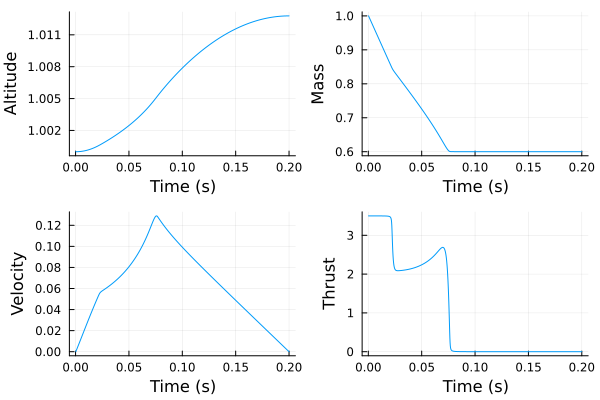

In [117]:
function plot_trajectory(y; kwargs...)
    return Plots.plot(
        (1:T) * Δt,
        value.(y);
        xlabel = "Time (s)",
        legend = false,
        kwargs...,
    )
end

Plots.plot(
    plot_trajectory(x_h; ylabel = "Altitude"),
    plot_trajectory(x_m; ylabel = "Mass"),
    plot_trajectory(x_v; ylabel = "Velocity"),
    plot_trajectory(u_t; ylabel = "Thrust");
    layout = (2, 2),
)

## Next steps

* Experiment with different values for the constants. How does the solution
  change? In particular, what happens if you change `T_max`?
* The dynamical equations use rectangular integration for the right-hand side
  terms. Modify the equations to use the [Trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule_(differential_equations))
  instead. (As an example, `x_v[t-1]` would become
  `0.5 * (x_v[t-1] + x_v[t])`.) Is there a difference?

---

# Constraint programming

JuMP supports a range of constraint-programming type constraints via the
corresponding sets in MathOptInterface. For most constraints, there are
reformulations built-in that convert the constraint programming constraint
into a mixed-integer programming equivalent.

Because of this reformulation, all variables must be integer, and they must
typically have finite bounds. An error will be thrown if the reformulation
requires finiteness and you have a variable with non-finite bounds.

This tutorial uses the following packages:

In [118]:
using JuMP
import HiGHS

## AllDifferent

The `MOI.AllDifferent` set ensures that every element in a list takes
a different integer value.

In [119]:
model = Model(HiGHS.Optimizer)
set_silent(model)
@variable(model, 1 <= x[1:4] <= 4, Int)
@constraint(model, x in MOI.AllDifferent(4))
optimize!(model)
@assert is_solved_and_feasible(model)
value.(x)

4-element Vector{Float64}:
 1.0
 4.0
 3.0000000000000004
 1.9999999999999996

## BinPacking

The `MOI.BinPacking` set can be used to divide up a set of items into
different groups, such that the sum of their weights does not exceed the
capacity of a bin.

In [120]:
weights, capacity = Float64[1, 1, 2, 2, 3], 3.0;
number_of_bins = 3
model = Model(HiGHS.Optimizer)
set_silent(model)
@variable(model, 1 <= x[1:length(weights)] <= number_of_bins, Int)
@constraint(model, x in MOI.BinPacking(capacity, weights))
optimize!(model)
@assert is_solved_and_feasible(model)
value.(x)

5-element Vector{Float64}:
 2.0
 1.0
 2.0
 1.0
 3.0

Here, the value of `x[i]` is the bin that item `i` was placed into.

## Circuit

The `MOI.Circuit` set is used to construct a tour of a list of `N`
variables. They will each be assigned an integer from `1` to `N`, that
describes the successor to each variable in the list:

In [121]:
model = Model(HiGHS.Optimizer)
set_silent(model)
@variable(model, x[1:4], Int)
@constraint(model, x in MOI.Circuit(4))
optimize!(model)
@assert is_solved_and_feasible(model)

Let's see what tour was found, starting at node number `1`:

In [122]:
y = round.(Int, value.(x))
tour = Int[1]
while length(tour) < length(y)
    push!(tour, y[tour[end]])
end
tour

4-element Vector{Int64}:
 1
 4
 3
 2

## CountAtLeast

The `MOI.CountAtLeast` set is used to ensure that at least `n`
elements in a set of variables belong to a set of values.

For example, here is a model with three variables, constrained between 0 and
5:

In [123]:
model = Model(HiGHS.Optimizer)
set_silent(model)
@variable(model, 0 <= x[1:3] <= 5, Int)

3-element Vector{VariableRef}:
 x[1]
 x[2]
 x[3]

If we want to ensure that at least one element of each set `{x[1], x[2]}` and
`{x[2], x[3]}` is in the set `{3}`, then we create a list of variables by
concatenating the sets together:

In [124]:
variables = [x[1], x[2], x[2], x[3]]

4-element Vector{VariableRef}:
 x[1]
 x[2]
 x[2]
 x[3]

Then we need a partition list that contains the number of elements in each
set of variables:

In [125]:
partitions = [2, 2]

2-element Vector{Int64}:
 2
 2

Finally, we need a set of values that the elements must be a part of:

In [126]:
values = Set([3])

Set{Int64} with 1 element:
  3

And the number of elements that must be part of the set `values`:

In [127]:
n = 1

1

The constraint is:

In [128]:
@constraint(model, variables in MOI.CountAtLeast(n, partitions, values))

[x[1], x[2], x[2], x[3]] in MathOptInterface.CountAtLeast(1, [2, 2], Set([3]))

To ensure the uniqueness of the solution, we'll add a constraint that `x[2]`
must be `<= 2`. This ensures that the only feasible solution is for `x[1]` and
`x[3]` to be `3`:

In [129]:
@constraint(model, x[2] <= 2)

x[2] <= 2

Let's check that we found a valid solution:

In [130]:
optimize!(model)
@assert is_solved_and_feasible(model)
value.(x)

3-element Vector{Float64}:
 3.0
 0.0
 3.0

## CountBelongs

The `MOI.CountBelongs` set is used to count how many elements in a set
of variables belong to a set of values.

For example, to count how many elements in a set of 4 variables belong to the
set `{2, 3}`, do:

In [131]:
model = Model(HiGHS.Optimizer)
set_silent(model)
@variable(model, 0 <= x[i = 1:4] <= i, Int)
@variable(model, n, Int)
@objective(model, Max, sum(x))
set = Set([2, 3])
@constraint(model, [n; x] in MOI.CountBelongs(1 + length(x), set))
optimize!(model)
@assert is_solved_and_feasible(model)
value(n), value.(x)

(2.0, [1.0, 2.0, 3.0, 4.0])

## CountDistinct

The `MOI.CountDistinct` set is used to count the number of distinct
elements in a set of variables.

In [132]:
model = Model(HiGHS.Optimizer)
set_silent(model)
@variable(model, 0 <= x[i = 1:4] <= i, Int)
@variable(model, n, Int)
@objective(model, Max, sum(x))
@constraint(model, [n; x] in MOI.CountDistinct(1 + length(x)))
optimize!(model)
@assert is_solved_and_feasible(model)
value(n), value.(x)

(4.0, [1.0, 2.0, 3.0, 4.0])

## CountGreaterThan

The `MOI.CountGreaterThan` set is used to strictly upper-bound the
number of distinct elements in a set of variables that have a value equal to
another variable.

For example, to count the number `n` of times that `y` appears in the vector
`x`, use:

In [133]:
model = Model(HiGHS.Optimizer)
set_silent(model)
@variable(model, 0 <= x[i = 1:4] <= i, Int)
@variable(model, n, Int)
@variable(model, 3 <= y <= 4, Int)
@objective(model, Max, sum(x))
@constraint(model, [n; y; x] in MOI.CountGreaterThan(1 + 1 + length(x)))
optimize!(model)
@assert is_solved_and_feasible(model)
value(n), value(y), value.(x)

(2.0, 3.0, [1.0, 2.0, 3.0, 4.0])

Here `n` is strictly greater than the count, and there is no limit on how
large `n` could be. For example, `n = 100` is also a feasible solution. The
only constraint is that `n` cannot be equal to or smaller than the number of
times that `y` appears.

---

# Conic Programming
## Logistic regression

**This tutorial was originally contributed by François Pacaud.**

This tutorial shows how to solve a logistic regression problem with JuMP.
Logistic regression is a well known method in machine learning, useful when we
want to classify binary variables with the help of a given set of features. To
this goal, we find the optimal combination of features maximizing the
(log)-likelihood onto a training set.

## Required packages

This tutorial uses the following packages:

In [134]:
using JuMP
import MathOptInterface as MOI
import Random
import SCS

Random.seed!(2713);

## Formulating the logistic regression problem

Suppose we have a set of training data-point $i = 1, \cdots, n$, where
for each $i$ we have a vector of features $x_i \in \mathbb{R}^p$ and a
categorical observation $y_i \in \{-1, 1\}$.

The log-likelihood is given by

$$
l(\theta) = \sum_{i=1}^n \log(\dfrac{1}{1 + \exp(-y_i \theta^\top x_i)})
$$

and the optimal $\theta$ minimizes the logistic loss function:

$$
\min_{\theta}\; \sum_{i=1}^n \log(1 + \exp(-y_i \theta^\top x_i)).
$$

Most of the time, instead of solving directly the previous optimization problem, we
prefer to add a regularization term:

$$
\min_{\theta}\; \sum_{i=1}^n \log(1 + \exp(-y_i \theta^\top x_i)) + \lambda \| \theta \|
$$

with $\lambda \in \mathbb{R}_+$ a penalty and $\|.\|$ a norm function. By adding
such a regularization term, we avoid overfitting on the training set and usually
achieve a greater score in cross-validation.

## Reformulation as a conic optimization problem

By introducing auxiliary variables $t_1, \cdots, t_n$ and $r$,
the optimization problem is equivalent to

$$
\begin{aligned}
\min_{t, r, \theta} \;& \sum_{i=1}^n t_i + \lambda r \\
\text{subject to } & \quad t_i \geq \log(1 + \exp(- y_i \theta^\top x_i)) \\
                   & \quad r \geq \|\theta\|
\end{aligned}
$$

Now, the trick is to reformulate the constraints $t_i \geq \log(1 + \exp(- y_i \theta^\top x_i))$
with the help of the *exponential cone*

$$
K_{exp} = \{ (x, y, z) \in \mathbb{R}^3 : \; y \exp(x / y) \leq z \} .
$$

Indeed, by passing to the exponential, we
see that for all $i=1, \cdots, n$, the constraint $t_i \geq \log(1 + \exp(- y_i \theta^\top x_i))$
is equivalent to

$$
\exp(-t_i) + \exp(u_i - t_i) \leq 1
$$

with $u_i = -y_i \theta^\top x_i$. Then, by adding two auxiliary variables
$z_{i1}$ and $z_{i2}$ such that $z_{i1} \geq \exp(u_i-t_i)$ and $z_{i2} \geq \exp(-t_i)$, we get
the equivalent formulation

$$
\left\{
\begin{aligned}
(u_i -t_i , 1, z_{i1}) & \in  K_{exp}  \\
(-t_i , 1, z_{i2}) & \in  K_{exp}  \\
z_{i1} + z_{i2} & \leq  1
\end{aligned}
\right.
$$

In this setting, the conic version of the logistic regression problems writes out

$$
\begin{aligned}
\min_{t, z, r, \theta}&  \; \sum_{i=1}^n t_i + \lambda r \\
\text{subject to } & \quad  (u_i -t_i , 1, z_{i1})  \in  K_{exp}  \\
                   & \quad  (-t_i , 1, z_{i2})  \in  K_{exp}  \\
                   & \quad  z_{i1} + z_{i2}  \leq  1 \\
                   & \quad u_i = -y_i x_i^\top \theta \\
                   & \quad r \geq \|\theta\|
\end{aligned}
$$

and thus encompasses $3n + p + 1$ variables and $3n + 1$ constraints ($u_i = -y_i \theta^\top x_i$
is only a virtual constraint used to clarify the notation).
Thus, if $n \gg 1$, we get a large number of variables and constraints.

## Fitting logistic regression with a conic solver

We start by implementing a function to generate a fake dataset, and where
we could tune the correlation between the feature variables. The function
is a direct transcription of the one used in [this blog post](http://fa.bianp.net/blog/2013/numerical-optimizers-for-logistic-regression/).

In [135]:
function generate_dataset(n_samples = 100, n_features = 10; shift = 0.0)
    X = randn(n_samples, n_features)
    w = randn(n_features)
    y = sign.(X * w)
    X .+= 0.8 * randn(n_samples, n_features) # add noise
    X .+= shift # shift the points in the feature space
    X = hcat(X, ones(n_samples, 1))
    return X, y
end

generate_dataset (generic function with 3 methods)

We write a `softplus` function to formulate each constraint
$t \geq \log(1 + \exp(u))$ with two exponential cones.

In [136]:
function softplus(model, t, u)
    z = @variable(model, [1:2], lower_bound = 0.0)
    @constraint(model, sum(z) <= 1.0)
    @constraint(model, [u - t, 1, z[1]] in MOI.ExponentialCone())
    @constraint(model, [-t, 1, z[2]] in MOI.ExponentialCone())
end

softplus (generic function with 1 method)

### $\ell_2$ regularized logistic regression
Then, with the help of the `softplus` function, we could write our
optimization model. In the $\ell_2$ regularization case, the constraint
$r \geq \|\theta\|_2$ rewrites as a second order cone constraint.

In [137]:
function build_logit_model(X, y, λ)
    n, p = size(X)
    model = Model()
    @variable(model, θ[1:p])
    @variable(model, t[1:n])
    for i in 1:n
        u = -(X[i, :]' * θ) * y[i]
        softplus(model, t[i], u)
    end
    # Add ℓ2 regularization
    @variable(model, 0.0 <= reg)
    @constraint(model, [reg; θ] in SecondOrderCone())
    # Define objective
    @objective(model, Min, sum(t) + λ * reg)
    return model
end

build_logit_model (generic function with 1 method)

We generate the dataset.

**Warning**
    Be careful here, for large n and p SCS could fail to converge.

In [138]:
n, p = 200, 10
X, y = generate_dataset(n, p; shift = 10.0);

# We could now solve the logistic regression problem
λ = 10.0
model = build_logit_model(X, y, λ)
set_optimizer(model, SCS.Optimizer)
set_silent(model)
optimize!(model)
@assert is_solved_and_feasible(model)

In [139]:
θ♯ = value.(model[:θ])

11-element Vector{Float64}:
  0.020413203133971325
  0.16139903246573883
  0.3570077183842789
 -0.30788082187565713
 -0.39391842182076403
 -0.05914040151009881
  0.34717365911616377
 -0.8812123235443264
  0.20125660912005744
  0.5409398851900227
  0.08090419699801006

It appears that the speed of convergence is not that impacted by the correlation
of the dataset, nor by the penalty $\lambda$.

### $\ell_1$ regularized logistic regression

We now formulate the logistic problem with a $\ell_1$ regularization term.
The $\ell_1$ regularization ensures sparsity in the optimal
solution of the resulting optimization problem. Luckily, the $\ell_1$ norm
is implemented as a set in `MathOptInterface`. Thus, we could formulate
the sparse logistic regression problem with the help of a `MOI.NormOneCone`
set.

In [140]:
function build_sparse_logit_model(X, y, λ)
    n, p = size(X)
    model = Model()
    @variable(model, θ[1:p])
    @variable(model, t[1:n])
    for i in 1:n
        u = -(X[i, :]' * θ) * y[i]
        softplus(model, t[i], u)
    end
    # Add ℓ1 regularization
    @variable(model, 0.0 <= reg)
    @constraint(model, [reg; θ] in MOI.NormOneCone(p + 1))
    # Define objective
    @objective(model, Min, sum(t) + λ * reg)
    return model
end

# Auxiliary function to count non-null components:
count_nonzero(v::Vector; tol = 1e-6) = sum(abs.(v) .>= tol)

# We solve the sparse logistic regression problem on the same dataset as before.
λ = 10.0
sparse_model = build_sparse_logit_model(X, y, λ)
set_optimizer(sparse_model, SCS.Optimizer)
set_silent(sparse_model)
optimize!(sparse_model)
@assert is_solved_and_feasible(sparse_model)

In [141]:
θ♯ = value.(sparse_model[:θ])
println(
    "Number of non-zero components: ",
    count_nonzero(θ♯),
    " (out of ",
    p,
    " features)",
)

Number of non-zero components: 8 (out of 10 features)


### Extensions
A direct extension would be to consider the sparse logistic regression with
*hard* thresholding, which, on contrary to the *soft* version using a $\ell_1$ regularization,
adds an explicit cardinality constraint in its formulation:

$$
\begin{aligned}
\min_{\theta} & \; \sum_{i=1}^n \log(1 + \exp(-y_i \theta^\top x_i)) + \lambda \| \theta \|_2^2 \\
\text{subject to } & \quad \| \theta \|_0 <= k
\end{aligned}
$$

where $k$ is the maximum number of non-zero components in the vector $\theta$,
and $\|.\|_0$ is the $\ell_0$ pseudo-norm:

$$
\| x\|_0 = \#\{i : \; x_i \neq 0\}
$$

The cardinality constraint $\|\theta\|_0 \leq k$ could be reformulated with
binary variables. Thus the hard sparse regression problem could be solved
by any solver supporting mixed integer conic problems.

---

# Debugging

Check the solver log with `unset_silent`

Check the solution `summary`

## File printing and reading

In [142]:
using JuMP
model = Model()
@variable(model, x >= 0)
@variable(model, y >= 0)
@constraint(model, 2x + y <= 4)
@constraint(model, 1x + 2y <= 3)
@objective(model, Min, 4x * 3y)
;

In [143]:
write_to_file(model, "my_model.lp")

In [144]:
str = read("my_model.lp", String)
print(str)

minimize
obj: [ 24 x * y ]/2
subject to
c1: 2 x + 1 y <= 4
c2: 1 x + 2 y <= 3
Bounds
x >= 0
y >= 0
End


In [145]:
write_to_file(model, "my_model.mof.json")
str = read("my_model.mof.json", String)
print(str)

{
  "name": "MathOptFormat Model",
  "version": {
    "major": 1,
    "minor": 7
  },
  "variables": [
    {
      "name": "x"
    },
    {
      "name": "y"
    }
  ],
  "objective": {
    "sense": "min",
    "function": {
      "type": "ScalarQuadraticFunction",
      "affine_terms": [],
      "quadratic_terms": [
        {
          "coefficient": 12.0,
          "variable_1": "x",
          "variable_2": "y"
        }
      ],
      "constant": 0.0
    }
  },
  "constraints": [
    {
      "name": "c1",
      "function": {
        "type": "ScalarAffineFunction",
        "terms": [
          {
            "coefficient": 2.0,
            "variable": "x"
          },
          {
            "coefficient": 1.0,
            "variable": "y"
          }
        ],
        "constant": 0.0
      },
      "set": {
        "type": "LessThan",
        "upper": 4.0
      }
    },
    {
      "name": "c2",
      "function": {
        "type": "ScalarAffineFunction",
        "terms": [
          {

In [146]:
model = read_from_file("my_model.lp")
print(model)

Min 12 x*y
Subject to
 c1 : 2 x + y <= 4
 c2 : x + 2 y <= 3
 x >= 0
 y >= 0


## Handling infeasibility

https://jump.dev/JuMP.jl/stable/tutorials/getting_started/debugging/

In [147]:
model = Model(HiGHS.Optimizer);
set_silent(model)
@variable(model, x >= 0)
@constraint(model, c1, x >= 2)
@constraint(model, c2, x <= 1)
optimize!(model)
termination_status(model)

INFEASIBLE::TerminationStatusCode = 2

In [148]:
try
    compute_conflict!(model)
catch err
    showerror(stderr, err)
end

ArgumentError: The optimizer HiGHS.Optimizer does not support `compute_conflict!`

In [149]:

# if get_attribute(model, MOI.ConflictStatus()) == MOI.CONFLICT_FOUND
#     iis_model, reference_map = copy_conflict(model)
#     print(iis_model)
# end

In [150]:
relax_map = relax_with_penalty!(model)

┌ Warning: Skipping PenaltyRelaxation for ConstraintIndex{MathOptInterface.VariableIndex,MathOptInterface.GreaterThan{Float64}}
└ @ MathOptInterface.Utilities C:\JG\Julia\packages\MathOptInterface\HB8aJ\src\Utilities\penalty_relaxation.jl:289


Dict{ConstraintRef{Model, C, ScalarShape} where C, AffExpr} with 2 entries:
  c1 : x + _[2] >= 2 => _[2]
  c2 : x - _[3] <= 1 => _[3]

In [151]:
optimize!(model)
termination_status(model)

OPTIMAL::TerminationStatusCode = 1

In [152]:
for (con, penalty) in relax_map
    violation = value(penalty)
    if violation > 0
        println("Constraint `$(name(con))` is violated by $violation")
    end
end

Constraint `c1` is violated by 1.0


Primal feasibility
The primal feasibility tolerance controls how primal constraints are evaluated. For example, the constraint 2x=1
 is actually implemented as |2x−1|≤ε
, where ε
 is a small solver-dependent primal feasibility tolerance that is typically on the order of 1e-8.

Here's an example in practice. This model should be infeasible, since x must be non-negative, but there is also an equality constraint that x is equal to a small negative number. Yet when we solve this problem, we get:


In [153]:

model = Model(HiGHS.Optimizer)
set_silent(model)
@variable(model, x >= 0)
@constraint(model, x == -1e-8)
optimize!(model)
is_solved_and_feasible(model)


true

In [154]:
value(x)


0.0

In other words, HiGHS thinks that the solution x = 0 satisfies the constraint x == -1e-8. The value of ε
 in HiGHS is controlled by the primal_feasibility_tolerance option. If we set this to a smaller value, HiGHS will now correctly deduce that the problem is infeasible:


In [155]:
set_attribute(model, "primal_feasibility_tolerance", 1e-10)
optimize!(model)
is_solved_and_feasible(model)

false

Integrality tolerances are particularly important when you have big-M type constraints. Small non-integer values in the integer variables can cause "leakage" flows even when the big-M switch is "off." Consider this example:

In [156]:
M = 1e6
model = Model()
@variable(model, x >= 0)
@variable(model, y, Bin)
@constraint(model, x <= M * y)
print(model)

Feasibility
Subject to
 x - 1000000 y <= 0
 x >= 0
 y binary


In [157]:
primal_feasibility_report(model, Dict(x => 1.0, y => 1e-6))

Dict{Any, Float64} with 1 entry:
  y binary => 1.0e-6

---

# Performance tips

See Julia performance tips: https://docs.julialang.org/en/v1/manual/performance-tips/index.html
* Type instability
    * untyped globals
    * varaibles tha can assume multiple types
    * untyped struc fileds
    * use `@code_warntype`
* Array acess order (column major loops)
* Array allocation (in-place operatios)
* Array unnecessary copies (use @views)
* Overusing dicts (which are amazing), consider using Arrays and DataFrames

On the JuMP side...

### Suggestion 1: don't call JuMP from the command line

In other languages, you might be used to a workflow like:

`$ julia my_script.jl`

This doesn't work for JuMP, because we have to pay the compilation latency every time you run the script. Instead, use one of the [suggested workflows](https://docs.julialang.org/en/v1/manual/workflow-tips/) from the Julia documentation.

### Suggestion 2: disable bridges if none are being used

At present, the majority of the latency problems are caused by JuMP's bridging mechanism. If you only use constraints that are natively supported by the solver, you can disable bridges by passing `add_bridges = false` to Model.

In [158]:
model = Model(HiGHS.Optimizer; add_bridges = false)

A JuMP Model
├ solver: HiGHS
├ objective_sense: FEASIBILITY_SENSE
├ num_variables: 0
├ num_constraints: 0
└ Names registered in the model: none

### Suggestion 3: use PackageCompiler
As an example of compilation latency, consider the following linear program with two variables and two constraints:

In [159]:
using JuMP, HiGHS
model = Model(HiGHS.Optimizer)
set_silent(model)
@variable(model, x >= 0)
@variable(model, 0 <= y <= 3)
@objective(model, Min, 12x + 20y)
@constraint(model, c1, 6x + 8y >= 100)
@constraint(model, c2, 7x + 12y >= 120)
optimize!(model)
open("model.log", "w") do io
    print(io, solution_summary(model; verbose = true))
    return
end

Saving the problem in model.jl and calling from the command line results in:

```
$ time julia model.jl
15.78s user 0.48s system 100% cpu 16.173 total
```

Clearly, 16 seconds is a large overhead to pay for solving this trivial model. However, the compilation latency is independent on the problem size, and so 16 seconds of additional overhead may be tolerable for larger models that take minutes or hours to solve.

In cases where the compilation latency is intolerable, JuMP is compatible with the PackageCompiler.jl package, which makes it easy to generate a custom sysimage (a binary extension to Julia that caches compiled code) that dramatically reduces the compilation latency. A custom image for our problem can be created as follows:

```julia
using PackageCompiler, Libdl
PackageCompiler.create_sysimage(
    ["JuMP", "HiGHS"],
    sysimage_path = "customimage." * Libdl.dlext,
    precompile_execution_file = "model.jl",
)
```

When Julia is run with the custom image, the run time is now 0.7 seconds instead of 16:

```
$ time julia --sysimage customimage model.jl
0.68s user 0.22s system 153% cpu 0.587 total
```

Other performance tweaks, such as disabling bridges or using direct mode can reduce this time further.

**Note**
`create_sysimage` only needs to be run once, and the same sysimage can be used–to a slight detriment of performance–even if we modify model.jl or run a different file.

Use macros to build expressions
Use JuMP's macros (or `add_to_expression!`) to build expressions. Avoid constructing expressions outside the macros.

Constructing an expression outside the macro results in intermediate copies of the expression. For example,


In [160]:
model = Model()
@variable(model, x[1:3])

3-element Vector{VariableRef}:
 x[1]
 x[2]
 x[3]

In [161]:
x[1] + x[2] + x[3]

x[1] + x[2] + x[3]

is equivalent to

In [162]:
a = x[1]
b = a + x[2]
c = b + x[3]

x[1] + x[2] + x[3]

Since we only care about c, the a and b expressions are not needed and constructing them slows the program down.

JuMP's macros rewrite the expressions to operate in-place and avoid these extra copies. Because they allocate less memory, they are faster, particularly for large expressions.

Here's an example.


In [163]:
model = Model()
@variable(model, x[1:3])

3-element Vector{VariableRef}:
 x[1]
 x[2]
 x[3]

Here's what happens if we construct the expression outside the macro:

In [164]:
@allocated x[1] + x[2] + x[3]

1424

Info
The `@allocated` measures how many bytes were allocated during the evaluation of an expression. Fewer is better.

If we use the `@expression` macro, we get many fewer allocations:

In [165]:
@allocated @expression(model, x[1] + x[2] + x[3])

1652024

## Disable string names

By default, JuMP creates String names for variables and constraints and passes these to the solver. The benefit of passing names is that it improves the readability of log messages from the solver (for example, "variable x has invalid bounds" instead of "variable v1203 has invalid bounds"), but for larger models the overhead of passing names can be non-trivial.

Disable the creation of String names by setting set_string_name = false in the @variable and @constraint macros, or by calling set_string_names_on_creation to disable all names for a particular model:

In [166]:
model = Model();
set_string_names_on_creation(model, false)
@variable(model, x)
@constraint(model, c, 2x <= 1)

2 _[1] <= 1

Note that this doesn't change how symbolic names and bindings are stored:

In [167]:
x

_[1]

In [168]:
model[:x]

_[1]

In [169]:
x === model[:x]

true

But you can no longer look up the variable by the string name:

In [170]:
variable_by_name(model, "x") === nothing

true

## `direct_model` : advanced strategy to avoid copies

In its default usage, JuMP stores its own copy of the problem data, which
enables JuMP to perform problem modification and allows the solver to be
changed at any time. This design is the most typical choice for modeling
languages, we presume because it simplifies the task of abstraction across
solvers.

To provide an option to reduce peak memory usage and improve performance, JuMP 1.0 includes `direct_model`, a mode in which JuMP acts as a
stateless wrapper around the solver, passing all problem data directly to the
solver without any intermediate caches or transformations.

In [171]:
model = direct_model(HiGHS.Optimizer())
@variable(model, x)
@constraint(model, c, 2x <= 1)

Running HiGHS 1.8.0 (git hash: fcfb53414): Copyright (c) 2024 HiGHS under MIT licence terms


c : 2 x <= 1

Direct mode is not enabled by default because some solvers do not support
the incremental modifications required to build the model in direct mode (e.g.,
they may be one-shot solvers that require all problem data in a single function
call). Moreover, in direct mode, the user cannot change the solver associated
with a model, and reformulations—particularly those associated with conic
models—are disabled. In general, we suggest that users consider direct mode
only if benchmarking demonstrates that model construction is a bottleneck in
their application and only if they are using a solver that supports incremental
modification.

---

# Design patterns for larger models

JuMP makes it easy to build and solve optimization models. However, once you
start to construct larger models, and especially ones that interact with
external data sources or have customizable sets of variables and constraints
based on client choices, you may find that your scripts become unwieldy. This
tutorial demonstrates a variety of ways in which you can structure larger JuMP
models to improve their readability and maintainability.

**Tip**
    This tutorial is more advanced than the other "Getting started" tutorials.
    It's in the "Getting started" section to give you an early preview of how
    JuMP makes it easy to structure larger models. However, if you are new to
    JuMP you may want to briefly skim the tutorial, and come back to it once
    you have written a few JuMP models.

## Overview

This tutorial uses explanation-by-example. We're going to start with a simple
[knapsack model](https://en.wikipedia.org/wiki/Knapsack_problem), and then
expand it to add various features and structure.

## A simple script

Your first prototype of a JuMP model is probably a script that uses a small
set of hard-coded data.

In [172]:
using JuMP, HiGHS
profit = [5, 3, 2, 7, 4]
weight = [2, 8, 4, 2, 5]
capacity = 10
N = 5
model = Model(HiGHS.Optimizer)
@variable(model, x[1:N], Bin)
@objective(model, Max, sum(profit[i] * x[i] for i in 1:N))
@constraint(model, sum(weight[i] * x[i] for i in 1:N) <= capacity)
optimize!(model)
@assert is_solved_and_feasible(model)
value.(x)

Running HiGHS 1.8.0 (git hash: fcfb53414): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [2e+00, 8e+00]
  Cost   [2e+00, 7e+00]
  Bound  [1e+00, 1e+00]
  RHS    [1e+01, 1e+01]
Presolving model
1 rows, 5 cols, 5 nonzeros  0s
1 rows, 4 cols, 4 nonzeros  0s
Objective function is integral with scale 1

Solving MIP model with:
   1 rows
   4 cols (4 binary, 0 integer, 0 implied int., 0 continuous)
   4 nonzeros

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
     Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp Confl. | LpIters     Time

         0       0         0   0.00%   18              -inf                 inf        0      0      0         0     0.0s
         1       0         1 100.00%   16              16                 0.00%        0      0      0         1     0.0s

Solving report
  Status            Optimal
  Primal bound      16
 

5-element Vector{Float64}:
  1.0
  0.0
 -0.0
  1.0
  1.0

The benefits of this approach are:
 * it is quick to code
 * it is quick to make changes.

The downsides include:
 * all variables are global (read [Performance tips](https://docs.julialang.org/en/v1/manual/performance-tips/))
 * it is easy to introduce errors, for example, having `profit` and `weight` be
   vectors of different lengths, or not match `N`
 * the solution, `x[i]`, is hard to interpret without knowing the order in
   which we provided the data.

## Wrap the model in a function

A good next step is to wrap your model in a function. This is useful for a few
reasons:
 * it removes global variables
 * it encapsulates the JuMP model and forces you to clarify your inputs and
   outputs
 * we can add some error checking.

In [173]:
function solve_knapsack_1(profit::Vector, weight::Vector, capacity::Real)
    if length(profit) != length(weight)
        throw(DimensionMismatch("profit and weight are different sizes"))
    end
    N = length(weight)
    model = Model(HiGHS.Optimizer)
    @variable(model, x[1:N], Bin)
    @objective(model, Max, sum(profit[i] * x[i] for i in 1:N))
    @constraint(model, sum(weight[i] * x[i] for i in 1:N) <= capacity)
    optimize!(model)
    @assert is_solved_and_feasible(model)
    return value.(x)
end

solve_knapsack_1([5, 3, 2, 7, 4], [2, 8, 4, 2, 5], 10)

Running HiGHS 1.8.0 (git hash: fcfb53414): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [2e+00, 8e+00]
  Cost   [2e+00, 7e+00]
  Bound  [1e+00, 1e+00]
  RHS    [1e+01, 1e+01]
Presolving model
1 rows, 5 cols, 5 nonzeros  0s
1 rows, 4 cols, 4 nonzeros  0s
Objective function is integral with scale 1

Solving MIP model with:
   1 rows
   4 cols (4 binary, 0 integer, 0 implied int., 0 continuous)
   4 nonzeros

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
     Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp Confl. | LpIters     Time

         0       0         0   0.00%   18              -inf                 inf        0      0      0         0     0.0s
         1       0         1 100.00%   16              16                 0.00%        0      0      0         1     0.0s

Solving report
  Status            Optimal
  Primal bound      16
 

5-element Vector{Float64}:
  1.0
  0.0
 -0.0
  1.0
  1.0

## Create better data structures

Although we can check for errors like mis-matched vector lengths, if you start
to develop models with a lot of data, keeping track of vectors and lengths and
indices is fragile and a common source of bugs. A good solution is to use
Julia's type system to create an abstraction over your data.

For example, we can create a `struct` that represents a single object, with a
constructor that lets us validate assumptions on the input data:

In [174]:
struct KnapsackObject
    profit::Float64
    weight::Float64
    function KnapsackObject(profit::Float64, weight::Float64)
        if weight < 0
            throw(DomainError("Weight of object cannot be negative"))
        end
        return new(profit, weight)
    end
end

as well as a `struct` that holds a dictionary of objects and the knapsack's
capacity:

In [175]:
struct KnapsackData
    objects::Dict{String,KnapsackObject}
    capacity::Float64
end

Here's what our data might look like now:

In [176]:
objects = Dict(
    "apple" => KnapsackObject(5.0, 2.0),
    "banana" => KnapsackObject(3.0, 8.0),
    "cherry" => KnapsackObject(2.0, 4.0),
    "date" => KnapsackObject(7.0, 2.0),
    "eggplant" => KnapsackObject(4.0, 5.0),
)
data = KnapsackData(objects, 10.0)

KnapsackData(Dict{String, KnapsackObject}("cherry" => KnapsackObject(2.0, 4.0), "banana" => KnapsackObject(3.0, 8.0), "date" => KnapsackObject(7.0, 2.0), "eggplant" => KnapsackObject(4.0, 5.0), "apple" => KnapsackObject(5.0, 2.0)), 10.0)

If you want, you can add custom printing to make it easier to visualize:

In [177]:
function Base.show(io::IO, data::KnapsackData)
    println(io, "A knapsack with capacity $(data.capacity) and possible items:")
    for (k, v) in data.objects
        println(
            io,
            "  $(rpad(k, 8)) : profit = $(v.profit), weight = $(v.weight)",
        )
    end
    return
end

data

A knapsack with capacity 10.0 and possible items:
  cherry   : profit = 2.0, weight = 4.0
  banana   : profit = 3.0, weight = 8.0
  date     : profit = 7.0, weight = 2.0
  eggplant : profit = 4.0, weight = 5.0
  apple    : profit = 5.0, weight = 2.0


Then, we can re-write our `solve_knapsack` function to take our `KnapsackData`
as input:

In [178]:
function solve_knapsack_2(data::KnapsackData)
    model = Model(HiGHS.Optimizer)
    @variable(model, x[keys(data.objects)], Bin)
    @objective(model, Max, sum(v.profit * x[k] for (k, v) in data.objects))
    @constraint(
        model,
        sum(v.weight * x[k] for (k, v) in data.objects) <= data.capacity,
    )
    optimize!(model)
    @assert is_solved_and_feasible(model)
    return value.(x)
end

solve_knapsack_2(data)

Running HiGHS 1.8.0 (git hash: fcfb53414): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [2e+00, 8e+00]
  Cost   [2e+00, 7e+00]
  Bound  [1e+00, 1e+00]
  RHS    [1e+01, 1e+01]
Presolving model
1 rows, 5 cols, 5 nonzeros  0s
1 rows, 4 cols, 4 nonzeros  0s
Objective function is integral with scale 1

Solving MIP model with:
   1 rows
   4 cols (4 binary, 0 integer, 0 implied int., 0 continuous)
   4 nonzeros

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
     Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp Confl. | LpIters     Time

         0       0         0   0.00%   18              -inf                 inf        0      0      0         0     0.0s
         1       0         1 100.00%   16              16                 0.00%        0      0      0         1     0.0s

Solving report
  Status            Optimal
  Primal bound      16
 

1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, ["cherry", "banana", "date", "eggplant", "apple"]
And data, a 5-element Vector{Float64}:
 -0.0
  0.0
  1.0
  1.0
  1.0

## Read in data from files

Having a data structure is a good step. But it is still annoying that we have
to hard-code the data into Julia. A good next step is to separate the data
into an external file format; JSON is a common choice.

In [179]:
json_data = """
{
    "objects": {
        "apple": {"profit": 5.0, "weight": 2.0},
        "banana": {"profit": 3.0, "weight": 8.0},
        "cherry": {"profit": 2.0, "weight": 4.0},
        "date": {"profit": 7.0, "weight": 2.0},
        "eggplant": {"profit": 4.0, "weight": 5.0}
    },
    "capacity": 10.0
}
"""
temp_dir = mktempdir()
knapsack_json_filename = joinpath(temp_dir, "knapsack.json")
# Instead of writing a new file here you could replace `knapsack_json_filename`
# with the path to a local file.
write(knapsack_json_filename, json_data);

Now let's write a function that reads this file and builds a `KnapsackData`
object:

In [180]:
import JSON

function read_data(filename)
    d = JSON.parsefile(filename)
    return KnapsackData(
        Dict(
            k => KnapsackObject(v["profit"], v["weight"]) for
            (k, v) in d["objects"]
        ),
        d["capacity"],
    )
end

data = read_data(knapsack_json_filename)

A knapsack with capacity 10.0 and possible items:
  cherry   : profit = 2.0, weight = 4.0
  banana   : profit = 3.0, weight = 8.0
  date     : profit = 7.0, weight = 2.0
  eggplant : profit = 4.0, weight = 5.0
  apple    : profit = 5.0, weight = 2.0


## Add options via if-else

At this point, we have data in a file format which we can load and solve a
single problem. For many users, this might be sufficient. However, at some
point you may be asked to add features like "but what if we want to take more
than one of a particular item?"

If this is the first time that you've been asked to add a feature, adding
options via `if-else` statements is a good approach. For example, we might
write:

In [181]:
function solve_knapsack_3(data::KnapsackData; binary_knapsack::Bool)
    model = Model(HiGHS.Optimizer)
    if binary_knapsack
        @variable(model, x[keys(data.objects)], Bin)
    else
        @variable(model, x[keys(data.objects)] >= 0, Int)
    end
    @objective(model, Max, sum(v.profit * x[k] for (k, v) in data.objects))
    @constraint(
        model,
        sum(v.weight * x[k] for (k, v) in data.objects) <= data.capacity,
    )
    optimize!(model)
    @assert is_solved_and_feasible(model)
    return value.(x)
end

solve_knapsack_3 (generic function with 1 method)

Now we can solve the binary knapsack:

In [182]:
solve_knapsack_3(data; binary_knapsack = true)

Running HiGHS 1.8.0 (git hash: fcfb53414): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [2e+00, 8e+00]
  Cost   [2e+00, 7e+00]
  Bound  [1e+00, 1e+00]
  RHS    [1e+01, 1e+01]
Presolving model
1 rows, 5 cols, 5 nonzeros  0s
1 rows, 4 cols, 4 nonzeros  0s
Objective function is integral with scale 1

Solving MIP model with:
   1 rows
   4 cols (4 binary, 0 integer, 0 implied int., 0 continuous)
   4 nonzeros

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
     Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp Confl. | LpIters     Time

         0       0         0   0.00%   18              -inf                 inf        0      0      0         0     0.0s
         1       0         1 100.00%   16              16                 0.00%        0      0      0         1     0.0s

Solving report
  Status            Optimal
  Primal bound      16
 

1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, ["cherry", "banana", "date", "eggplant", "apple"]
And data, a 5-element Vector{Float64}:
 -0.0
  0.0
  1.0
  1.0
  1.0

And an integer knapsack where we can take more than one copy of each item:

In [183]:
solve_knapsack_3(data; binary_knapsack = false)

Running HiGHS 1.8.0 (git hash: fcfb53414): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [2e+00, 8e+00]
  Cost   [2e+00, 7e+00]
  Bound  [0e+00, 0e+00]
  RHS    [1e+01, 1e+01]
Presolving model
1 rows, 5 cols, 5 nonzeros  0s
1 rows, 3 cols, 3 nonzeros  0s
1 rows, 2 cols, 2 nonzeros  0s
0 rows, 0 cols, 0 nonzeros  0s
Presolve: Optimal

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
     Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp Confl. | LpIters     Time

         0       0         0   0.00%   35              35                 0.00%        0      0      0         0     0.0s

Solving report
  Status            Optimal
  Primal bound      35
  Dual bound        35
  Gap               0% (tolerance: 0.01%)
  Solution status   feasible
                    35 (objective)
                    0 (bound viol.)
                    0 (int. viol.

1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, ["cherry", "banana", "date", "eggplant", "apple"]
And data, a 5-element Vector{Float64}:
 0.0
 0.0
 5.0
 0.0
 0.0

## Add configuration options via dispatch

If you get repeated requests to add different options, you'll quickly find
yourself in a mess of different flags and `if-else` statements. It's hard to
write, hard to read, and hard to ensure you haven't introduced any bugs.
A good solution is to use Julia's type dispatch to control the configuration
of the model. The easiest way to explain this is by example.

First, start by defining a new abstract type, as well as new subtypes for each
of our options. These types are going to control the configuration of the
knapsack model.

In [184]:
abstract type AbstractConfiguration end

struct BinaryKnapsackConfig <: AbstractConfiguration end

struct IntegerKnapsackConfig <: AbstractConfiguration end

Then, we rewrite our `solve_knapsack` function to take a `config` argument,
and we introduce an `add_knapsack_variables` function to abstract the creation
of our variables.

In [185]:
function solve_knapsack_4(data::KnapsackData, config::AbstractConfiguration)
    model = Model(HiGHS.Optimizer)
    x = add_knapsack_variables(model, data, config)
    @objective(model, Max, sum(v.profit * x[k] for (k, v) in data.objects))
    @constraint(
        model,
        sum(v.weight * x[k] for (k, v) in data.objects) <= data.capacity,
    )
    optimize!(model)
    @assert is_solved_and_feasible(model)
    return value.(x)
end

solve_knapsack_4 (generic function with 1 method)

For the binary knapsack problem, `add_knapsack_variables` looks like this:

In [186]:
function add_knapsack_variables(
    model::Model,
    data::KnapsackData,
    ::BinaryKnapsackConfig,
)
    return @variable(model, x[keys(data.objects)], Bin)
end

add_knapsack_variables (generic function with 1 method)

For the integer knapsack problem, `add_knapsack_variables` looks like this:

In [187]:
function add_knapsack_variables(
    model::Model,
    data::KnapsackData,
    ::IntegerKnapsackConfig,
)
    return @variable(model, x[keys(data.objects)] >= 0, Int)
end

add_knapsack_variables (generic function with 2 methods)

Now we can solve the binary knapsack:

In [188]:
solve_knapsack_4(data, BinaryKnapsackConfig())

Running HiGHS 1.8.0 (git hash: fcfb53414): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [2e+00, 8e+00]
  Cost   [2e+00, 7e+00]
  Bound  [1e+00, 1e+00]
  RHS    [1e+01, 1e+01]
Presolving model
1 rows, 5 cols, 5 nonzeros  0s
1 rows, 4 cols, 4 nonzeros  0s
Objective function is integral with scale 1

Solving MIP model with:
   1 rows
   4 cols (4 binary, 0 integer, 0 implied int., 0 continuous)
   4 nonzeros

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
     Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp Confl. | LpIters     Time

         0       0         0   0.00%   18              -inf                 inf        0      0      0         0     0.0s
         1       0         1 100.00%   16              16                 0.00%        0      0      0         1     0.0s

Solving report
  Status            Optimal
  Primal bound      16
 

1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, ["cherry", "banana", "date", "eggplant", "apple"]
And data, a 5-element Vector{Float64}:
 -0.0
  0.0
  1.0
  1.0
  1.0

and the integer knapsack problem:

In [189]:
solve_knapsack_4(data, IntegerKnapsackConfig())

Running HiGHS 1.8.0 (git hash: fcfb53414): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [2e+00, 8e+00]
  Cost   [2e+00, 7e+00]
  Bound  [0e+00, 0e+00]
  RHS    [1e+01, 1e+01]
Presolving model
1 rows, 5 cols, 5 nonzeros  0s
1 rows, 3 cols, 3 nonzeros  0s
1 rows, 2 cols, 2 nonzeros  0s
0 rows, 0 cols, 0 nonzeros  0s
Presolve: Optimal

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
     Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp Confl. | LpIters     Time

         0       0         0   0.00%   35              35                 0.00%        0      0      0         0     0.0s

Solving report
  Status            Optimal
  Primal bound      35
  Dual bound        35
  Gap               0% (tolerance: 0.01%)
  Solution status   feasible
                    35 (objective)
                    0 (bound viol.)
                    0 (int. viol.

1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, ["cherry", "banana", "date", "eggplant", "apple"]
And data, a 5-element Vector{Float64}:
 0.0
 0.0
 5.0
 0.0
 0.0

The main benefit of the dispatch approach is that you can quickly add new
options without needing to modify the existing code. For example:

In [190]:
struct UpperBoundedKnapsackConfig <: AbstractConfiguration
    limit::Int
end

function add_knapsack_variables(
    model::Model,
    data::KnapsackData,
    config::UpperBoundedKnapsackConfig,
)
    return @variable(model, 0 <= x[keys(data.objects)] <= config.limit, Int)
end

solve_knapsack_4(data, UpperBoundedKnapsackConfig(3))

Running HiGHS 1.8.0 (git hash: fcfb53414): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [2e+00, 8e+00]
  Cost   [2e+00, 7e+00]
  Bound  [3e+00, 3e+00]
  RHS    [1e+01, 1e+01]
Presolving model
1 rows, 5 cols, 5 nonzeros  0s
1 rows, 4 cols, 4 nonzeros  0s
Objective function is integral with scale 1

Solving MIP model with:
   1 rows
   4 cols (0 binary, 4 integer, 0 implied int., 0 continuous)
   4 nonzeros

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
     Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp Confl. | LpIters     Time

         0       0         0   0.00%   48              -inf                 inf        0      0      0         0     0.0s
         1       0         1 100.00%   31              31                 0.00%        0      0      0         2     0.0s

Solving report
  Status            Optimal
  Primal bound      31
 

1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, ["cherry", "banana", "date", "eggplant", "apple"]
And data, a 5-element Vector{Float64}:
 0.0
 0.0
 3.0
 0.0
 2.0

## Generalize constraints and objectives

It's easy to extend the dispatch approach to constraints and objectives as
well. The key points to notice in the next two functions are that:
 * we can access registered variables via `model[:x]`
 * we can define generic functions which accept any `AbstractConfiguration` as a
   configuration argument. That means we can implement a single method and
   have it apply to multiple configuration types.

In [191]:
function add_knapsack_constraints(
    model::Model,
    data::KnapsackData,
    ::AbstractConfiguration,
)
    x = model[:x]
    @constraint(
        model,
        capacity_constraint,
        sum(v.weight * x[k] for (k, v) in data.objects) <= data.capacity,
    )
    return
end

function add_knapsack_objective(
    model::Model,
    data::KnapsackData,
    ::AbstractConfiguration,
)
    x = model[:x]
    @objective(model, Max, sum(v.profit * x[k] for (k, v) in data.objects))
    return
end

function solve_knapsack_5(data::KnapsackData, config::AbstractConfiguration)
    model = Model(HiGHS.Optimizer)
    add_knapsack_variables(model, data, config)
    add_knapsack_constraints(model, data, config)
    add_knapsack_objective(model, data, config)
    optimize!(model)
    @assert is_solved_and_feasible(model)
    return value.(model[:x])
end

solve_knapsack_5(data, BinaryKnapsackConfig())

Running HiGHS 1.8.0 (git hash: fcfb53414): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [2e+00, 8e+00]
  Cost   [2e+00, 7e+00]
  Bound  [1e+00, 1e+00]
  RHS    [1e+01, 1e+01]
Presolving model
1 rows, 5 cols, 5 nonzeros  0s
1 rows, 4 cols, 4 nonzeros  0s
Objective function is integral with scale 1

Solving MIP model with:
   1 rows
   4 cols (4 binary, 0 integer, 0 implied int., 0 continuous)
   4 nonzeros

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
     Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp Confl. | LpIters     Time

         0       0         0   0.00%   18              -inf                 inf        0      0      0         0     0.0s
         1       0         1 100.00%   16              16                 0.00%        0      0      0         1     0.0s

Solving report
  Status            Optimal
  Primal bound      16
 

1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, ["cherry", "banana", "date", "eggplant", "apple"]
And data, a 5-element Vector{Float64}:
 -0.0
  0.0
  1.0
  1.0
  1.0

## Remove solver dependence, add error checks

Compared to where we started, our knapsack model is now significantly
different. We've wrapped it in a function, defined some data types, and
introduced configuration options to control the variables and constraints that
get added. There are a few other steps we can do to further improve things:
 * remove the dependence on `HiGHS`
 * add checks that we found an optimal solution
 * add a helper function to avoid the need to explicitly construct the data.

In [192]:
function solve_knapsack_6(
    optimizer,
    data::KnapsackData,
    config::AbstractConfiguration,
)
    model = Model(optimizer)
    add_knapsack_variables(model, data, config)
    add_knapsack_constraints(model, data, config)
    add_knapsack_objective(model, data, config)
    optimize!(model)
    if !is_solved_and_feasible(model)
        @warn("Model not solved to optimality")
        return nothing
    end
    return value.(model[:x])
end

function solve_knapsack_6(
    optimizer,
    data::String,
    config::AbstractConfiguration,
)
    return solve_knapsack_6(optimizer, read_data(data), config)
end

solution = solve_knapsack_6(
    HiGHS.Optimizer,
    knapsack_json_filename,
    BinaryKnapsackConfig(),
)

Running HiGHS 1.8.0 (git hash: fcfb53414): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [2e+00, 8e+00]
  Cost   [2e+00, 7e+00]
  Bound  [1e+00, 1e+00]
  RHS    [1e+01, 1e+01]
Presolving model
1 rows, 5 cols, 5 nonzeros  0s
1 rows, 4 cols, 4 nonzeros  0s
Objective function is integral with scale 1

Solving MIP model with:
   1 rows
   4 cols (4 binary, 0 integer, 0 implied int., 0 continuous)
   4 nonzeros

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
     Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp Confl. | LpIters     Time

         0       0         0   0.00%   18              -inf                 inf        0      0      0         0     0.0s
         1       0         1 100.00%   16              16                 0.00%        0      0      0         1     0.0s

Solving report
  Status            Optimal
  Primal bound      16
 

1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, ["cherry", "banana", "date", "eggplant", "apple"]
And data, a 5-element Vector{Float64}:
 -0.0
  0.0
  1.0
  1.0
  1.0

## Create a module

Now we're ready to expose our model to the wider world. That might be as part
of a larger Julia project that we're contributing to, or as a stand-alone
script that we can run on-demand. In either case, it's good practice to wrap
everything in a module. This further encapsulates our code into a single
namespace, and we can add documentation in the form of
[docstrings](https://docs.julialang.org/en/v1/manual/documentation/).

Some good rules to follow when creating a module are:
* use `import` in a module instead of `using` to make it clear which functions
  are from which packages
* use `_` to start function and type names that are considered private
* add docstrings to all public variables and functions.

In [193]:
module KnapsackModel

import JuMP
import JSON

struct _KnapsackObject
    profit::Float64
    weight::Float64
    function _KnapsackObject(profit::Float64, weight::Float64)
        if weight < 0
            throw(DomainError("Weight of object cannot be negative"))
        end
        return new(profit, weight)
    end
end

struct _KnapsackData
    objects::Dict{String,_KnapsackObject}
    capacity::Float64
end

function _read_data(filename)
    d = JSON.parsefile(filename)
    return _KnapsackData(
        Dict(
            k => _KnapsackObject(v["profit"], v["weight"]) for
            (k, v) in d["objects"]
        ),
        d["capacity"],
    )
end

abstract type _AbstractConfiguration end

"""
    BinaryKnapsackConfig()

Create a binary knapsack problem where each object can be taken 0 or 1 times.
"""
struct BinaryKnapsackConfig <: _AbstractConfiguration end

"""
    IntegerKnapsackConfig()

Create an integer knapsack problem where each object can be taken any number of
times.
"""
struct IntegerKnapsackConfig <: _AbstractConfiguration end

function _add_knapsack_variables(
    model::JuMP.Model,
    data::_KnapsackData,
    ::BinaryKnapsackConfig,
)
    return JuMP.@variable(model, x[keys(data.objects)], Bin)
end

function _add_knapsack_variables(
    model::JuMP.Model,
    data::_KnapsackData,
    ::IntegerKnapsackConfig,
)
    return JuMP.@variable(model, x[keys(data.objects)] >= 0, Int)
end

function _add_knapsack_constraints(
    model::JuMP.Model,
    data::_KnapsackData,
    ::_AbstractConfiguration,
)
    x = model[:x]
    JuMP.@constraint(
        model,
        capacity_constraint,
        sum(v.weight * x[k] for (k, v) in data.objects) <= data.capacity,
    )
    return
end

function _add_knapsack_objective(
    model::JuMP.Model,
    data::_KnapsackData,
    ::_AbstractConfiguration,
)
    x = model[:x]
    JuMP.@objective(model, Max, sum(v.profit * x[k] for (k, v) in data.objects))
    return
end

function _solve_knapsack(
    optimizer,
    data::_KnapsackData,
    config::_AbstractConfiguration,
)
    model = JuMP.Model(optimizer)
    _add_knapsack_variables(model, data, config)
    _add_knapsack_constraints(model, data, config)
    _add_knapsack_objective(model, data, config)
    JuMP.optimize!(model)
    if !JuMP.is_solved_and_feasible(model)
        @warn("Model not solved to optimality")
        return nothing
    end
    return JuMP.value.(model[:x])
end

"""
    solve_knapsack(
        optimizer,
        knapsack_json_filename::String,
        config::_AbstractConfiguration,
    )

Solve the knapsack problem and return the optimal primal solution

# Arguments

 * `optimizer` : an object that can be passed to `JuMP.Model` to construct a new
   JuMP model.
 * `knapsack_json_filename` : the filename of a JSON file containing the data for the
   problem.
 * `config` : an object to control the type of knapsack model constructed.
   Valid options are:
    * `BinaryKnapsackConfig()`
    * `IntegerKnapsackConfig()`

# Returns

 * If an optimal solution exists: a `JuMP.DenseAxisArray` that maps the `String`
   name of each object to the number of objects to pack into the knapsack.
 * Otherwise, `nothing`, indicating that the problem does not have an optimal
   solution.

# Example

```julia
solution = solve_knapsack(
    HiGHS.Optimizer,
    "path/to/data.json",
    BinaryKnapsackConfig(),
)
```

```julia
solution = solve_knapsack(
    MOI.OptimizerWithAttributes(HiGHS.Optimizer, "output_flag" => false),
    "path/to/data.json",
    IntegerKnapsackConfig(),
)
```
"""
function solve_knapsack(
    optimizer,
    knapsack_json_filename::String,
    config::_AbstractConfiguration,
)
    data = _read_data(knapsack_json_filename)
    return _solve_knapsack(optimizer, data, config)
end

end

Main.KnapsackModel

Finally, you can call your model:

In [194]:
import .KnapsackModel

KnapsackModel.solve_knapsack(
    HiGHS.Optimizer,
    knapsack_json_filename,
    KnapsackModel.BinaryKnapsackConfig(),
)

Running HiGHS 1.8.0 (git hash: fcfb53414): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [2e+00, 8e+00]
  Cost   [2e+00, 7e+00]
  Bound  [1e+00, 1e+00]
  RHS    [1e+01, 1e+01]
Presolving model
1 rows, 5 cols, 5 nonzeros  0s
1 rows, 4 cols, 4 nonzeros  0s
Objective function is integral with scale 1

Solving MIP model with:
   1 rows
   4 cols (4 binary, 0 integer, 0 implied int., 0 continuous)
   4 nonzeros

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
     Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp Confl. | LpIters     Time

         0       0         0   0.00%   18              -inf                 inf        0      0      0         0     0.0s
         1       0         1 100.00%   16              16                 0.00%        0      0      0         1     0.0s

Solving report
  Status            Optimal
  Primal bound      16
 

1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, ["cherry", "banana", "date", "eggplant", "apple"]
And data, a 5-element Vector{Float64}:
 -0.0
  0.0
  1.0
  1.0
  1.0

**Note**
    The `.` in `.KnapsackModel` denotes that it is a submodule and not a
    separate package that we installed with `Pkg.add`. If you put the
    `KnapsackModel` in a separate file, load it with:
    ```julia
    include("path/to/KnapsackModel.jl")
    import .KnapsackModel
    ```

## Add tests

As a final step, you should add tests for your model. This often means testing
on a small problem for which you can work out the optimal solution by hand.
The Julia standard library `Test` has good unit-testing functionality.

In [195]:
import .KnapsackModel
using Test

@testset "KnapsackModel" begin
    @testset "feasible_binary_knapsack" begin
        x = KnapsackModel.solve_knapsack(
            HiGHS.Optimizer,
            knapsack_json_filename,
            KnapsackModel.BinaryKnapsackConfig(),
        )
        @test isapprox(x["apple"], 1, atol = 1e-5)
        @test isapprox(x["banana"], 0, atol = 1e-5)
        @test isapprox(x["cherry"], 0, atol = 1e-5)
        @test isapprox(x["date"], 1, atol = 1e-5)
        @test isapprox(x["eggplant"], 1, atol = 1e-5)
    end
    @testset "feasible_integer_knapsack" begin
        x = KnapsackModel.solve_knapsack(
            HiGHS.Optimizer,
            knapsack_json_filename,
            KnapsackModel.IntegerKnapsackConfig(),
        )
        @test isapprox(x["apple"], 0, atol = 1e-5)
        @test isapprox(x["banana"], 0, atol = 1e-5)
        @test isapprox(x["cherry"], 0, atol = 1e-5)
        @test isapprox(x["date"], 5, atol = 1e-5)
        @test isapprox(x["eggplant"], 0, atol = 1e-5)
    end
    @testset "infeasible_binary_knapsack" begin
        dir = mktempdir()
        infeasible_filename = joinpath(dir, "infeasible.json")
        write(
            infeasible_filename,
            """{
                "objects": {
                    "apple": {"profit": 5.0, "weight": 2.0},
                    "banana": {"profit": 3.0, "weight": 8.0},
                    "cherry": {"profit": 2.0, "weight": 4.0},
                    "date": {"profit": 7.0, "weight": 2.0},
                    "eggplant": {"profit": 4.0, "weight": 5.0}
                },
                "capacity": -10.0
            }""",
        )
        x = KnapsackModel.solve_knapsack(
            HiGHS.Optimizer,
            infeasible_filename,
            KnapsackModel.BinaryKnapsackConfig(),
        )
        @test x === nothing
    end
end

Running HiGHS 1.8.0 (git hash: fcfb53414): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [2e+00, 8e+00]
  Cost   [2e+00, 7e+00]
  Bound  [1e+00, 1e+00]
  RHS    [1e+01, 1e+01]
Presolving model
1 rows, 5 cols, 5 nonzeros  0s
1 rows, 4 cols, 4 nonzeros  0s
Objective function is integral with scale 1

Solving MIP model with:
   1 rows
   4 cols (4 binary, 0 integer, 0 implied int., 0 continuous)
   4 nonzeros

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
     Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp Confl. | LpIters     Time

         0       0         0   0.00%   18              -inf                 inf        0      0      0         0     0.0s
         1       0         1 100.00%   16              16                 0.00%        0      0      0         1     0.0s

Solving report
  Status            Optimal
  Primal bound      16
 

┌ Warning: Model not solved to optimality
└ @ Main.KnapsackModel c:\JG\SBPO2024\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Z1425sZmlsZQ==.jl:101


Test Summary: | Pass  Total  Time
KnapsackModel |   11     11  0.4s


Test.DefaultTestSet("KnapsackModel", Any[Test.DefaultTestSet("feasible_binary_knapsack", Any[], 5, false, false, true, 1.730695508456e9, 1.730695508676e9, false, "c:\\JG\\SBPO2024\\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Z1434sZmlsZQ==.jl"), Test.DefaultTestSet("feasible_integer_knapsack", Any[], 5, false, false, true, 1.730695508676e9, 1.730695508845e9, false, "c:\\JG\\SBPO2024\\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Z1434sZmlsZQ==.jl"), Test.DefaultTestSet("infeasible_binary_knapsack", Any[], 1, false, false, true, 1.730695508845e9, 1.730695508849e9, false, "c:\\JG\\SBPO2024\\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Z1434sZmlsZQ==.jl")], 0, false, false, true, 1.730695508451e9, 1.730695508849e9, false, "c:\\JG\\SBPO2024\\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Z1434sZmlsZQ==.jl")

**Tip**
    Place these tests in a separate file `test_knapsack_model.jl` so that you
    can run the tests by adding `include("test_knapsack_model.jl")` to any
    file where needed.

## Next steps

We've only briefly scratched the surface of ways to create and structure large
JuMP models, so consider this tutorial a starting point, rather than a
comprehensive list of all the possible ways to structure JuMP models.  If you
are embarking on a large project that uses JuMP, a good next step is to
look at ways people have written large JuMP projects "in the wild."

Here are some good examples (all co-incidentally related to energy):
* AnyMOD.jl
  * [JuMP-dev 2021 talk](https://www.youtube.com/watch?v=QE_tNDER0F4)
  * [source code](https://github.com/leonardgoeke/AnyMOD.jl)
* PowerModels.jl
  * [JuMP-dev 2021 talk](https://www.youtube.com/watch?v=POOt1FCA8LI)
  * [source code](https://github.com/lanl-ansi/PowerModels.jl)
* PowerSimulations.jl
   * [JuliaCon 2021 talk](https://www.youtube.com/watch?v=-ZoO3npjwYU)
   * [source code](https://github.com/NREL-SIIP/PowerSimulations.jl)
* UnitCommitment.jl
  * [JuMP-dev 2021 talk](https://www.youtube.com/watch?v=rYUZK9kYeIY)
  * [source code](https://github.com/ANL-CEEESA/UnitCommitment.jl)

---

# Extensions

Basics in the manual:
https://jump.dev/JuMP.jl/stable/developers/extensions/#The-extension-dictionary

And in the JuMP extension test: https://github.com/jump-dev/JuMP.jl/blob/master/test/JuMPExtension.jl

Also look at examples from others:
* [BilevelJuMP.jl](https://github.com/joaquimg/BilevelJuMP.jl)
* [Coluna.jl](https://github.com/atoptima/Coluna.jl)
* [InfiniteOpt.jl](https://github.com/infiniteopt/InfiniteOpt.jl)
* [Plasmo.jl](https://github.com/zavalab/Plasmo.jl)
* [PolyJuMP.jl](https://github.com/jump-dev/PolyJuMP.jl)
* [SDDP.jl](https://github.com/odow/SDDP.jl)
* [StochasticPrograms.jl](https://github.com/martinbiel/StochasticPrograms.jl)
* [SumOfSquares.jl](https://github.com/jump-dev/SumOfSquares.jl)
* [vOptGeneric.jl](https://github.com/vOptSolver/vOptGeneric.jl)

## Simplest method: `set_optimize_hook`

In [196]:
model = Model(HiGHS.Optimizer);
@variable(model, x >= 1.5, Int);
@objective(model, Min, x);

function silent_hook(model; silent::Bool)
    if silent
        set_silent(model)
    else
        unset_silent(model)
    end
    ## Make sure you set ignore_optimize_hook = true, or we'll
    ## recursively enter the optimize hook!
    return optimize!(model; ignore_optimize_hook = true)
end

set_optimize_hook(model, silent_hook)

silent_hook (generic function with 1 method)

In [197]:
optimize!(model; silent = true)

In [198]:
optimize!(model; silent = false)

Coefficient ranges:
  Cost   [1e+00, 1e+00]
  Bound  [2e+00, 2e+00]
Assessing feasibility of MIP using primal feasibility and integrality tolerance of       1e-06
Solution has               num          max          sum
Col     infeasibilities      0            0            0
Integer infeasibilities      0            0            0
Row     infeasibilities      0            0            0
Row     residuals            0            0            0
Presolving model
0 rows, 0 cols, 0 nonzeros  0s
0 rows, 0 cols, 0 nonzeros  0s
Presolve: Optimal

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
     Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp Confl. | LpIters     Time

         0       0         0   0.00%   2               2                  0.00%        0      0      0         0     0.0s

Solving report
  Status            Optimal
  Primal bound      2
  Dual bound        2

## More fancy

Lets create an extension that solves QPs with LP solvers plus row generation.

Start with a new struct and initializer:

In [199]:
@kwdef mutable struct QuadraticToLinearModel <: JuMP.AbstractModel
    inner::JuMP.AbstractModel = Model()
    objective_function::Any = nothing # can be made type stable
    epigraph_variable::Union{Nothing,JuMP.VariableRef} = nothing
    cuts::Vector{JuMP.ConstraintRef} = JuMP.ConstraintRef[]
    obj_dict::Dict{Symbol,Any} = Dict{Symbol,Any}()
end

function QuadraticToLinearModel(solver_constructor)
    model = QuadraticToLinearModel()
    JuMP.set_optimizer(model.inner, solver_constructor)
    return model
end

QuadraticToLinearModel

Following the JuMP example test, we create many method extensions.

For this case we can just forward teh calls to the inner model.

In [200]:
Base.broadcastable(model::QuadraticToLinearModel) = Ref(model)

JuMP.object_dictionary(model::QuadraticToLinearModel) = model.obj_dict

function JuMP.add_variable(
    m::QuadraticToLinearModel,
    v,
    name::String = "",
)
    return JuMP.add_variable(m.inner, v, name)
end

function JuMP.add_constraint(
    model::QuadraticToLinearModel,
    c,
    name::String = "",
)
    return JuMP.add_constraint(model.inner, c, name)
end

function JuMP.objective_value(model::QuadraticToLinearModel)
    return JuMP.objective_value(model.inner)
end

function JuMP.set_objective_sense(model::QuadraticToLinearModel, value)
    return JuMP.set_objective_sense(model.inner, value)
end
;

Setting the objective needs to cache the info instead of forwarding it

In [201]:
function JuMP.set_objective_function(
    m::QuadraticToLinearModel,
    f,
)
    m.objective_function = f
    return
end

which caches an expression.

As we will create cutting planes we need to know how to query gradients for differente possible cases.

### Numbers

In [202]:
gradient(::Number) = Dict{JuMP.VariableRef, JuMP.AffExpr}()

gradient (generic function with 1 method)

### Pure variables

In [203]:
gradient(var::JuMP.VariableRef) = 
    Dict{JuMP.VariableRef, JuMP.AffExpr}(
        var => JuMP.AffExpr(1.0)
    )

gradient (generic function with 2 methods)

### affine functions

In [204]:
function gradient(aff::JuMP.AffExpr)

    out = Dict{JuMP.VariableRef, JuMP.AffExpr}()

    for (coef, var) in JuMP.linear_terms(aff)
        if haskey(out, var)
            out[var] += coef
        else
            out[var] = coef
        end
    end

    return out
end

gradient (generic function with 3 methods)

### quadratic functions

In [205]:
function gradient(aff::JuMP.QuadExpr)

    out = Dict{JuMP.VariableRef, JuMP.AffExpr}()

    for (coef, var) in JuMP.linear_terms(aff)
        if haskey(out, var)
            out[var] += coef
        else
            out[var] = coef
        end
    end

    for (coef, var1, var2) in JuMP.quad_terms(aff)
        if haskey(out, var1)
            out[var1] += coef * var2
        else
            out[var1] = coef * var2
        end
        if haskey(out, var2)
            out[var2] += coef * var1
        else
            out[var2] = coef * var1
        end
    end

    return out
end

gradient (generic function with 4 methods)

In [206]:
function JuMP.optimize!(model::QuadraticToLinearModel)

    set_silent(model.inner)

    # remove previously approximated objective
    if !isempty(model.cuts)
        delete.(model.inner, model.cuts)
    end
    empty!(model.cuts)

    # add epigraph variable if it does not exist
    if isnothing(model.epigraph_variable)
        model.epigraph_variable = @variable(model)
        JuMP.set_objective_function(model.inner, model.epigraph_variable)
    end

    if isnothing(model.objective_function)
        error("No objective function set")
    end

    grad_data = gradient(model.objective_function)

    # add initial cut
    val = value(x->0, model.objective_function)
    grad = Dict{JuMP.VariableRef, Float64}()
    for (var, exp) in grad_data
        grad[var] = value(x->0, exp)
    end

    sense = JuMP.objective_sense(model.inner)
    if sense == MOI.MAX_SENSE
        ctr = @constraint(model.inner,
            model.epigraph_variable <= val + sum(coef * var for (coef, var) in grad))
        push!(model.cuts, ctr)
    elseif sense == MOI.MIN_SENSE
        ctr = @constraint(model.inner,
            model.epigraph_variable >= val + sum(coef * var for (coef, var) in grad))
        push!(model.cuts, ctr)
    else
        error("Invalid sense $sense")
    end

    for _ in 1:30
        JuMP.optimize!(model.inner)
        if !(termination_status(model.inner) in (MOI.OPTIMAL,))
            return
        end
        lb = JuMP.objective_value(model.inner)
        ub = value(model.objective_function)
        println("Iteration: $(length(model.cuts)), LB: $lb, UB: $ub, Gap: $(ub - lb)")
        if abs(ub - lb) < 1e-3
            return
        end

        val = value(model.objective_function)
        grad = Dict{JuMP.VariableRef, Float64}()
        for (var, exp) in grad_data
            grad[var] = value(exp)
        end

        sense = JuMP.objective_sense(model.inner)
        if sense == MOI.MAX_SENSE
            ctr = @constraint(model.inner,
                model.epigraph_variable <= val + sum(coef * (var - value(var)) for (var, coef) in grad))
            push!(model.cuts, ctr)
        elseif sense == MOI.MIN_SENSE
            ctr = @constraint(model.inner,
                model.epigraph_variable >= val + sum(coef * (var - value(var)) for (var, coef) in grad))
            push!(model.cuts, ctr)
        else
            error("Invalid sense $sense")
        end
    end

    return
end

Now, we use it!

In [207]:
m = QuadraticToLinearModel(HiGHS.Optimizer)

@variable(m, 0 <= x <= 100)

@objective(m, Min, (x-3)^2)

x² - 6 x + 9

In [208]:
optimize!(m)

Iteration: 1, LB: -591.0, UB: 9409.0, Gap: 10000.0
Iteration: 2, LB: -291.0, UB: 2209.0, Gap: 2500.0
Iteration: 3, LB: -141.0, UB: 484.0, Gap: 625.0
Iteration: 4, LB: -66.0, UB: 90.25, Gap: 156.25
Iteration: 5, LB: -28.5, UB: 10.5625, Gap: 39.0625
Iteration: 6, LB: -9.75, UB: 0.015625, Gap: 9.765625
Iteration: 7, LB: -0.375, UB: 2.06640625, Gap: 2.44140625
Iteration: 8, LB: -0.1796875, UB: 0.4306640625, Gap: 0.6103515625
Iteration: 9, LB: -0.08203125, UB: 0.070556640625, Gap: 0.152587890625
Iteration: 10, LB: -0.033203125, UB: 0.00494384765625, Gap: 0.03814697265625
Iteration: 11, LB: -0.0087890625, UB: 0.0007476806640625, Gap: 0.0095367431640625
Iteration: 12, LB: -0.001922607421875, UB: 0.000461578369140625, Gap: 0.002384185791015625
Iteration: 13, LB: -0.00058746337890625, UB: 8.58306884765625e-6, Gap: 0.0005960464477539062


In [209]:
objective_value(m)

-0.00058746337890625

In [210]:
value(x)

3.0029296875

---

# Multi-objective knapsack

The purpose of this tutorial is to demonstrate how to create and solve a
multi-objective linear program. In addition, it demonstrates how to work with
solvers which return multiple solutions.

## Required packages

This tutorial requires the following packages:

In [211]:
using JuMP
import HiGHS
import MultiObjectiveAlgorithms as MOA
import Plots
import Test

MultiObjectiveAlgorithms.jl is a package which implements a variety of
algorithms for solving multi-objective optimization problems. Because it is a
long package name, we import it instead as `MOA`.

## Formulation

The [knapsack problem](https://en.wikipedia.org/wiki/Knapsack_problem) is a
classic problem in mixed-integer programming. Given a collection of items
$i \in I$, each of which has an associated weight, $w_i$, and profit,
$p_i$, the knapsack problem determines which profit-maximizing subset of
items to pack into a knapsack such that the total weight is less than a
capacity $c$. The mathematical formulation is:

$$
\begin{aligned}
\max & \sum\limits_{i \in I} p_i x_i \\
\text{s.t.}\ \ & \sum\limits_{i \in I} w_i x_i \le c\\
& x_i \in \{0, 1\} && \forall i \in I
\end{aligned}
$$
where $x_i$ is $1$ if we pack item $i$ into the knapsack and $0$
otherwise.

For this tutorial, we extend the single-objective knapsack problem by adding
another objective: given a desirability rating, $r_i$, we wish to maximize
the total desirability of the items in our knapsack. Thus, our mathematical
formulation is now:

$$
\begin{aligned}
\max & \sum\limits_{i \in I} p_i x_i \\
     & \sum\limits_{i \in I} r_i x_i \\
\text{s.t.}\ \ & \sum\limits_{i \in I} w_i x_i \le c\\
& x_i \in \{0, 1\} && \forall i \in I
\end{aligned}
$$

## Data

The data for this example was taken from [vOptGeneric](https://github.com/vOptSolver/vOptGeneric.jl),
and the original author was [@xgandibleux](https://github.com/xgandibleux).

In [212]:
profit = [77, 94, 71, 63, 96, 82, 85, 75, 72, 91, 99, 63, 84, 87, 79, 94, 90]
desire = [65, 90, 90, 77, 95, 84, 70, 94, 66, 92, 74, 97, 60, 60, 65, 97, 93]
weight = [80, 87, 68, 72, 66, 77, 99, 85, 70, 93, 98, 72, 100, 89, 67, 86, 91]
capacity = 900
N = length(profit)

17

Comparing the capacity to the total weight of all the items:

In [213]:
capacity / sum(weight)

0.6428571428571429

shows that we can take approximately 64% of the items.

Plotting the items, we see that there are a range of items with different
profits and desirability. Some items have a high profit and a high
desirability, others have a low profit and a high desirability (and vice
versa).

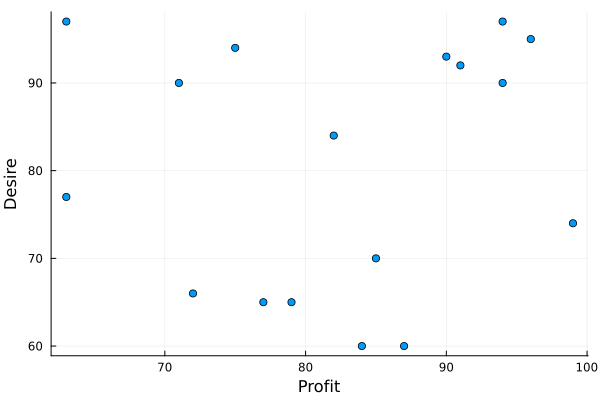

In [214]:
Plots.scatter(
    profit,
    desire;
    xlabel = "Profit",
    ylabel = "Desire",
    legend = false,
)

The goal of the bi-objective knapsack problem is to choose a subset which
maximizes both objectives.

## JuMP formulation

Our JuMP formulation is a direct translation of the mathematical formulation:

In [215]:
model = Model()
@variable(model, x[1:N], Bin)
@constraint(model, sum(weight[i] * x[i] for i in 1:N) <= capacity)
@expression(model, profit_expr, sum(profit[i] * x[i] for i in 1:N))
@expression(model, desire_expr, sum(desire[i] * x[i] for i in 1:N))
@objective(model, Max, [profit_expr, desire_expr])

2-element Vector{AffExpr}:
 77 x[1] + 94 x[2] + 71 x[3] + 63 x[4] + 96 x[5] + 82 x[6] + 85 x[7] + 75 x[8] + 72 x[9] + 91 x[10] + 99 x[11] + 63 x[12] + 84 x[13] + 87 x[14] + 79 x[15] + 94 x[16] + 90 x[17]
 65 x[1] + 90 x[2] + 90 x[3] + 77 x[4] + 95 x[5] + 84 x[6] + 70 x[7] + 94 x[8] + 66 x[9] + 92 x[10] + 74 x[11] + 97 x[12] + 60 x[13] + 60 x[14] + 65 x[15] + 97 x[16] + 93 x[17]

Note how we form a multi-objective program by passing a vector of scalar
objective functions.

## Solution

To solve our model, we need an optimizer which supports multi-objective linear
programs. One option is to use the MultiObjectiveAlgorithms.jl
package.

In [216]:
set_optimizer(model, () -> MOA.Optimizer(HiGHS.Optimizer))
set_silent(model)

MultiObjectiveAlgorithms.jl supports many different algorithms for solving
multiobjective optimization problems. One option is the epsilon-constraint
method:

In [217]:
set_attribute(model, MOA.Algorithm(), MOA.EpsilonConstraint())

Let's solve the problem and see the solution

In [218]:
optimize!(model)
@assert termination_status(model) == OPTIMAL
solution_summary(model)

* Solver : MOA[algorithm=MultiObjectiveAlgorithms.EpsilonConstraint, optimizer=HiGHS]

* Status
  Result count       : 9
  Termination status : OPTIMAL
  Message from the solver:
  "Solve complete. Found 9 solution(s)"

* Candidate solution (result #1)
  Primal status      : FEASIBLE_POINT
  Dual status        : NO_SOLUTION
  Objective value    : [9.18000e+02,9.83000e+02]
  Objective bound    : [9.55000e+02,9.83000e+02]

* Work counters
  Solve time (sec)   : 8.09800e+00


There are 9 solutions available. We can also use `result_count` to see
how many solutions are available:

In [219]:
result_count(model)

9

## Accessing multiple solutions

Access the nine different solutions in the model using the `result` keyword to
`solution_summary`, `value`, and `objective_value`:

In [220]:
solution_summary(model; result = 5)

* Solver : MOA[algorithm=MultiObjectiveAlgorithms.EpsilonConstraint, optimizer=HiGHS]

* Status
  Result count       : 9
  Termination status : OPTIMAL

* Candidate solution (result #5)
  Primal status      : FEASIBLE_POINT
  Dual status        : NO_SOLUTION
  Objective value    : [9.36000e+02,9.42000e+02]


In [221]:
@assert primal_status(model; result = 5) == FEASIBLE_POINT

In [222]:
@assert is_solved_and_feasible(model; result = 5)

In [223]:
objective_value(model; result = 5)

2-element Vector{Float64}:
 936.0
 942.0

Note that because we set a vector of two objective functions, the objective
value is a vector with two elements. We can also query the value of each
objective separately:

In [224]:
value(profit_expr; result = 5)

936.0

## Visualizing objective space

Unlike single-objective optimization problems, multi-objective optimization
problems do not have a single optimal solution. Instead, the solutions
returned represent possible trade-offs that the decision maker can choose
between the two objectives. A common way to visualize this is by plotting
the objective values of each of the solutions:

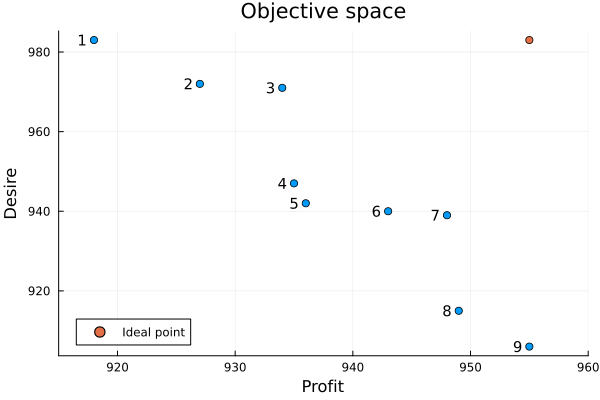

In [225]:
plot = Plots.scatter(
    [value(profit_expr; result = i) for i in 1:result_count(model)],
    [value(desire_expr; result = i) for i in 1:result_count(model)];
    xlabel = "Profit",
    ylabel = "Desire",
    title = "Objective space",
    label = "",
    xlims = (915, 960),
)
for i in 1:result_count(model)
    y = objective_value(model; result = i)
    Plots.annotate!(y[1] - 1, y[2], (i, 10))
end
ideal_point = objective_bound(model)
Plots.scatter!([ideal_point[1]], [ideal_point[2]]; label = "Ideal point")

Visualizing the objective space lets the decision maker choose a solution that
suits their personal preferences. For example, result `#7` is close to the
maximum value of profit, but offers significantly higher desirability compared
with solutions `#8` and `#9`.

The set of items that are chosen in solution `#7` are:

In [226]:
items_chosen = [i for i in 1:N if value(x[i]; result = 7) > 0.9]

11-element Vector{Int64}:
  1
  2
  3
  5
  6
  8
 10
 11
 15
 16
 17

## Next steps

MultiObjectiveAlgorithms.jl implements a number of different
algorithms. Try solving the same problem using `MOA.Dichotomy()`. Does it find
the same solution?

---

# Stochastic optimization: two-stage newsvendor

The purpose of this tutorial is to demonstrate how to model and solve a
two-stage stochastic program.

It is based on the [Two stage stochastic programs](https://jump.dev/JuMP.jl/dev/tutorials/applications/two_stage_stochastic/)
tutorial in JuMP.

This tutorial uses the following packages

In [227]:
using JuMP
using SDDP
import Distributions
import ForwardDiff
import HiGHS
import Plots
import StatsPlots
import Statistics

## Background

The data for this problem is:

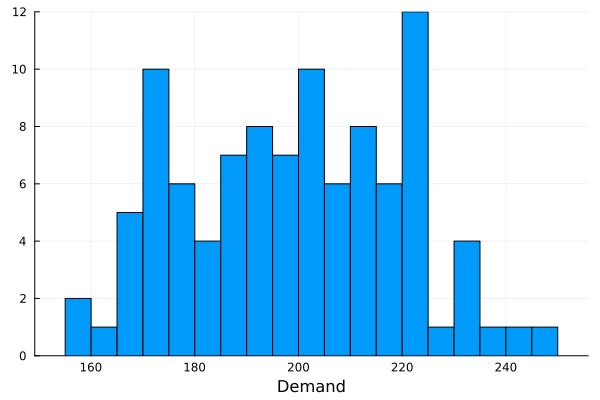

In [228]:
Dist = Distributions.TriangularDist(150.0, 250.0, 200.0)
N = 100
d = sort!(rand(Dist, N));
Ω = 1:N
P = fill(1 / N, N);
StatsPlots.histogram(d; bins = 20, label = "", xlabel = "Demand")

## Kelley's cutting plane algorithm

Kelley's cutting plane algorithm is an iterative method for maximizing concave
functions. Given a concave function $f(x)$, Kelley's constructs an
outer-approximation of the function at the minimum by a set of first-order
Taylor series approximations (called **cuts**) constructed at a set of points
$k = 1,\ldots,K$:
$$
\begin{aligned}
f^K = \max\limits_{\theta \in \mathbb{R}, x \in \mathbb{R}^N} \;\; & \theta\\
& \theta \le f(x_k) + \nabla f(x_k)^\top (x - x_k),\quad k=1,\ldots,K\\
& \theta \le M,
\end{aligned}
$$
where $M$ is a sufficiently large number that is an upper bound for $f$ over
the domain of $x$.

Kelley's cutting plane algorithm is a structured way of choosing points $x_k$
to visit, so that as more cuts are added:
$$
\lim_{K \rightarrow \infty} f^K = \max\limits_{x \in \mathbb{R}^N} f(x)
$$
However, before we introduce the algorithm, we need to introduce some bounds.

### Bounds

By convexity, $f(x) \le f^K$ for all $x$. Thus, if $x^*$ is a maximizer of
$f$, then at any point in time we can construct an upper bound for $f(x^*)$ by
solving $f^K$.

Moreover, we can use the primal solutions $x_k^*$ returned by solving $f^k$ to
evaluate $f(x_k^*)$ to generate a lower bound.

Therefore, $\max\limits_{k=1,\ldots,K} f(x_k^*) \le f(x^*) \le f^K$.

When the lower bound is sufficiently close to the upper bound, we can
terminate the algorithm and declare that we have found an solution that is
close to optimal.

### Implementation

Here is pseudo-code fo the Kelley algorithm:

1. Take as input a convex function $f(x)$ and a iteration limit $K_{max}$.
   Set $K = 1$, and initialize $f^{K-1}$. Set $lb = -\infty$ and $ub = \infty$.
2. Solve $f^{K-1}$ to obtain a candidate solution $x_{K}$.
3. Update $ub = f^{K-1}$ and $lb = \max\{lb, f(x_{K})\}$.
4. Add a cut $\theta \ge f(x_{K}) + \nabla f\left(x_{K}\right)^\top (x - x_{K})$ to form $f^{K}$.
5. Increment $K$.
6. If $K > K_{max}$ or $|ub - lb| < \epsilon$, STOP, otherwise, go to step 2.

And here's a complete implementation:

In [229]:
function kelleys_cutting_plane(
    # The function to be minimized.
    f::Function,
    # The gradient of `f`. By default, we use automatic differentiation to
    # compute the gradient of f so the user doesn't have to!
    ∇f::Function = x -> ForwardDiff.gradient(f, x);
    # The number of arguments to `f`.
    input_dimension::Int,
    # An upper bound for the function `f` over its domain.
    upper_bound::Float64,
    # The number of iterations to run Kelley's algorithm for before stopping.
    iteration_limit::Int,
    # The absolute tolerance ϵ to use for convergence.
    tolerance::Float64 = 1e-6,
)
    # Step (1):
    K = 1
    model = JuMP.Model(HiGHS.Optimizer)
    JuMP.set_silent(model)
    JuMP.@variable(model, θ <= upper_bound)
    JuMP.@variable(model, x[1:input_dimension])
    JuMP.@objective(model, Max, θ)
    x_k = fill(NaN, input_dimension)
    lower_bound, upper_bound = -Inf, Inf
    while true
        # Step (2):
        JuMP.optimize!(model)
        x_k .= JuMP.value.(x)
        # Step (3):
        upper_bound = JuMP.objective_value(model)
        lower_bound = min(upper_bound, f(x_k))
        println("K = $K : $(lower_bound) <= f(x*) <= $(upper_bound)")
        # Step (4):
        JuMP.@constraint(model, θ <= f(x_k) + ∇f(x_k)' * (x .- x_k))
        # Step (5):
        K = K + 1
        # Step (6):
        if K > iteration_limit
            println("-- Termination status: iteration limit --")
            break
        elseif abs(upper_bound - lower_bound) < tolerance
            println("-- Termination status: converged --")
            break
        end
    end
    println("Found solution: x_K = ", x_k)
    return
end

kelleys_cutting_plane (generic function with 2 methods)

Let's run our algorithm to see what happens:

In [230]:
kelleys_cutting_plane(;
    input_dimension = 2,
    upper_bound = 10.0,
    iteration_limit = 20,
) do x
    return -(x[1] - 1)^2 + -(x[2] + 2)^2 + 1.0
end

K = 1 : -4.0 <= f(x*) <= 10.0
K = 2 : -2.25 <= f(x*) <= 10.0
K = 3 : -5.3125 <= f(x*) <= 10.0
K = 4 : 0.83984375 <= f(x*) <= 5.625
K = 5 : -1.3438585069444455 <= f(x*) <= 1.9791666666666667
K = 6 : 0.4532453748914933 <= f(x*) <= 1.7513020833333333
K = 7 : -2.794810401068801 <= f(x*) <= 1.3444010416666663
K = 8 : 0.19507712328139326 <= f(x*) <= 1.3179100884331594
K = 9 : 0.9073862122310157 <= f(x*) <= 1.3022015061077878
K = 10 : 0.7292616273896162 <= f(x*) <= 1.2835882279084943
K = 11 : 0.9856775767620292 <= f(x*) <= 1.1542808575464905
K = 12 : 0.9521967150117504 <= f(x*) <= 1.0538679846579115
K = 13 : 0.9907765147617908 <= f(x*) <= 1.0341945633777465
K = 14 : 0.990619313815891 <= f(x*) <= 1.0168012962055821
K = 15 : 0.9997569528573889 <= f(x*) <= 1.010937796651451
K = 16 : 0.9955736574995747 <= f(x*) <= 1.0023159378334365
K = 17 : 0.9981907645826057 <= f(x*) <= 1.001070011161672
K = 18 : 0.999293284088297 <= f(x*) <= 1.0010295293971427
K = 19 : 0.9997619192401398 <= f(x*) <= 1.00050337

## L-Shaped theory

The L-Shaped method is a way of solving two-stage stochastic programs by
Benders' decomposition. It takes the problem:

$$
\begin{aligned}
V = \max\limits_{x,y_\omega} \;\; & -2x + \mathbb{E}_\omega[5y_\omega - 0.1(x - y_\omega)] \\
  & y_\omega \le x              & \quad \forall \omega \in \Omega \\
  & 0 \le y_\omega \le d_\omega & \quad \forall \omega \in \Omega \\
  & x \ge 0.
\end{aligned}
$$

and decomposes it into a second-stage problem:

$$
\begin{aligned}
V_2(\bar{x}, d_\omega) = \max\limits_{x,x^\prime,y_\omega} \;\; & 5y_\omega - x^\prime \\
  & y_\omega \le x \\
  & x^\prime = x - y_\omega \\
  & 0 \le y_\omega \le d_\omega \\
  & x = \bar{x} & [\lambda]
\end{aligned}
$$

and a first-stage problem:

$$
\begin{aligned}
V = \max\limits_{x,\theta} \;\; & -2x + \theta \\
  & \theta \le \mathbb{E}_\omega[V_2(x, \omega)] \\
  & x \ge 0
\end{aligned}
$$

Then, because $V_2$ is convex with respect to $\bar{x}$ for fixed $\omega$,
we can use a set of feasible points $\{x^k\}$ construct an outer approximation:
$$
\begin{aligned}
V^K = \max\limits_{x,\theta} \;\; & -2x + \theta \\
  & \theta \le \mathbb{E}_\omega[V_2(x^k, \omega) + \nabla V_2(x^k, \omega)^\top(x - x^k)] & \quad k = 1,\ldots,K\\
  & x \ge 0 \\
  & \theta \le M
\end{aligned}
$$
where $M$ is an upper bound on possible values of $V_2$ so that the problem
has a bounded solution.

It is also useful to see that because $\bar{x}$ appears only on the right-hand
side of a linear program, $\nabla V_2(x^k, \omega) = \lambda^k$.

Ignoring how we choose $x^k$ for now, we can construct a lower and upper bound
on the optimal solution:

$$-2x^K + \mathbb{E}_\omega[V_2(x^K, \omega)] = \underline{V} \le V \le \overline{V} = V^K$$

Thus, we need some way of cleverly choosing a sequence of $x^k$ so that the
lower bound converges to the upper bound.

1. Start with $K=1$
2. Solve $V^{K-1}$ to get $x^K$
3. Set $\overline{V} = V^k$
4. Solve $V_2(x^K, \omega)$ for all $\omega$ and store the optimal objective
   value and dual solution $\lambda^K$
5. Set $\underline{V} = -2x^K + \mathbb{E}_\omega[V_2(x^k, \omega)]$
6. If $\underline{V} \approx \overline{V}$, STOP
7. Add new constraint $\theta \le \mathbb{E}_\omega[V_2(x^K, \omega) +\lambda^K (x - x^K)]$
8. Increment $K$, GOTO 2

The next section implements this algorithm in Julia.

## L-Shaped implementation

Here's a function to compute the second-stage problem;

In [231]:
function solve_second_stage(x̅, d_ω)
    model = Model(HiGHS.Optimizer)
    set_silent(model)
    @variable(model, x_in)
    @variable(model, x_out >= 0)
    fix(x_in, x̅)
    @variable(model, 0 <= u_sell <= d_ω)
    @constraint(model, x_out == x_in - u_sell)
    @constraint(model, u_sell <= x_in)
    @objective(model, Max, 5 * u_sell - 0.1 * x_out)
    optimize!(model)
    return (
        V = objective_value(model),
        λ = reduced_cost(x_in),
        x = value(x_out),
        u = value(u_sell),
    )
end

solve_second_stage(200, 170)

(V = 847.0, λ = -0.1, x = 30.0, u = 170.0)

Here's the first-stage subproblem:

In [232]:
model = Model(HiGHS.Optimizer)
set_silent(model)
@variable(model, x_in == 0)
@variable(model, x_out >= 0)
@variable(model, u_make >= 0)
@constraint(model, x_out == x_in + u_make)
M = 5 * maximum(d)
@variable(model, θ <= M)
@objective(model, Max, -2 * u_make + θ)

-2 u_make + θ

Importantly, to ensure we have a bounded solution, we need to add an upper
bound to the variable `θ`.

In [233]:
kIterationLimit = 100
for k in 1:kIterationLimit
    println("Solving iteration k = $k")
    # Step 2
    optimize!(model)
    xᵏ = value(x_out)
    println("  xᵏ = $xᵏ")
    # Step 3
    ub = objective_value(model)
    println("  V̅ = $ub")
    # Step 4
    ret = [solve_second_stage(xᵏ, d[ω]) for ω in Ω]
    # Step 5
    lb = value(-2 * u_make) + sum(p * r.V for (p, r) in zip(P, ret))
    println("  V̲ = $lb")
    # Step 6
    if ub - lb < 1e-6
        println("Terminating with near-optimal solution")
        break
    end
    # Step 7
    c = @constraint(
        model,
        θ <= sum(p * (r.V + r.λ * (x_out - xᵏ)) for (p, r) in zip(P, ret)),
    )
    println("  Added cut: $c")
end

Solving iteration k = 1
  xᵏ = -0.0
  V̅ = 1230.7662446531492
  V̲ = 0.0
  Added cut: -4.99999999999999 x_out + θ <= 0
Solving iteration k = 2
  xᵏ = 246.15324893063033
  V̅ = 738.4597467918886
  V̲ = 497.81468108654855
  Added cut: 0.10000000000000007 x_out + θ <= 1014.7365038408719
Solving iteration k = 3
  xᵏ = 198.9679419295831
  V̅ = 596.9038257887473
  V̲ = 552.598424913193
  Added cut: -2.551999999999999 x_out + θ <= 442.76812096806134
Solving iteration k = 4
  xᵏ = 215.67435251614285
  V̅ = 561.8203635569721
  V̲ = 549.4482063949437
  Added cut: -1.1240000000000003 x_out + θ <= 738.3789391990838
Solving iteration k = 5
  xᵏ = 207.0103769124809
  V̅ = 557.0378490237506
  V̲ = 553.710312401872
  Added cut: -1.838000000000001 x_out + θ <= 587.2459934616943
Solving iteration k = 6
  xᵏ = 202.34996147567696
  V̅ = 554.4652997026349
  V̲ = 553.7441502659792
  Added cut: -2.1440000000000006 x_out + θ <= 524.6057558134816
Solving iteration k = 7
  xᵏ = 204.70665898108774
  V̅ = 554.083

To get the first-stage solution, we do:

In [234]:
optimize!(model)
xᵏ = value(x_out)

204.4949635004757

To compute a second-stage solution, we do:

In [235]:
solve_second_stage(xᵏ, 170.0)

(V = 846.5505036499525, λ = -0.1, x = 34.494963500475706, u = 170.0)

## Policy Graph

Now let's see how we can formulate and train a policy for the two-stage
newsvendor problem using `SDDP.jl`. Under the hood, `SDDP.jl` implements the
exact algorithm that we just wrote by hand.

In [236]:
model = SDDP.LinearPolicyGraph(;
    stages = 2,
    sense = :Max,
    upper_bound = 5 * maximum(d),  # The `M` in θ <= M
    optimizer = HiGHS.Optimizer,
) do subproblem::JuMP.Model, stage::Int
    @variable(subproblem, x >= 0, SDDP.State, initial_value = 0)
    if stage == 1
        @variable(subproblem, u_make >= 0)
        @constraint(subproblem, x.out == x.in + u_make)
        @stageobjective(subproblem, -2 * u_make)
    else
        @variable(subproblem, u_sell >= 0)
        @constraint(subproblem, u_sell <= x.in)
        @constraint(subproblem, x.out == x.in - u_sell)
        SDDP.parameterize(subproblem, d, P) do ω
            set_upper_bound(u_sell, ω)
            return
        end
        @stageobjective(subproblem, 5 * u_sell - 0.1 * x.out)
    end
    return
end

SDDP.train(model; log_every_iteration = true)

-------------------------------------------------------------------
         SDDP.jl (c) Oscar Dowson and contributors, 2017-24
-------------------------------------------------------------------
problem
  nodes           : 2
  state variables : 1
  scenarios       : 1.00000e+02
  existing cuts   : false
options
  solver          : serial mode
  risk measure    : SDDP.Expectation()
  sampling scheme : SDDP.InSampleMonteCarlo
subproblem structure
  VariableRef                             : [4, 4]
  AffExpr in MOI.EqualTo{Float64}         : [1, 1]
  AffExpr in MOI.LessThan{Float64}        : [1, 1]
  VariableRef in MOI.GreaterThan{Float64} : [2, 3]
  VariableRef in MOI.LessThan{Float64}    : [1, 1]
numerical stability report
  matrix range     [1e+00, 1e+00]
  objective range  [1e-01, 5e+00]
  bounds range     [2e+02, 1e+03]
  rhs range        [0e+00, 0e+00]
-------------------------------------------------------------------
 iteration    simulation      bound        time (s)     solves  

One way to query the optimal policy is with `SDDP.DecisionRule`:

In [237]:
first_stage_rule = SDDP.DecisionRule(model; node = 1)

A decision rule for node 1

In [238]:
solution_1 = SDDP.evaluate(first_stage_rule; incoming_state = Dict(:x => 0.0))

(stage_objective = -408.989927000881, outgoing_state = Dict(:x => 204.4949635004405), controls = Dict{Any, Any}())

Here's the second stage:

In [239]:
second_stage_rule = SDDP.DecisionRule(model; node = 2)
solution = SDDP.evaluate(
    second_stage_rule;
    incoming_state = Dict(:x => solution_1.outgoing_state[:x]),
    noise = 170.0,  # A value of d[ω], can be out-of-sample.
    controls_to_record = [:u_sell],
)

(stage_objective = 846.550503649956, outgoing_state = Dict(:x => 34.49496350044049), controls = Dict(:u_sell => 170.0))

## Simulation

Querying the decision rules is tedious. It's often more useful to simulate the
policy:

In [240]:
simulations = SDDP.simulate(
    model,
    10,  #= number of replications =#
    [:x, :u_sell, :u_make];  #= variables to record =#
    skip_undefined_variables = true,
);

`simulations` is a vector with 10 elements

In [241]:
length(simulations)

10

and each element is a vector with two elements (one for each stage)

In [242]:
length(simulations[1])

2

The first stage contains:

In [243]:
simulations[1][1]

Dict{Symbol, Any} with 9 entries:
  :u_make          => 204.495
  :bellman_term    => 962.894
  :noise_term      => nothing
  :node_index      => 1
  :stage_objective => -408.99
  :objective_state => nothing
  :u_sell          => NaN
  :belief          => Dict(1=>1.0)
  :x               => State{Float64}(0.0, 204.495)

The second stage contains:

In [244]:
simulations[1][2]

Dict{Symbol, Any} with 9 entries:
  :u_make          => NaN
  :bellman_term    => 0.0
  :noise_term      => 246.153
  :node_index      => 2
  :stage_objective => 1022.47
  :objective_state => nothing
  :u_sell          => 204.495
  :belief          => Dict(2=>1.0)
  :x               => State{Float64}(204.495, 0.0)

We can compute aggregated statistics across the simulations:

In [245]:
objectives = map(simulations) do simulation
    return sum(data[:stage_objective] for data in simulation)
end
μ, t = SDDP.confidence_interval(objectives)
println("Simulation ci : $μ ± $t")

Simulation ci : 553.8238623863971 ± 55.25804985147116


## Things to try

There are a number of things you can try next:

 * Experiment with different buy and sales prices
 * Experiment with different distributions of demand
 * Explore how the optimal policy changes if you use a different risk measure
 * What happens if you can only buy and sell integer numbers of newspapers?
   Try this by adding `Int` to the variable definitions:
   `@variable(subproblem, buy >= 0, Int)`
 * What happens if you use a different upper bound? Try an invalid one like
   `-100`, and a very large one like `1e12`.

---

# SDDP.jl - Multi stage stochastic optimization

## Applied to energy planning

## an application in the Brazilian system

The power system data

Thermal plant data

In [246]:
thermal_ub = Array{Float64, 2}[
    [657 1350 36 250 250 28 529 44 255 235 386 386 145 226 131 87 204 923 923 400 100 200 169 386 28 200 272 30 168 440 400 258 258 258 64 340 1058 1058 10 197 175 206 54],
    [66 485 485 350 161 72 4 20 100 132 262 363 24 126 320 20 640],
    [13 11 32 11 347 152 150 13 15 220 220 13 15 138 347 149 149 15 102 15 168 13 13 103 136 53 66 186 50 156 171 533 323],
    [166 166]
]
thermal_lb = Array{Float64,2}[
    [520.0  1080.0  0.0  59.3  27.1  0.0  0.0  0.0  219.78  199.99  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  399.99  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  71.7  28.8  0.0  132.98  0.0  0.0  0.0],
    [0.0 0.0 0.0 210.0 0.0 27.0 0.0 9.56 25.0 79.46 147.54 228.02 0.0 49.66 105.0 5.0 0.0],
    [0.0 0.0 0.0 0.0 0.7 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 223.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 348.8 0.0],
    [0 0]
]
thermal_obj = Array{Float64, 2}[
    [21.49 18.96 937.0 194.79 222.22 140.58 6.27 505.92 0.01 112.46 159.97 250.87 550.66 188.89 645.3 150.0 145.68 274.54 253.83 37.8 51.93 90.69 131.68 317.98 152.8 470.34 317.98 523.35 730.54 310.41 730.54 101.33 140.34 292.49 610.33 487.56 122.65 214.48 1047.38 0.01 329.57 197.85 733.54],
    [564.57 219.0 219.0 50.47 541.93 154.1 180.51 218.77 189.54 143.04 142.86 116.9 780.0 115.9 115.9 248.31 141.18],
    [464.64 464.64 455.13 464.64 834.35 509.86 509.86 464.64 464.64 185.09 492.29 464.64 464.64 188.15 82.34 329.37 329.37 464.64 464.64 464.64 317.19 464.64 464.64 678.03 559.39 611.57 611.56 204.43 325.67 678.03 329.2 70.16 287.83],
    [329.56 329.56]
]
N_THERMAL = [43, 17, 33, 2];

Demand data

In [247]:
deficit_obj = [1142.8, 2465.4, 5152.46, 5845.54]
deficit_ub = [0.05, 0.05, 0.1, 0.8]
demand =  Array{Float64, 2}[
    [45515  11692  10811  6507],
    [46611  11933  10683  6564],
    [47134  12005  10727  6506],
    [46429  11478  10589  6556],
    [45622  11145  10389  6645],
    [45366  11146  10129  6669],
    [45477  11055  10157  6627],
    [46149  11051  10372  6772],
    [46336  10917  10675  6843],
    [46551  11015  10934  6815],
    [46035  11156  11004  6871],
    [45234  11297  10914  6701]
]

12-element Vector{Matrix{Float64}}:
 [45515.0 11692.0 10811.0 6507.0]
 [46611.0 11933.0 10683.0 6564.0]
 [47134.0 12005.0 10727.0 6506.0]
 [46429.0 11478.0 10589.0 6556.0]
 [45622.0 11145.0 10389.0 6645.0]
 [45366.0 11146.0 10129.0 6669.0]
 [45477.0 11055.0 10157.0 6627.0]
 [46149.0 11051.0 10372.0 6772.0]
 [46336.0 10917.0 10675.0 6843.0]
 [46551.0 11015.0 10934.0 6815.0]
 [46035.0 11156.0 11004.0 6871.0]
 [45234.0 11297.0 10914.0 6701.0]

Interconnection data

In [248]:
exchange_ub =  Array{Float64, 2}[
    [0	7379	1000	0	4000],
    [5625	0	0	0	0],
    [600	0	0	0	2236],
    [0	0	0	0	99999],
    [3154	0	3951	3053	0]
]

5-element Vector{Matrix{Float64}}:
 [0.0 7379.0 … 0.0 4000.0]
 [5625.0 0.0 … 0.0 0.0]
 [600.0 0.0 … 0.0 2236.0]
 [0.0 0.0 … 0.0 99999.0]
 [3154.0 0.0 … 3053.0 0.0]

Hydro plant data

In [249]:
hydro_ub = [45414.3, 13081.5, 9900.9, 7629.9]
storedEnergy_initial = [59419.3000, 5874.9000, 12859.2000, 5271.5000]
storedEnergy_ub = [200717.6, 19617.2, 51806.1, 12744.9]
inflow_initial = [39717.564, 6632.5141, 15897.183, 2525.938]
scenarios =[
    [[56896.8, 56451.95, 65408.16, 46580.39, 54645.97, 36916.81, 63301.09, 53645.87, 57959.52, 54200.71, 48448.49, 45010.7, 81105.82, 35019.44, 41229.43, 80514.3, 51163.61, 53329.75, 50702.92, 42240.62, 55109.13, 33675.91, 25129.81, 29190.4, 36301.34, 37791.77, 58268.57, 39743.58, 62565.51, 49713.71, 72890.69, 45726.42, 66364.28, 37928.66, 62789.08, 73042.18, 66665.7, 52993.58, 31559.83, 56002.39, 30617.05, 40899.73, 54433.46, 62568.66, 51341.31, 40927.71, 73413.29, 69900.43, 66850.87, 76182.63, 72077.01, 84213.88, 64555.38, 72950.98, 53957.75, 53046.27, 47082.36, 58093.71, 80492.3, 47948.51, 60261.41, 47993.66, 64712.19, 52583.97, 55161.47, 92429.3, 43304.33, 58739.64, 55468.74, 40817.11, 63727.25, 60146.67, 47266.3, 67074.83, 46916.31, 95400.9, 38313.51, 54999.69, 71369.67, 76664.21, 73633.5, 46999.32], [86488.31, 61922.34, 51128.33, 37113.35, 72711.15, 29950.27, 43981.97, 45561.95, 57663.45, 75154.55, 38353.62, 51036.28, 73890.02, 47726.22, 71175.26, 62788.22, 61001.38, 57412.95, 72857.05, 65235.58, 67209.56, 50100.68, 26092.14, 44292.32, 27535.59, 25749.92, 62387.31, 57549.88, 50654.11, 59386.44, 77049.72, 60836.23, 59055.5, 61202.37, 78078.5, 78991.29, 71465.94, 47197.58, 37602.63, 57691.13, 20504.58, 58197.41, 54655.96, 45842.69, 48096.68, 47690.98, 71610.48, 47429.75, 89520.11, 92447.91, 47928.35, 71909.26, 47626.61, 70620.4, 50034.14, 59045.22, 57525.75, 61449.32, 41790.65, 65572.44, 86433.67, 68600.8, 51672.08, 83801.3, 41190.08, 73474.32, 53990.6, 50665.03, 67756.3, 40550.35, 70939.21, 61771.53, 71467.42, 59049.86, 49152.53, 91724.84, 63801.6, 66431.93, 59988.07, 50373.33, 49701.05, 56717.86], [88646.94, 50742.1, 40424.25, 35392.72, 61323.17, 53709.93, 39542.99, 40185.12, 34083.82, 68610.98, 35718.51, 62628.01, 69692.0, 51495.85, 62809.69, 70220.74, 93477.21, 59883.76, 53172.92, 56491.72, 65725.0, 77701.54, 32542.38, 29444.29, 29070.61, 37872.92, 63481.8, 47988.85, 52728.54, 63441.32, 78376.69, 60248.39, 41110.96, 37183.08, 83982.68, 72883.91, 61051.15, 52788.25, 33315.79, 58386.71, 25463.7, 52687.47, 48144.5, 63161.07, 36378.46, 48314.32, 39789.9, 54422.3, 57184.51, 62386.9, 43430.01, 85259.92, 39652.55, 71335.51, 47263.74, 47293.6, 62981.06, 54515.96, 43462.15, 68127.72, 55948.83, 56153.76, 61042.16, 52448.52, 54230.46, 57821.91, 55790.78, 59436.74, 62295.26, 38312.37, 49257.88, 48780.76, 62710.63, 57188.43, 59325.77, 51971.26, 64294.7, 47939.56, 54351.96, 86775.98, 37212.98, 49482.34], [64581.71, 35954.27, 34627.46, 27179.93, 54644.39, 37115.42, 35188.12, 30857.44, 28957.8, 38145.67, 33851.76, 45004.41, 41888.5, 32537.77, 61618.73, 45492.33, 57661.37, 40768.91, 36675.8, 39891.03, 46600.38, 41833.13, 35331.16, 24828.12, 28963.44, 26392.81, 57277.26, 40083.16, 39037.46, 40510.26, 49649.42, 35895.16, 28420.51, 27653.31, 52072.86, 47120.75, 42126.42, 31221.08, 23267.58, 33811.21, 21492.44, 37357.77, 49257.71, 56164.65, 34749.3, 38150.11, 44706.32, 35701.34, 40448.63, 52746.17, 40067.9, 62428.88, 42785.49, 52326.19, 32913.93, 41161.01, 44123.86, 36565.93, 35065.17, 68823.2, 50669.57, 47121.6, 43602.65, 47373.13, 36659.8, 45289.32, 45618.72, 34198.26, 38268.72, 28944.83, 31516.06, 42862.66, 48390.75, 37943.12, 50501.94, 35807.24, 52671.46, 49262.74, 46138.46, 55543.29, 32317.51, 51632.89], [43078.74, 27000.91, 24456.72, 19080.88, 34731.77, 24512.01, 27671.57, 25654.34, 24788.09, 29380.5, 18923.09, 30031.07, 26936.13, 22540.12, 34858.01, 30581.26, 34635.02, 24931.13, 27008.57, 27616.21, 28566.65, 25574.69, 21342.69, 30732.45, 17083.18, 29745.45, 34161.48, 32373.28, 25060.83, 30213.42, 39757.11, 26435.75, 20601.37, 21707.83, 45436.42, 34622.49, 28792.77, 22897.49, 17471.04, 24573.34, 18395.36, 23937.22, 31238.07, 34468.55, 23514.07, 29321.19, 29379.36, 28537.54, 34587.4, 35207.58, 27619.03, 39712.36, 35169.64, 37162.41, 31130.86, 39983.01, 35946.54, 28366.52, 29951.98, 40186.78, 50571.36, 32563.19, 32207.74, 34805.16, 26620.61, 32791.29, 35023.07, 26037.19, 25014.17, 22937.9, 28856.74, 27047.64, 37864.66, 31422.07, 29368.14, 29439.74, 36583.08, 31676.46, 29744.25, 34050.76, 30086.86, 29348.76], [32150.18, 25285.24, 19099.7, 14173.57, 26184.86, 17752.6, 23148.61, 20780.68, 20168.94, 21178.59, 16560.55, 29365.82, 23855.04, 17234.34, 26267.7, 26141.76, 26250.48, 22090.39, 21541.84, 20595.83, 23051.97, 22945.63, 17305.82, 23164.67, 18172.0, 32394.56, 25360.63, 28995.24, 20275.84, 24027.02, 27505.81, 22703.44, 17584.25, 16834.37, 30722.54, 25847.39, 26649.2, 18519.69, 18348.12, 20415.98, 19592.53, 19778.88, 25505.35, 29621.4, 18642.25, 33204.9, 25960.33, 27167.15, 26294.99, 28241.02, 25324.0, 39552.75, 24145.72, 28054.54, 22726.21, 34494.79, 32289.77, 23823.56, 23255.09, 29651.66, 34628.41, 31515.82, 28821.56, 25045.89, 21037.21, 39653.57, 26762.9, 24243.85, 21432.57, 20539.73, 20990.06, 22862.46, 33766.52, 28192.96, 23389.44, 24328.4, 28371.8, 25816.19, 23648.83, 28276.29, 38658.88, 38515.33], [25738.04, 19913.2, 16790.67, 11860.9, 19927.38, 14706.5, 16354.45, 18619.35, 16549.77, 16631.69, 15759.09, 23062.33, 18597.07, 14480.2, 24962.54, 26915.97, 22787.45, 17159.91, 17111.7, 17576.81, 19086.23, 17400.83, 13620.22, 15434.43, 15196.4, 21098.2, 28206.5, 22466.48, 16221.58, 20073.41, 21229.3, 17647.23, 14939.49, 15664.9, 27837.17, 21366.45, 21327.28, 15599.11, 13938.13, 19611.86, 17830.94, 21998.19, 23299.17, 23916.43, 18258.67, 26281.64, 20098.85, 24116.7, 22630.54, 26739.58, 19458.87, 38487.54, 20195.47, 23486.83, 19228.76, 24159.73, 21535.23, 21521.31, 24639.11, 24871.76, 26304.24, 23268.23, 24487.15, 23871.07, 18284.17, 28291.17, 20945.59, 22369.94, 19811.22, 17389.8, 18273.11, 19522.99, 27882.67, 21450.9, 20552.6, 23607.35, 21404.13, 28296.36, 20808.6, 24527.67, 26593.14, 31033.18], [20606.05, 16801.72, 14192.07, 9904.96, 19833.32, 13891.48, 13870.17, 16287.23, 13383.61, 13732.02, 15122.03, 16335.75, 15380.33, 12027.54, 16431.03, 18109.8, 19971.19, 16989.68, 14138.87, 13614.16, 15974.7, 14098.04, 11590.2, 11597.36, 11400.63, 23751.08, 25079.71, 16940.29, 15396.49, 17698.38, 17329.15, 15414.73, 13043.51, 13406.36, 21583.89, 17619.21, 16981.52, 15169.28, 11339.97, 14285.46, 13204.94, 19390.34, 18399.97, 18752.41, 14739.07, 25994.83, 15773.26, 18723.76, 21783.59, 21137.32, 17354.26, 26962.54, 20638.69, 19665.77, 22455.74, 18405.64, 17890.93, 25762.9, 22246.87, 19802.24, 22481.12, 20835.04, 19030.91, 16927.84, 16072.49, 21382.07, 22745.14, 15799.05, 18981.85, 14811.25, 16522.04, 15604.83, 19421.44, 17115.78, 17471.55, 19105.94, 22977.11, 24641.57, 16121.9, 24298.46, 17342.35, 19248.41], [22772.16, 15034.4, 13741.74, 11835.56, 18289.43, 17056.12, 12040.76, 14448.98, 12275.62, 12255.37, 17561.96, 16624.51, 14661.5, 10510.08, 14125.62, 14929.4, 24107.77, 13659.7, 12283.03, 11761.84, 13469.6, 14120.36, 12719.73, 10034.25, 11259.79, 16559.39, 31762.07, 20615.73, 12660.14, 13992.03, 15396.42, 16368.64, 11565.03, 10941.74, 17168.12, 17513.5, 16020.86, 13917.48, 9500.66, 19390.18, 12671.12, 18785.94, 18905.01, 16947.82, 12242.09, 29837.37, 18936.32, 19703.51, 27774.12, 22748.74, 14303.81, 22450.11, 22886.6, 18904.29, 17416.04, 18858.4, 15528.36, 26579.42, 26121.59, 17212.57, 28153.06, 23376.16, 15224.49, 15583.27, 21217.4, 20427.43, 23452.75, 16741.52, 30198.36, 15672.8, 17535.92, 15052.75, 15273.23, 19793.78, 18612.71, 13365.51, 16452.14, 32081.91, 13964.53, 16749.78, 14773.73, 17116.17], [23767.55, 22347.14, 17339.43, 12925.78, 34902.46, 14124.93, 21610.55, 18611.16, 13874.47, 14368.61, 21513.16, 18401.39, 23147.1, 11673.81, 17407.93, 19596.07, 25084.21, 15580.89, 14990.72, 17952.25, 15543.08, 16393.5, 18436.23, 11431.06, 11965.3, 14726.15, 22453.76, 21456.65, 14941.06, 16395.21, 14685.41, 25111.82, 13330.21, 17590.17, 30383.6, 23226.29, 15479.99, 17075.9, 18972.43, 21841.24, 18849.04, 42223.31, 26037.88, 20118.15, 22821.5, 30995.92, 18894.75, 18612.61, 25497.0, 21882.33, 26321.83, 32933.12, 21215.67, 18142.29, 15945.98, 21042.48, 20583.84, 20560.02, 26845.0, 26617.84, 34139.15, 29715.86, 16112.45, 25927.78, 22152.14, 25137.8, 33871.69, 13858.76, 18798.82, 22151.35, 13284.47, 15851.55, 21942.79, 23406.24, 26217.27, 13559.07, 21131.23, 37332.1, 22115.41, 25199.08, 15185.71, 24053.0], [25831.89, 25004.76, 18503.66, 13594.84, 26176.69, 18411.58, 35511.48, 22441.18, 24967.68, 29859.02, 27124.93, 25773.5, 31708.34, 21600.95, 29777.43, 22391.65, 24543.99, 22869.29, 21100.25, 30429.5, 16296.95, 24523.57, 22523.1, 15501.59, 18872.23, 22472.39, 28037.37, 24399.38, 22887.14, 26654.33, 22534.09, 26281.36, 20988.75, 24865.56, 34692.72, 35360.85, 27010.2, 20988.36, 38522.5, 24500.92, 25310.61, 43420.75, 35193.52, 21707.73, 31387.95, 40779.06, 28225.77, 30537.62, 33284.42, 27321.85, 47896.08, 38532.69, 22792.1, 24029.92, 17271.2, 29198.04, 26072.51, 27553.75, 24614.4, 22967.04, 46357.71, 21313.7, 23953.59, 25345.95, 36517.51, 33685.87, 28944.96, 20108.6, 29306.63, 26133.38, 22837.29, 21655.14, 26349.73, 29076.36, 29204.23, 23931.0, 26396.78, 37931.62, 29379.11, 27410.53, 23276.7, 22846.94], [38566.5, 48755.6, 36070.84, 33700.23, 32033.65, 34416.72, 53788.68, 40579.16, 37058.66, 34210.67, 40816.63, 41600.78, 39227.88, 27408.38, 59081.29, 28648.63, 44644.33, 48005.17, 34140.7, 43351.87, 25642.92, 28734.88, 33971.28, 23822.86, 35724.0, 44481.07, 41970.5, 30205.39, 27119.48, 42229.06, 26492.55, 52567.64, 16616.9, 38767.96, 53610.53, 42361.49, 41348.52, 38279.56, 39293.9, 24936.41, 45488.06, 47985.13, 44074.47, 36129.72, 44509.73, 59740.8, 50561.77, 46501.2, 43322.51, 53996.58, 63642.28, 60795.26, 44335.09, 32110.3, 41561.28, 48844.35, 32901.12, 63065.14, 25343.75, 35462.89, 54242.97, 35365.63, 36427.0, 34081.72, 46049.51, 50920.23, 39745.84, 31191.19, 45301.54, 40578.93, 35212.74, 33943.97, 40568.42, 56921.92, 56973.22, 30130.6, 38489.84, 62539.4, 44712.54, 44675.39, 27895.03, 40031.75]],
    [[7409.65, 5285.8, 3001.83, 4138.99, 3066.59, 10383.66, 5287.43, 8187.34, 3943.3, 10381.68, 6545.04, 4552.72, 2079.84, 6164.98, 1251.1, 8897.66, 6681.96, 5057.3, 2765.38, 5640.01, 6542.95, 3614.85, 5157.45, 9775.0, 3532.37, 7963.4, 4487.86, 4568.18, 5754.32, 2392.87, 5033.56, 4662.57, 5379.87, 3421.47, 3443.25, 10618.72, 7738.41, 4293.84, 9312.11, 5193.9, 21746.41, 4706.82, 10653.16, 8235.54, 6049.5, 12573.63, 10453.06, 4559.98, 3345.05, 7615.64, 13613.82, 4352.26, 6707.33, 3669.72, 2201.57, 10074.15, 4184.64, 10019.61, 17804.81, 3565.4, 5879.48, 5832.71, 4577.42, 25365.49, 12539.04, 10514.99, 15729.86, 5633.35, 5183.68, 13152.25, 7376.78, 7860.47, 8996.77, 5580.37, 4540.66, 6978.33, 7455.89, 5698.04, 16393.73, 12394.23, 6995.32, 9082.73], [3310.83, 8062.89, 3654.84, 9033.31, 2362.85, 3898.48, 4513.4, 13477.36, 4740.13, 7285.45, 12151.87, 10352.82, 3486.56, 3406.67, 2971.79, 20768.1, 9061.81, 8224.11, 1570.63, 5359.67, 12352.37, 3386.15, 6784.36, 6536.57, 4660.27, 8235.06, 8088.39, 3340.72, 7829.11, 4352.61, 4795.93, 5413.19, 11713.01, 4757.09, 4522.48, 20932.73, 9141.88, 3285.2, 10066.11, 4455.28, 11552.65, 12269.5, 10468.36, 9002.04, 5860.44, 7508.74, 12318.39, 3235.6, 2194.14, 5643.44, 11462.12, 6245.81, 6277.39, 8884.32, 4848.83, 9729.31, 5485.64, 14811.7, 10648.59, 3761.5, 7278.83, 9536.28, 13817.35, 13096.53, 17130.25, 22862.44, 24230.34, 8581.54, 7113.62, 20982.56, 6045.08, 9222.95, 4546.8, 2940.42, 3964.14, 7361.53, 5088.3, 5016.72, 15194.28, 21152.87, 5652.86, 7008.55], [3531.16, 8957.82, 3178.5, 5661.19, 3920.46, 3192.74, 7943.57, 4450.77, 9119.71, 4152.1, 7162.92, 8022.63, 2625.92, 6848.3, 3557.74, 14045.21, 6520.86, 6961.17, 3556.14, 8411.78, 11429.84, 2230.74, 3992.71, 7969.13, 4549.48, 3313.02, 4545.53, 8838.47, 4668.06, 3669.42, 15984.43, 6576.64, 10767.53, 3570.63, 4235.19, 13186.42, 10917.71, 2383.55, 7337.93, 4407.09, 11764.32, 9027.47, 6818.93, 9784.05, 5397.65, 8063.08, 8816.87, 3862.52, 3064.56, 9661.19, 4296.19, 4495.0, 5847.07, 6069.88, 4624.77, 3468.4, 4250.2, 7617.02, 6740.4, 2684.69, 8381.6, 8806.7, 7754.79, 7409.02, 13363.84, 9009.28, 19240.02, 5934.64, 8157.78, 11087.25, 4701.61, 8340.18, 3298.56, 2573.23, 3841.08, 9617.28, 4361.84, 4489.77, 9947.14, 12903.63, 4081.37, 12931.71], [2353.66, 22946.34, 1915.96, 7733.04, 2226.69, 2185.88, 6631.63, 6487.54, 5866.0, 8074.36, 7868.09, 10546.97, 1688.78, 3087.12, 1741.49, 5864.41, 3458.65, 7225.75, 6108.43, 3926.93, 3806.83, 1902.29, 3819.01, 6620.64, 9949.45, 11652.24, 4593.81, 3802.02, 7744.68, 3889.71, 9788.63, 3406.09, 6520.22, 6098.12, 3651.4, 5380.46, 4926.98, 2946.66, 12300.54, 3184.24, 12646.55, 7475.65, 5240.93, 4617.32, 3535.66, 5904.84, 7948.66, 1798.65, 3848.84, 4646.03, 4152.64, 2387.97, 6547.01, 10506.71, 8239.95, 9202.59, 5175.82, 7624.21, 12563.21, 2986.48, 7367.14, 5978.42, 6962.84, 4322.28, 11487.66, 3009.02, 31342.11, 8825.75, 4447.53, 9064.37, 4165.87, 4096.91, 3955.58, 6297.93, 2904.26, 8573.7, 5924.05, 1862.2, 20304.29, 11443.51, 4044.25, 7779.19], [17558.02, 17069.88, 2373.08, 6640.39, 1450.68, 5979.91, 3956.49, 14053.4, 11313.75, 8310.5, 17098.26, 11110.55, 3212.31, 1592.55, 1334.46, 5709.2, 4518.4, 11781.72, 4506.92, 5104.84, 2133.69, 1043.65, 3239.48, 18109.4, 14302.91, 12349.19, 4368.35, 2571.06, 8080.39, 3456.32, 6937.35, 4590.22, 3230.86, 6796.7, 14037.3, 3558.01, 2740.89, 2453.37, 6787.76, 7295.93, 15120.17, 3096.41, 12410.99, 4217.96, 2908.24, 7652.33, 3403.23, 1455.04, 15926.21, 6319.06, 3693.18, 2355.48, 11477.68, 7674.08, 7162.96, 28746.46, 19092.13, 12718.81, 13068.09, 2481.35, 25132.34, 12574.9, 11651.35, 2542.44, 3187.46, 3284.15, 22128.38, 4682.77, 4893.5, 12036.91, 9303.87, 4280.55, 8789.31, 14544.79, 1575.72, 19676.18, 9801.09, 2633.78, 23860.08, 6368.47, 5820.42, 5027.03], [16500.03, 14116.42, 2586.88, 5006.4, 4870.91, 24757.16, 3074.31, 18436.3, 8302.23, 5509.57, 12544.69, 8996.38, 11259.67, 2864.72, 2111.65, 9705.3, 8521.81, 6640.67, 8437.52, 4542.81, 2130.2, 7527.64, 5456.18, 20383.85, 19819.54, 7328.12, 6529.82, 7777.59, 7536.23, 6013.21, 8535.54, 4081.35, 2425.2, 5661.62, 5779.88, 8475.7, 5158.0, 2057.6, 14537.4, 13950.47, 18291.51, 13432.11, 14519.14, 10006.67, 5811.61, 14789.01, 6019.69, 1852.84, 5792.17, 4286.76, 3951.48, 11707.22, 19177.84, 4478.51, 8143.01, 16724.45, 14358.65, 3659.4, 31530.31, 10333.43, 29102.87, 11670.46, 16081.5, 5227.65, 7949.58, 10093.94, 8687.4, 10097.05, 5551.01, 11186.02, 11277.68, 7690.47, 8274.21, 17201.4, 2327.87, 7759.36, 9819.79, 3875.86, 10948.84, 8435.22, 14993.31, 18801.11], [13120.24, 10030.45, 2757.54, 3944.6, 9554.59, 9475.58, 4707.66, 20298.31, 7357.27, 6166.76, 8463.41, 8458.0, 7872.45, 2652.39, 6656.49, 16857.63, 6573.95, 7879.54, 4984.1, 4187.22, 2800.89, 8819.05, 4336.61, 20909.6, 24727.53, 6097.58, 19239.09, 4004.02, 5157.97, 3911.69, 6409.4, 4584.93, 2249.59, 6568.88, 14177.95, 9592.74, 6272.61, 3832.52, 9938.38, 16873.78, 16428.84, 11492.41, 18006.83, 7315.45, 4677.58, 8160.76, 8118.81, 6917.4, 7952.26, 10505.13, 3118.92, 23453.1, 14574.31, 5131.47, 4667.29, 13582.0, 5885.88, 8638.57, 14918.85, 7656.1, 21361.03, 19596.13, 19587.39, 12142.76, 14952.77, 12061.01, 14055.5, 20352.48, 11777.6, 14295.29, 7238.2, 7289.36, 12705.6, 9615.78, 3154.55, 12548.16, 6702.12, 12635.41, 11679.29, 22927.29, 10156.43, 16484.93], [5954.69, 7197.01, 4112.05, 5362.07, 13882.01, 15078.02, 6795.61, 6066.34, 4336.22, 8112.59, 16886.68, 7940.07, 12915.68, 1401.03, 4058.39, 6663.63, 8236.75, 17040.28, 5295.01, 8461.83, 1378.5, 3474.52, 3507.61, 6583.59, 10870.33, 10369.29, 35617.04, 9715.58, 6528.27, 13177.69, 3631.91, 3200.75, 5859.37, 10829.09, 20506.31, 9050.58, 9737.41, 1846.95, 4687.78, 6931.81, 12516.57, 22925.03, 20596.57, 5214.97, 11164.21, 17192.65, 16108.22, 6287.81, 8234.75, 18033.61, 2752.96, 10713.65, 28527.49, 6476.5, 6438.9, 10718.83, 2589.99, 10984.03, 14606.87, 7739.52, 17353.14, 6260.07, 7238.28, 6017.42, 10574.14, 18330.91, 25167.3, 4962.26, 6591.8, 8030.21, 12134.87, 3227.84, 4562.76, 7851.69, 5173.4, 6608.72, 9306.11, 18805.57, 9296.72, 31196.1, 8135.09, 18320.07], [15399.44, 13537.18, 5915.66, 5875.27, 17292.78, 12754.63, 8251.08, 5421.77, 10006.75, 4748.17, 9616.28, 6338.66, 10938.71, 2541.8, 4048.12, 5684.05, 16548.61, 5575.83, 7714.25, 6252.89, 1558.46, 10237.83, 13271.92, 21222.47, 10114.31, 11769.31, 34397.62, 16435.26, 10833.0, 13945.63, 20895.3, 9113.18, 7687.65, 12819.22, 20988.93, 17385.88, 17547.31, 3909.91, 6856.03, 7175.87, 6900.44, 28886.9, 23298.33, 8385.69, 17614.78, 10499.01, 6933.26, 9012.05, 8563.81, 17957.71, 6226.46, 6350.63, 12862.26, 7110.82, 8733.01, 7307.65, 8510.56, 29671.54, 20474.89, 2870.43, 12969.48, 12128.0, 4644.39, 7472.78, 13396.85, 8022.32, 26930.49, 5524.87, 26638.17, 9594.72, 15017.66, 2798.56, 8558.21, 27069.78, 5406.34, 8853.16, 8238.13, 30269.06, 7007.25, 25803.98, 4971.36, 17441.16], [7850.88, 13597.18, 11670.8, 6746.6, 36584.84, 13320.9, 12200.64, 4982.65, 5970.78, 7470.02, 9492.8, 7621.29, 8322.11, 2490.22, 4395.21, 10447.3, 13686.5, 7277.16, 6365.73, 19333.71, 15075.85, 16122.96, 17587.37, 25191.28, 6334.09, 6993.78, 13910.82, 12520.11, 7378.23, 11912.55, 21803.41, 11034.76, 21860.9, 7478.8, 18480.25, 16085.96, 7805.79, 3844.28, 7906.84, 9919.52, 7115.0, 18663.96, 14475.25, 4222.06, 20499.18, 7058.89, 11182.55, 4538.99, 25843.05, 11911.52, 7353.82, 19796.33, 12475.44, 4122.11, 8805.84, 13543.51, 6362.98, 12092.85, 24147.39, 8451.31, 7858.68, 22735.78, 11039.65, 15096.44, 18320.99, 36613.28, 25910.59, 13602.81, 24927.54, 26474.92, 19037.43, 5781.32, 14390.44, 29799.22, 5096.17, 10142.32, 22134.3, 25257.81, 6930.86, 11660.59, 7665.46, 13707.82], [4509.3, 5956.02, 4897.74, 2838.94, 9486.05, 7342.55, 12558.93, 4839.55, 14596.27, 4287.32, 12082.84, 3002.53, 5091.7, 4482.89, 2894.87, 6503.62, 5704.0, 8068.35, 3001.24, 7240.1, 11074.37, 9961.52, 14766.35, 6686.95, 3664.62, 3078.75, 10294.27, 11660.97, 3176.76, 11786.36, 18577.84, 5851.82, 19824.45, 4230.01, 11030.46, 11198.74, 5628.01, 8131.1, 12167.7, 3961.64, 2761.54, 11026.96, 9302.85, 6064.25, 9837.97, 11684.02, 10827.06, 8561.39, 19505.89, 11117.88, 7537.4, 33286.07, 12995.34, 4408.2, 10977.37, 6180.76, 4074.81, 5343.94, 17552.87, 7728.69, 8592.9, 6603.4, 12967.45, 5876.19, 11275.98, 34404.9, 7384.03, 5413.47, 8005.45, 7696.49, 17418.65, 7435.18, 12825.12, 12732.29, 7180.77, 14221.95, 19442.64, 14550.37, 5671.42, 7329.35, 4929.09, 6657.47], [5473.68, 8030.47, 2065.5, 5781.15, 10314.59, 4600.83, 5444.76, 3112.05, 20724.22, 6445.54, 9276.67, 2267.17, 2927.15, 3227.27, 3228.81, 8524.09, 7334.81, 2565.18, 2222.52, 5500.38, 6421.41, 4260.7, 6250.58, 4378.49, 3782.47, 2427.42, 6219.46, 11083.22, 2485.47, 5262.05, 8570.68, 3107.63, 9662.31, 3963.08, 15349.18, 11686.32, 7544.01, 5189.81, 5039.03, 10874.26, 2428.01, 10263.97, 5276.74, 5041.23, 18263.71, 11363.74, 7674.83, 5696.37, 13927.11, 16004.66, 10668.29, 16321.75, 8851.65, 1441.7, 10043.25, 3790.37, 2866.44, 3303.62, 7453.19, 9286.47, 5306.86, 11069.76, 7351.33, 4276.83, 8898.83, 13236.04, 5792.31, 4056.85, 6369.16, 8541.41, 16834.87, 17174.26, 5906.74, 4262.22, 7427.78, 7653.82, 5007.68, 12105.22, 16680.07, 3937.77, 4665.31, 6575.95]],
    [[14125.25, 11137.33, 14894.38, 17872.77, 12961.77, 8523.07, 13395.37, 17993.41, 15030.43, 9527.25, 14352.85, 13932.39, 18874.34, 18788.32, 18242.14, 20747.54, 11025.3, 18356.93, 22517.23, 13704.31, 12840.93, 9696.21, 11746.48, 13976.56, 7957.88, 15767.78, 18055.11, 11829.15, 10992.18, 10542.52, 16792.82, 10409.15, 16252.85, 12511.3, 15316.82, 12412.16, 14674.8, 16367.04, 10164.23, 19264.71, 5270.05, 15730.58, 13662.67, 13716.82, 12656.45, 6181.17, 15114.16, 16890.29, 18895.19, 18615.94, 17437.31, 21132.97, 19163.62, 18561.38, 18700.06, 9724.1, 16159.27, 11197.38, 28071.03, 10441.34, 15200.44, 18079.55, 15088.78, 8983.27, 13805.93, 17758.16, 10343.59, 9341.51, 13158.72, 10240.83, 16854.34, 12301.54, 9778.86, 11834.89, 12967.66, 16870.53, 5820.28, 15967.6, 10283.08, 13164.8, 17121.77, 5010.98], [13168.57, 13524.3, 16900.66, 14160.46, 16846.85, 8119.92, 16599.45, 13539.99, 17196.18, 14465.81, 14219.37, 14144.77, 26692.87, 15242.93, 20706.68, 30724.15, 14769.21, 13844.6, 27899.16, 13483.77, 12112.76, 13423.51, 5439.56, 8209.26, 12214.02, 7715.27, 21173.92, 15375.77, 11386.96, 17527.71, 22630.29, 15919.25, 19438.28, 24177.46, 14803.55, 17865.17, 13618.77, 14646.72, 12920.5, 19019.59, 4499.9, 8458.2, 11239.43, 10813.58, 12213.21, 6033.53, 18114.37, 16523.37, 29515.57, 30803.18, 15454.45, 23344.96, 9709.56, 24975.85, 22754.39, 7973.19, 10963.66, 7855.45, 12452.22, 15734.95, 29990.87, 13811.95, 14585.28, 8891.07, 7080.73, 14930.59, 9773.42, 5689.05, 15046.76, 5360.91, 14634.41, 13178.36, 14874.53, 14907.54, 6989.04, 21485.49, 11437.34, 14559.93, 5666.86, 9317.22, 15436.98, 10506.04], [18892.59, 9711.88, 10348.39, 8393.24, 17225.48, 12079.7, 13607.31, 11837.59, 15825.48, 20019.52, 14671.43, 15271.09, 25196.88, 14970.56, 23718.32, 13966.86, 18108.0, 16639.52, 37416.18, 10772.55, 13977.74, 17576.12, 7863.3, 9172.11, 6848.06, 13128.2, 23075.09, 11154.34, 10193.16, 27209.32, 19210.99, 13250.44, 11265.62, 17504.06, 15911.49, 19442.08, 12862.74, 20515.12, 13701.14, 15047.35, 5320.4, 9983.59, 10975.01, 12720.26, 8454.26, 6380.8, 7080.38, 20532.21, 46244.73, 32685.37, 14648.6, 22226.8, 8414.51, 22083.72, 15554.44, 8219.33, 13621.68, 9536.48, 9685.37, 14345.67, 39291.98, 12530.75, 14956.85, 9307.98, 6496.76, 13838.83, 9553.73, 11718.1, 13521.75, 5358.91, 10688.91, 8016.64, 20160.58, 14563.16, 10601.5, 20483.03, 13472.67, 10546.41, 7878.51, 11530.87, 6448.73, 5343.64], [20907.16, 6163.4, 8674.78, 5256.22, 13641.79, 8956.44, 9788.14, 7454.47, 6540.44, 14581.88, 14622.26, 10896.27, 16194.83, 11700.7, 22854.0, 16285.17, 23037.78, 12656.67, 23015.1, 11710.85, 14452.49, 20656.51, 11262.13, 7819.65, 7841.24, 8735.76, 24664.21, 9586.62, 8777.09, 21549.12, 11103.77, 10155.95, 5226.49, 8959.51, 18009.44, 14468.29, 13044.23, 16157.84, 8099.24, 7905.27, 5177.73, 8876.0, 13725.6, 18223.25, 7474.21, 5469.9, 6813.44, 12569.93, 23461.89, 13974.78, 18947.49, 20862.27, 12461.96, 22033.14, 7629.89, 9152.12, 10385.72, 6031.19, 6656.15, 15657.14, 13271.14, 7947.66, 15333.26, 8453.53, 5737.34, 13664.62, 4845.96, 7664.07, 11027.82, 4028.13, 6945.32, 7894.69, 15946.22, 12383.54, 13306.08, 7766.22, 14219.46, 13048.96, 8453.34, 15223.69, 6345.52, 8114.03], [14299.76, 4278.01, 5985.75, 5434.2, 12534.47, 6601.81, 7269.49, 5172.17, 4810.39, 6266.04, 9244.21, 7077.85, 8975.18, 7807.51, 26010.03, 11180.11, 14050.63, 6802.52, 10792.26, 8237.76, 8121.21, 10677.56, 6190.88, 4441.4, 4732.86, 5163.96, 18876.18, 7546.74, 4211.97, 7995.22, 7008.97, 6066.53, 4381.04, 5326.07, 9081.09, 7997.79, 8219.65, 7399.67, 5165.49, 6042.38, 3787.57, 5911.37, 6672.67, 10307.27, 6388.42, 3178.9, 6113.13, 8533.1, 11405.85, 10935.35, 8929.89, 12374.54, 6341.99, 9928.68, 5659.95, 5601.08, 6479.9, 4211.82, 4260.96, 7792.5, 8670.26, 5715.38, 6898.31, 5580.48, 4017.54, 7950.56, 3612.55, 3947.06, 5505.24, 2642.28, 3356.73, 4144.77, 8502.69, 6689.04, 7024.81, 4624.0, 5904.69, 7836.14, 3867.45, 5898.12, 3729.67, 4436.83], [7186.5, 3856.12, 4070.03, 3639.9, 6137.82, 4022.12, 4463.72, 4258.5, 3853.22, 4448.53, 5093.69, 4674.39, 6332.34, 5232.47, 13126.14, 7437.61, 7134.21, 5572.06, 7921.04, 5250.03, 5595.19, 5959.66, 3983.24, 3732.44, 3204.75, 4933.04, 8862.73, 5156.53, 3418.01, 5568.97, 5310.42, 4459.51, 3350.92, 3674.86, 5572.53, 5758.04, 4613.34, 5037.79, 3904.56, 4404.93, 2770.17, 3858.8, 4450.36, 5441.74, 3811.42, 3074.65, 4131.36, 6844.59, 8314.34, 7147.15, 6250.82, 8070.47, 4395.27, 6173.65, 4238.15, 3733.33, 3915.13, 3289.74, 3400.48, 4840.57, 5729.91, 4335.35, 4949.45, 4255.12, 3149.33, 5297.94, 2865.3, 2798.98, 3711.39, 2554.99, 2720.15, 3007.94, 4503.35, 4403.79, 3913.8, 3857.52, 3386.59, 4594.35, 3093.06, 3691.22, 3623.01, 3354.04], [5559.36, 3505.1, 3778.06, 3056.73, 4750.92, 3332.63, 3735.09, 3478.98, 3315.28, 3554.91, 4257.73, 3917.13, 5321.92, 4406.87, 7897.38, 6014.22, 5756.65, 4899.18, 6493.34, 4534.69, 4467.55, 4829.82, 3358.52, 2962.96, 2749.41, 4134.87, 6314.96, 4327.64, 3087.86, 4335.62, 4297.52, 3774.59, 2942.73, 3142.18, 4499.19, 4625.8, 3895.94, 4355.52, 3431.25, 3916.6, 2639.92, 3379.99, 3784.12, 4231.58, 3827.21, 2467.09, 3540.98, 4688.85, 6774.18, 6604.68, 5090.57, 6338.98, 3884.21, 4920.06, 3921.22, 3422.94, 3330.7, 3236.79, 3493.62, 3858.48, 4636.19, 3789.54, 4216.57, 3319.8, 2640.65, 4073.01, 2496.6, 2387.7, 2932.12, 2069.87, 2581.31, 2644.28, 3900.74, 3544.59, 3241.01, 3017.42, 2789.99, 3703.97, 2482.62, 3156.08, 2744.39, 2553.22], [4824.29, 2977.42, 3280.58, 2769.4, 3756.76, 2855.07, 3133.63, 3053.68, 3117.6, 3187.34, 3852.29, 3415.31, 4525.84, 3858.99, 6367.19, 5211.33, 4854.33, 4144.19, 5479.03, 3946.36, 3811.89, 3973.15, 2934.7, 2645.4, 2398.16, 3224.14, 5066.13, 4326.79, 2744.92, 3656.36, 3607.0, 3116.68, 2681.35, 2895.38, 3852.57, 4078.28, 3373.9, 3947.14, 3024.92, 3394.71, 2283.0, 3175.88, 3088.95, 3722.67, 2987.75, 2292.13, 2881.11, 4492.51, 5893.95, 5631.81, 4547.79, 5363.23, 3482.66, 4415.55, 3863.15, 2758.94, 3331.28, 3016.34, 3213.13, 3521.15, 4242.84, 3626.55, 3444.77, 2933.05, 2091.91, 3657.59, 2296.35, 2086.7, 3003.8, 1918.41, 2026.03, 2261.85, 3027.27, 2944.82, 3030.66, 2968.11, 2513.33, 2925.71, 2098.29, 2433.83, 2258.57, 2264.21], [4242.98, 2715.01, 2746.51, 3028.44, 3164.24, 2579.08, 2719.55, 2861.11, 2897.99, 2635.62, 3076.89, 3062.19, 3900.65, 3332.13, 5179.72, 4449.05, 4668.06, 3620.54, 4696.48, 3255.88, 3297.43, 3529.72, 2596.76, 2183.56, 2061.05, 2738.3, 4197.26, 3364.12, 2490.01, 3075.44, 3030.66, 2501.17, 2374.8, 2299.04, 3205.28, 3516.09, 2903.91, 3723.44, 2567.93, 3147.29, 2276.15, 2645.12, 2533.68, 3282.41, 2474.97, 2646.84, 2718.44, 3628.7, 5856.33, 5010.0, 4209.51, 4908.46, 4183.75, 4228.58, 3659.84, 2699.23, 3200.37, 2824.73, 3236.01, 3293.14, 4257.96, 3238.62, 3417.46, 2341.2, 2041.27, 3213.83, 2048.56, 2336.91, 2783.2, 2028.78, 1582.95, 2063.77, 2710.17, 2880.92, 2912.3, 2218.75, 2004.71, 3005.14, 2024.28, 2183.95, 1965.18, 1847.74], [4030.32, 2784.09, 3251.36, 3035.99, 3173.36, 2905.28, 2683.63, 2701.98, 3750.94, 2809.41, 3261.16, 3952.17, 4022.67, 2953.09, 5656.38, 4591.93, 4383.56, 3778.97, 4362.42, 3726.37, 3021.81, 3473.24, 3192.62, 1961.51, 1936.32, 2489.8, 4563.05, 4432.06, 2785.5, 2748.06, 2631.61, 3281.46, 2122.57, 2609.32, 4011.19, 3541.54, 2700.06, 3758.43, 2657.26, 4667.84, 3239.04, 3881.6, 3745.82, 3265.1, 2878.74, 4519.87, 3617.98, 4461.3, 6030.3, 5325.62, 5391.92, 5028.0, 4451.2, 5486.39, 3235.86, 3095.87, 3287.97, 3095.21, 3547.57, 4173.54, 5671.84, 3811.89, 2701.62, 2780.45, 2457.62, 3326.58, 2095.74, 1881.73, 2465.35, 2299.61, 2072.96, 1527.4, 2705.88, 2729.08, 3938.35, 1796.5, 2192.38, 4096.74, 2473.2, 2748.47, 1674.08, 2016.68], [5863.03, 5519.61, 5568.33, 3004.45, 3744.12, 4501.9, 6520.07, 4012.34, 3212.78, 5819.06, 4918.94, 6668.63, 6525.95, 5059.36, 9584.5, 6339.71, 9586.15, 4339.8, 8738.34, 6127.19, 2849.24, 4827.53, 4513.54, 2941.21, 5983.21, 4325.68, 4208.66, 5842.71, 4833.37, 3245.77, 3174.55, 5614.32, 2729.49, 7933.09, 7768.94, 5395.73, 4616.41, 5854.28, 6742.1, 9338.47, 7507.03, 5717.24, 9424.97, 5692.63, 6857.94, 6495.77, 4186.79, 6169.46, 9560.0, 6674.42, 12710.18, 5059.0, 5497.27, 6924.5, 3756.12, 4531.74, 5144.7, 5364.5, 4462.48, 6205.07, 12715.29, 4035.73, 3053.11, 5087.73, 5121.75, 3881.08, 5885.8, 4865.02, 5288.73, 3598.98, 2833.41, 2496.36, 3194.49, 4077.99, 8496.46, 1903.73, 2702.64, 7847.06, 5202.23, 3931.52, 4413.1, 2618.38], [6256.49, 10225.14, 9968.78, 5006.69, 6990.38, 7883.92, 13725.98, 8782.96, 5102.14, 12219.55, 7133.7, 16553.03, 16255.56, 12042.24, 17087.28, 11613.97, 13900.61, 15970.6, 9697.68, 12177.77, 4479.88, 11082.14, 9563.26, 10451.75, 10081.6, 11649.13, 12343.92, 5038.37, 7875.39, 11855.63, 4538.32, 8825.42, 4174.36, 12581.63, 12027.99, 7563.53, 12335.86, 13610.76, 15583.87, 8853.22, 18137.54, 12049.79, 13162.29, 7521.34, 8373.87, 13694.39, 8420.08, 11193.72, 9908.45, 13797.4, 18116.56, 5517.01, 11575.38, 11449.64, 5718.81, 10749.18, 8169.43, 20432.63, 5188.9, 9603.91, 16234.51, 5838.32, 9120.64, 9733.66, 10198.24, 9220.61, 9942.07, 10074.89, 11429.73, 6486.19, 5528.8, 4818.89, 5399.51, 13018.05, 12071.65, 4718.52, 7218.15, 7808.31, 9239.02, 10549.87, 6730.56, 8943.03]],
    [[11445.26, 9396.12, 9866.75, 12189.83, 12910.68, 9918.07, 8140.01, 12852.12, 9416.01, 10276.83, 11775.03, 11838.64, 24318.78, 13257.7, 18076.42, 15821.04, 7474.73, 11812.83, 15706.01, 5481.26, 7504.73, 6268.96, 7504.95, 9270.37, 6073.61, 8750.38, 21274.59, 9495.46, 12791.41, 7181.52, 10787.91, 5100.68, 10318.63, 10737.62, 7936.66, 8803.48, 7144.38, 7801.97, 9177.17, 10608.92, 3893.13, 6948.11, 8977.61, 9215.05, 8095.57, 5890.96, 9540.81, 16252.52, 13336.07, 11626.36, 15401.03, 15401.59, 8722.29, 9687.94, 20397.1, 6309.53, 9667.89, 10050.76, 23449.63, 8423.32, 7411.93, 10818.92, 11197.63, 9909.79, 10804.87, 10288.03, 7017.45, 8345.5, 15034.49, 9693.82, 19293.15, 7206.01, 8462.7, 6763.02, 10802.53, 6499.8, 5148.48, 8276.41, 12261.51, 10538.96, 14404.6, 7258.67], [14719.19, 13849.17, 13631.43, 12177.59, 18010.69, 13302.4, 11285.29, 12809.84, 13682.94, 18874.24, 12523.57, 16877.66, 29183.48, 14291.3, 22301.65, 14904.42, 12522.31, 11791.37, 18496.37, 6979.2, 9335.08, 5630.56, 5634.78, 10671.55, 9980.95, 7606.14, 20418.43, 14951.7, 18109.33, 14918.77, 16033.19, 9361.22, 12551.23, 19276.9, 10616.44, 15397.32, 9475.47, 10421.28, 12375.16, 14830.72, 5729.91, 9694.81, 8591.43, 14495.29, 14107.25, 9421.06, 19359.53, 16790.61, 26986.54, 25885.9, 16467.1, 22487.03, 9224.35, 20387.94, 18234.79, 7081.11, 11111.52, 11171.72, 15392.37, 11806.74, 22711.09, 12025.7, 14780.7, 14848.03, 9908.41, 13792.5, 9267.26, 8170.04, 16846.34, 10356.98, 18361.69, 11226.45, 23225.67, 13257.7, 10945.27, 15574.3, 10877.03, 11769.67, 12344.86, 14857.49, 17224.47, 13109.1], [23409.86, 14320.59, 13800.87, 14352.06, 18872.78, 18684.74, 12043.11, 14022.72, 11381.14, 25165.1, 14072.94, 22404.0, 24247.65, 15506.72, 20840.05, 13711.15, 17839.09, 14672.99, 17190.76, 10625.12, 8848.47, 12036.61, 7660.54, 11533.4, 9406.32, 12810.21, 27106.69, 15315.78, 17588.25, 19747.19, 16899.92, 11651.63, 12923.34, 17983.13, 14205.58, 16566.74, 13403.69, 22020.86, 14903.32, 19264.25, 7919.34, 12988.93, 13260.07, 20701.67, 14087.36, 12284.1, 16537.32, 26009.72, 24878.24, 33744.51, 14323.11, 20752.06, 10967.29, 19469.53, 19750.87, 12976.51, 16995.69, 14878.09, 18871.69, 14217.14, 16007.4, 13807.3, 20760.56, 15339.25, 12648.75, 19883.1, 12384.08, 13129.38, 21388.35, 13455.08, 15207.25, 14793.07, 24848.95, 19422.42, 13908.63, 17542.63, 15782.29, 14348.74, 12614.13, 20733.48, 16491.96, 13076.6], [23382.44, 10803.52, 14378.16, 13302.03, 23222.27, 16695.74, 13679.45, 13661.28, 11570.96, 20886.36, 15476.03, 16023.03, 22236.36, 14684.2, 21771.01, 13644.9, 22076.88, 15190.72, 14203.75, 12299.45, 11778.42, 12531.76, 9742.09, 12032.59, 10269.89, 11948.84, 32208.85, 17459.51, 16242.32, 17948.04, 13136.18, 11190.44, 9589.65, 15077.5, 18706.86, 14964.66, 15336.68, 17290.63, 12763.49, 14413.57, 11501.47, 12579.98, 16496.02, 23865.77, 17203.76, 12391.8, 15316.56, 20308.84, 19682.45, 23440.95, 18467.55, 19582.51, 16025.97, 22575.64, 17154.81, 13862.35, 17273.57, 17677.34, 15127.73, 18684.02, 15585.12, 12263.42, 18852.01, 18143.6, 14127.53, 25099.68, 8662.66, 10795.11, 18684.5, 14296.08, 15049.98, 16718.21, 22490.42, 16585.21, 21470.46, 14135.71, 18498.96, 17130.17, 16346.0, 20241.75, 11604.09, 15534.4], [10800.89, 6621.21, 9859.45, 10134.26, 15783.48, 11661.46, 9992.31, 8961.21, 7986.12, 11334.04, 9131.23, 10651.59, 14228.5, 8808.92, 16857.09, 8870.4, 11910.68, 8514.6, 9619.73, 9681.85, 8443.5, 9467.84, 6687.98, 8468.58, 7309.2, 8900.26, 17395.4, 12816.24, 10267.79, 10570.91, 8501.5, 7170.24, 7787.29, 10002.72, 13115.21, 9260.14, 10312.36, 11077.2, 7877.86, 9884.11, 7971.67, 6841.12, 11086.58, 20710.83, 13844.01, 8233.47, 15152.03, 15167.49, 12115.32, 11980.41, 10605.6, 12706.9, 11463.02, 16391.48, 11352.5, 7530.3, 12389.59, 13869.15, 8958.14, 14252.5, 9379.34, 7939.86, 10767.56, 16137.54, 10364.88, 17667.15, 5264.44, 8816.28, 13189.92, 7687.12, 8032.19, 9773.84, 12707.06, 11950.38, 17618.47, 7989.54, 13400.39, 20147.11, 7757.33, 14585.71, 6459.52, 11058.98], [6555.49, 4734.66, 5247.05, 5947.45, 8962.09, 6010.18, 5440.07, 5081.99, 4501.39, 6801.83, 5226.83, 6365.3, 7598.31, 5250.53, 10536.52, 6555.77, 6246.19, 4899.69, 5633.05, 4891.45, 5350.89, 4886.0, 3277.94, 4925.69, 4402.2, 5504.85, 9848.68, 7103.36, 5711.0, 6070.02, 5043.51, 3942.8, 4319.38, 6253.7, 6492.65, 5492.23, 5300.07, 5895.92, 4993.92, 4607.68, 4412.15, 3593.96, 5439.76, 10133.62, 6659.7, 4774.84, 7164.48, 7671.45, 5967.57, 6109.85, 5434.13, 6613.64, 4878.95, 7327.03, 5807.04, 3670.12, 5707.73, 6380.39, 4824.95, 6986.96, 4372.81, 3783.99, 5624.07, 8726.5, 5313.22, 7426.47, 3018.46, 4258.51, 5419.19, 4594.29, 4266.15, 4677.71, 5240.86, 5011.05, 7106.89, 3965.1, 5733.27, 9562.59, 3914.1, 5838.83, 3788.82, 4911.18], [4487.15, 3104.44, 3383.62, 3729.34, 5208.33, 3881.61, 3463.18, 3290.67, 3369.41, 4651.93, 3479.82, 4221.03, 5235.62, 3515.58, 5546.02, 3862.32, 3930.2, 3368.78, 3177.84, 3626.84, 2925.88, 2795.03, 2124.77, 3061.72, 2569.27, 3383.25, 5544.76, 3833.81, 3729.67, 3712.59, 2907.87, 2438.05, 3027.46, 3437.19, 3690.67, 3647.12, 3195.82, 3452.42, 3003.94, 2881.15, 2726.49, 2462.67, 3294.29, 5132.12, 4024.76, 3108.09, 3943.35, 4264.99, 3750.04, 4023.09, 3578.9, 3816.03, 2941.25, 3871.37, 3569.3, 2414.46, 3439.66, 3907.25, 3275.13, 3601.49, 2690.43, 2539.41, 3566.59, 4102.3, 3538.63, 4258.75, 2307.56, 2686.07, 3695.43, 2997.3, 2456.86, 2741.39, 3206.27, 2934.6, 3571.18, 2511.94, 3151.33, 4193.71, 2552.29, 3496.43, 2571.52, 2992.5], [3223.12, 2097.61, 2428.81, 2481.26, 3864.63, 2750.74, 2248.83, 2383.53, 2544.88, 3457.4, 2498.48, 2892.26, 3933.36, 2533.84, 3913.94, 2706.4, 3189.74, 2270.44, 2219.1, 2274.31, 2016.42, 1844.62, 1675.86, 1847.77, 1878.96, 2543.73, 3986.44, 2627.67, 2458.92, 2409.33, 2173.83, 1851.57, 2227.47, 2291.89, 2421.13, 2416.32, 2169.87, 2450.68, 2240.0, 2044.5, 2008.9, 1893.48, 2451.84, 3353.12, 2812.2, 2131.62, 2585.51, 3128.53, 2858.7, 2996.48, 2672.92, 2786.17, 2192.46, 2689.98, 2454.78, 1892.1, 2382.88, 2713.41, 2321.69, 2742.05, 2096.39, 1974.47, 2493.21, 2698.44, 2535.42, 2866.68, 1455.42, 1933.88, 2626.68, 2105.46, 1687.18, 1945.97, 2323.11, 1852.09, 2256.41, 1800.01, 2057.27, 2410.69, 1954.7, 2247.75, 1624.93, 2038.15], [2494.37, 1673.39, 1773.43, 1469.26, 2816.89, 2031.24, 1294.99, 1508.18, 1766.44, 2642.22, 1752.41, 2234.46, 2603.72, 1883.99, 2977.59, 1844.4, 2671.99, 1759.64, 1529.58, 1757.09, 1453.12, 1458.55, 1322.78, 1282.01, 1454.08, 1953.53, 3151.81, 1931.59, 1818.74, 1790.47, 1707.78, 1558.49, 1652.87, 1641.09, 1976.34, 1813.03, 1775.23, 1898.44, 1666.93, 1725.64, 1687.07, 1587.76, 1845.2, 2652.05, 2177.2, 1739.65, 2001.38, 2381.83, 2737.01, 2514.38, 2222.0, 2380.01, 2087.48, 2040.06, 2100.17, 1569.05, 1945.04, 2235.13, 2189.02, 2126.45, 1966.64, 1788.03, 1986.06, 1934.88, 1813.6, 2244.8, 1379.33, 1617.21, 2151.83, 1638.84, 1403.71, 1467.3, 1752.64, 1403.8, 1743.75, 1372.98, 1525.33, 1901.29, 1450.41, 1584.78, 1358.73, 1587.3], [2569.03, 2055.48, 1617.7, 1797.54, 2790.11, 2043.46, 1744.23, 1645.6, 2671.58, 2805.1, 2394.35, 3813.06, 3328.2, 1522.49, 4070.01, 1502.57, 2541.82, 1827.88, 1446.88, 1840.4, 1308.22, 1297.46, 1847.49, 1032.16, 1335.97, 1750.43, 3148.26, 2085.0, 1707.8, 1664.12, 1370.17, 1553.64, 1347.18, 2328.25, 2167.17, 1927.51, 1663.67, 1833.17, 1597.64, 2030.33, 1809.08, 1648.65, 2451.68, 2662.66, 2054.17, 2434.34, 2498.06, 2411.0, 2779.41, 2546.27, 2238.57, 2597.04, 1968.24, 2664.05, 2885.94, 1706.86, 1995.04, 2282.39, 2214.75, 2052.59, 2075.18, 2014.74, 1956.24, 1890.09, 2117.0, 2157.46, 1412.17, 1740.39, 2129.67, 1939.98, 1513.77, 1394.59, 1758.18, 1423.39, 2058.37, 1328.2, 1447.78, 2262.28, 1565.23, 2068.41, 1367.27, 1631.66], [4641.31, 3710.95, 4108.02, 2322.72, 4112.86, 3153.28, 4222.0, 2542.08, 4080.89, 4914.35, 5165.37, 5489.32, 5723.93, 3490.48, 7381.2, 2472.47, 5539.85, 2249.05, 2883.83, 2664.6, 1379.94, 1649.83, 2664.51, 1628.63, 2582.64, 5612.11, 2663.5, 2699.65, 2574.08, 2505.57, 1646.98, 2305.66, 1756.6, 3672.71, 3286.51, 2637.35, 2619.93, 2800.22, 2382.41, 3808.99, 3676.19, 2221.59, 4269.7, 3598.29, 3048.27, 3589.7, 3096.36, 2748.5, 3936.11, 3511.24, 4884.22, 2809.73, 2626.34, 4343.58, 3367.0, 2404.99, 3245.45, 4372.99, 2617.4, 2689.32, 3563.42, 2529.25, 2224.52, 3126.24, 3312.67, 2504.25, 2625.43, 3150.3, 3508.86, 3096.43, 2205.32, 2489.92, 2449.98, 1943.37, 3975.66, 1543.29, 2017.76, 4233.35, 2737.69, 4005.33, 2550.47, 2751.41], [5928.45, 6305.46, 7741.12, 5572.98, 7840.01, 5346.7, 9205.84, 5416.25, 5406.82, 8514.67, 8016.43, 12143.41, 11659.05, 7332.98, 11905.46, 4191.0, 7976.14, 11071.46, 4555.71, 4642.37, 3020.24, 4752.09, 4916.23, 5745.9, 4904.85, 12820.8, 5408.88, 3604.63, 3839.0, 5809.85, 2569.89, 4389.23, 2294.61, 6809.31, 6372.19, 4289.17, 4488.89, 10455.43, 5260.2, 3870.7, 6460.74, 4295.49, 7860.2, 5420.29, 4285.41, 6845.68, 5365.47, 5121.61, 4586.69, 8258.6, 7749.0, 3059.53, 3430.87, 8868.47, 4088.58, 6015.28, 7597.69, 13886.42, 3714.79, 4607.97, 8787.99, 4320.83, 5278.15, 6865.86, 4430.27, 4400.78, 5310.74, 7716.41, 8462.67, 6883.02, 3169.26, 3573.36, 3969.63, 6448.48, 4885.67, 3215.82, 6065.36, 6634.84, 5209.91, 7425.64, 5240.02, 5944.41]]
];

Write the decision model that includes:
- thermal and hydro plants to meet demand
- energy reservoirs from where the hydro energy is obtained
- inflows that fill energy reservoirs
- a network through which the energy flows

In [250]:
model = SDDP.LinearPolicyGraph(
    stages = 36,
    lower_bound = 0.0,
    optimizer = () -> HiGHS.Optimizer(),
) do sp, t
    set_optimizer_attribute(sp, "OutputFlag", 0)
    month = t % 12 == 0 ? 12 : t % 12  # Year to month conversion.
    # storage state variable (time-coupling variables)
    @variable(sp,
        0 <= storedEnergy[i = 1:4] <= storedEnergy_ub[i],
        SDDP.State, initial_value = storedEnergy_initial[i])
    # other control variables
    @variables(sp, begin
        0 <= spillEnergy[i = 1:4]
        0 <= hydroGeneration[i = 1:4] <= hydro_ub[i]
        thermal_lb[i][j] <= thermal[i = 1:4, j = 1:N_THERMAL[i]] <= thermal_ub[i][j]
        0 <= exchange[i = 1:5, j = 1:5] <= exchange_ub[i][j]
        0 <= deficit[i = 1:4, j = 1:4] <= demand[month][i] * deficit_ub[j]
    end)
    # inflow random variable
    @variable(sp,
        inflow[i = 1:4] == inflow_initial[i])
    @stageobjective(sp,
        sum(deficit_obj[i] * sum(deficit[i, :]) for i in 1:4) +
        sum(thermal_obj[i][j] * thermal[i, j] for i in 1:4 for j in 1:N_THERMAL[i]))
    @constraints(sp, begin
        [i = 1:4], sum(deficit[i, :]) + hydroGeneration[i] +
            sum(thermal[i, j] for j in 1:N_THERMAL[i]) +
            sum(exchange[:, i]) - sum(exchange[i, :]) == demand[month][i]
        [i = 1:4], storedEnergy[i].out + spillEnergy[i] +
            hydroGeneration[i] - storedEnergy[i].in == inflow[i]
        sum(exchange[:, 5]) == sum(exchange[5, :])
    end)
    # update rule for the random variables
    if t != 1  # t=1 is handled in the @variable constructor.
        r = (t - 1) % 12 == 0 ? 12 : (t - 1) % 12
        SDDP.parameterize(sp, 1:length(scenarios[1][r])) do ω
            for i in 1:4
                JuMP.fix(inflow[i], scenarios[i][r][ω])
            end
        end
    end
end

A policy graph with 36 nodes.
 Node indices: 1, ..., 36


Solve the multistage problem

In [251]:
SDDP.train(model, time_limit = 60)

-------------------------------------------------------------------
         SDDP.jl (c) Oscar Dowson and contributors, 2017-24
-------------------------------------------------------------------
problem
  nodes           : 36
  state variables : 4
  scenarios       : 9.62686e+66
  existing cuts   : false
options
  solver          : serial mode
  risk measure    : SDDP.Expectation()
  sampling scheme : SDDP.InSampleMonteCarlo
subproblem structure
  VariableRef                             : [157, 157]
  AffExpr in MOI.EqualTo{Float64}         : [9, 9]
  VariableRef in MOI.EqualTo{Float64}     : [4, 4]
  VariableRef in MOI.GreaterThan{Float64} : [149, 149]
  VariableRef in MOI.LessThan{Float64}    : [144, 145]
numerical stability report
  matrix range     [1e+00, 1e+00]
  objective range  [1e-02, 6e+03]
  bounds range     [7e-01, 2e+05]
  rhs range        [7e+03, 5e+04]
-------------------------------------------------------------------
 iteration    simulation      bound        time (s)

Simulate sample solutions

In [252]:
simulations =
    SDDP.simulate(model, 100, [:hydroGeneration, :thermal, :storedEnergy, :inflow]);

In [253]:
plot = SDDP.SpaghettiPlot(simulations)
SDDP.add_spaghetti(plot; title = "Storage") do sim
    return sum(val.out for val in sim[:storedEnergy])
end
SDDP.add_spaghetti(plot; title = "Hydro") do sim
    return sum(sim[:hydroGeneration])
end
SDDP.add_spaghetti(plot; title = "Inflow") do sim
    return sum(sim[:inflow])
end
SDDP.plot(plot, "spaghetti_plot.html", open = false)
plot

A spaghetti plot with 100 scenarios and 36 stages.

In [254]:
# SDDP.plot(plot, "spaghetti_plot.html")

```@raw html
<iframe src="../spaghetti_plot.html" style="width:100%;height:500px;"></iframe>
```

**Info**
    If you have trouble viewing the plot, you can
    [open it in a new window](spaghetti_plot.html). You must be in a browser and not in VSCode.

## Next steps

Our model is very basic. There are many aspects that we could improve:

* Can you add a second reservoir to make a river chain?

* Can you modify the problem and data to use proper units, including a
  conversion between the volume of water flowing through the turbine and the
  electrical power output?

---

# BilevelJuMP.jl - Dual variables of the lower level

This is a quick introduction to modeling and solving bilevel optimization
with BilevelJuMP.

We model the strategic offer of a price maker agent in a energy market.

The agent maximizes their spot revenue (the product between generation and spot price).
The main decision to maximize the revenue is the energy quantity offer (the amount of energy the agent will make available in the market - here ate price zero).

This is a bilevel problem because the dispatched generation and the system spot price come from an optimizaiton problem that has the agent energy offer as input. So the agent anticipates the market outcomes to to select the offer tha maximizes the revenue. See [Fanzeres et al. (2019)](https://doi.org/10.1016/j.ejor.2018.07.027) for more information.

A small and simplified example of the modeled
problem would be the model:

$$
\begin{align}
    &\max_{\lambda, q_S} \quad \lambda \cdot g_S \\
    &\textit{s.t.} \quad 0 \leq q_S \leq 100\\
    &\hspace{28pt} (g_S, \lambda) \in \arg\min_{g_S, g_{1}, g_{2}, g_D} 50 g_{R1} + 100  g_{R2} + 1000 g_{D}\\
            & \hspace{70pt} \textit{s.t.} \quad g_S \leq q_S \\
            & \hspace{88pt} \quad  0 \leq g_S \leq 100 \\
            & \hspace{88pt}\quad  0 \leq g_{1} \leq 40 \\
            & \hspace{88pt}\quad  0 \leq g_{2} \leq 40 \\
            & \hspace{88pt}\quad  0 \leq g_{D} \leq 100 \\
    & \hspace{88pt}\quad  g_S + g_{1} + g_{2} + g_D = 100 \quad  : \quad \lambda
\end{align}
$$

Where $\lambda$ is the dual of the load balance constraint
(last constraint in the lower part),
$g_S$, $g_{1}$, $g_2$ represent the generation of
the strategic bidder and from two other (non-strategic) plants.
$g_D$ represents the deficit in generation.
Finally, $q_S$ is the quantity bid optimized by the strategic generator.

load packages

In [255]:
using BilevelJuMP
using Ipopt
using QuadraticToBinary
using HiGHS

BilevelJuMP.jl allows users to implement similar models using the
function `DualOf` that binds a new variable in the upper level
to an existing constraint in the lower level.
The model can be written as:

In [256]:
model = BilevelModel()
@variable(Upper(model), 0 <= qS <= 100)
@variable(Lower(model), 0 <= gS <= 100)
@variable(Lower(model), 0 <= gR1 <= 40)
@variable(Lower(model), 0 <= gR2 <= 40)
@variable(Lower(model), 0 <= gD <= 100)
@objective(Lower(model), Min, 50gR1 + 100gR2 + 1000gD)
@constraint(Lower(model), gS <= qS)
@constraint(Lower(model), demand_equilibrium, gS + gR1 + gR2 + gD == 100)
@variable(Upper(model), lambda, DualOf(demand_equilibrium))
@objective(Upper(model), Max, lambda*gS)

lambda*gS

## NLP solution

This model, can be solved by selecting a reformulation and a solver.
Here we select Strong-Duality reformulation, the Ipopt solver and call
optimizes to perform the reformulation and solve it.

In [257]:
BilevelJuMP.set_mode(model, BilevelJuMP.StrongDualityMode())
set_optimizer(model, Ipopt.Optimizer)
optimize!(model)

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:       17
Number of nonzeros in inequality constraint Jacobian.:       22
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:       15
                     variables with only lower bounds:        4
                variables with lower and upper bounds:        5
                     variables with only upper bounds:        5
Total number of equality constraints.................:        5
Total number of inequality constraints...............:        3
        inequality constraints with only lower bounds:        1
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        2

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.00e+03 1.28e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

## MIP solution

It is also possible to solve such problem by using a MIP formulation.
The main issue is the product of variable in the upper level objective.
However, this can be easily handled by using the package
`QuadraticToBinary.jl` for automatic binary expansions.
Because binary expansions require bounds on variables,
we add the following lines:

In [258]:
set_lower_bound(lambda, 0.0)
set_upper_bound(lambda, 1000.0)

Then, as before, we set a solver
(now HiGHS with the `QuadraticToBinary.jl` wrapper) and a solution method
(now Fortuny-Amat and McCarl):

In [259]:
set_optimizer(model,
    ()->QuadraticToBinary.Optimizer{Float64}(HiGHS.Optimizer()))
BilevelJuMP.set_mode(model,
    BilevelJuMP.FortunyAmatMcCarlMode(dual_big_M = 100))
optimize!(model)

Running HiGHS 1.8.0 (git hash: fcfb53414): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [6e-05, 1e+03]
  Cost   [1e+00, 1e+00]
  Bound  [6e-05, 1e+03]
  RHS    [6e-03, 1e+03]
Presolving model
71 rows, 69 cols, 193 nonzeros  0s
Presolve: Infeasible

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
     Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp Confl. | LpIters     Time

         0       0         0   0.00%   inf             -inf                 inf        0    -87      0         0     0.0s

Solving report
  Status            Infeasible
  Primal bound      -inf
  Dual bound        inf
  Gap               0% (tolerance: 0.01%)
  Solution status   -
  Timing            0.00 (total)
                    0.00 (presolve)
                    0.00 (postsolve)
  Nodes             0
  LP iterations     0 (total)
                    0 (strong br.

---

# MathOptAI

## Adversarial machine learning with Lux.jl

The purpose of this tutorial is to explain how to embed a neural network model
from [Flux.jl](https://github.com/FluxML/Flux.jl) into JuMP.

## Required packages

This tutorial requires the following packages

In [260]:
using JuMP
import Flux
import Ipopt
import MathOptAI
import MLDatasets
import Plots

## Data

This tutorial uses images from the MNIST dataset.

In [261]:
mnist_links = [
    "https://ossci-datasets.s3.amazonaws.com/mnist/train-images-idx3-ubyte.gz",
    "https://ossci-datasets.s3.amazonaws.com/mnist/train-labels-idx1-ubyte.gz",
    "https://ossci-datasets.s3.amazonaws.com/mnist/t10k-images-idx3-ubyte.gz",
    "https://ossci-datasets.s3.amazonaws.com/mnist/t10k-labels-idx1-ubyte.gz",
]
cd(@__DIR__)
rm("MNIST"; force = true, recursive = true)
mkdir("MNIST")
import Downloads
for link in mnist_links
    Downloads.download(link, "MNIST/$(basename(link))")
end

We load the predefined train and test splits:

In [262]:
train_data = MLDatasets.MNIST(; split = :train, dir = "./MNIST")

dataset MNIST:
  metadata  =>    Dict{String, Any} with 3 entries
  split     =>    :train
  features  =>    28×28×60000 Array{Float32, 3}
  targets   =>    60000-element Vector{Int64}

In [263]:
test_data = MLDatasets.MNIST(; split = :test, dir = "./MNIST")

dataset MNIST:
  metadata  =>    Dict{String, Any} with 3 entries
  split     =>    :test
  features  =>    28×28×10000 Array{Float32, 3}
  targets   =>    10000-element Vector{Int64}

Since the data are images, it is helpful to plot them. (This requires a
transpose and reversing the rows to get the orientation correct.)

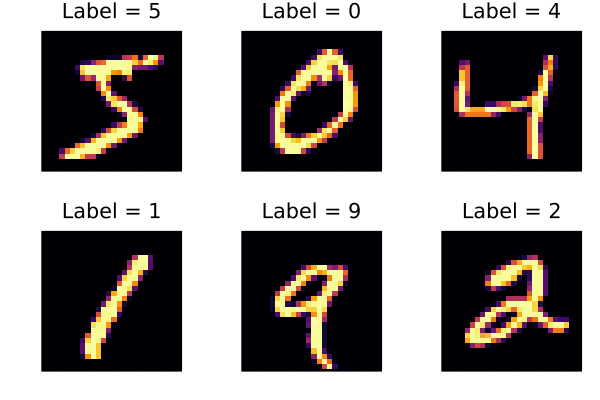

In [264]:
function plot_image(x::Matrix; kwargs...)
    return Plots.heatmap(
        x'[size(x, 1):-1:1, :];
        xlims = (1, size(x, 2)),
        ylims = (1, size(x, 1)),
        aspect_ratio = true,
        legend = false,
        xaxis = false,
        yaxis = false,
        kwargs...,
    )
end

function plot_image(instance::NamedTuple)
    return plot_image(instance.features; title = "Label = $(instance.targets)")
end

Plots.plot([plot_image(train_data[i]) for i in 1:6]...; layout = (2, 3))

## Training

We use a simple neural network with one hidden layer and a sigmoid activation
function. (There are better performing networks; try experimenting.)

In [265]:
predictor = Flux.Chain(
    Flux.Dense(28^2 => 32, Flux.sigmoid),
    Flux.Dense(32 => 10),
    Flux.softmax,
)

Chain(
  Dense(784 => 32, σ),                  # 25_120 parameters
  Dense(32 => 10),                      # 330 parameters
  NNlib.softmax,
)                   # Total: 4 arrays, 25_450 parameters, 99.664 KiB.

Here is a function to load our data into the format that `predictor` expects:

In [266]:
function data_loader(data; batchsize, shuffle = false)
    x = reshape(data.features, 28^2, :)
    y = Flux.onehotbatch(data.targets, 0:9)
    return Flux.DataLoader((x, y); batchsize, shuffle)
end

data_loader (generic function with 1 method)

and here is a function to score the percentage of correct labels, where we
assign a label by choosing the label of the highest `softmax` in the final
layer.

In [267]:
function score_model(predictor, data)
    x, y = only(data_loader(data; batchsize = length(data)))
    y_hat = predictor(x)
    is_correct = Flux.onecold(y) .== Flux.onecold(y_hat)
    p = round(100 * sum(is_correct) / length(is_correct); digits = 2)
    println("Accuracy = $p %")
    return
end

score_model (generic function with 1 method)

The accuracy of our model is only around 10% before training:

In [268]:
score_model(predictor, train_data)
score_model(predictor, test_data)

Accuracy = 9.75 %
Accuracy = 9.74 %


Let's improve that by training our model.

**Note**
It is not the purpose of this tutorial to explain how Flux works; see the documentation at https://fluxml.ai for more details. Changing the number of epochs or the learning rate can improve the loss.

In [269]:
begin
    train_loader = data_loader(train_data; batchsize = 256, shuffle = true)
    optimizer_state = Flux.setup(Flux.Adam(3e-4), predictor)
    for epoch in 1:30
        loss = 0.0
        for (x, y) in train_loader
            loss_batch, _gradient = Flux.withgradient(predictor) do model
                return Flux.crossentropy(model(x), y)
            end
            Flux.update!(optimizer_state, predictor, only(_gradient))
            loss += loss_batch
        end
        loss = round(loss / length(train_loader); digits = 4)
        print("Epoch $epoch: loss = $loss\t")
        score_model(predictor, test_data)
    end
end

Epoch 1: loss = 1.8358	Accuracy = 73.77 %
Epoch 2: loss = 1.1691	Accuracy = 83.34 %
Epoch 3: loss = 0.8644	Accuracy = 86.11 %
Epoch 4: loss = 0.6889	Accuracy = 87.78 %
Epoch 5: loss = 0.5777	Accuracy = 88.93 %
Epoch 6: loss = 0.5034	Accuracy = 89.54 %
Epoch 7: loss = 0.4505	Accuracy = 90.27 %
Epoch 8: loss = 0.4118	Accuracy = 90.62 %
Epoch 9: loss = 0.3824	Accuracy = 90.93 %
Epoch 10: loss = 0.3589	Accuracy = 91.21 %
Epoch 11: loss = 0.3396	Accuracy = 91.37 %
Epoch 12: loss = 0.3234	Accuracy = 91.7 %
Epoch 13: loss = 0.3097	Accuracy = 91.87 %
Epoch 14: loss = 0.2977	Accuracy = 91.96 %
Epoch 15: loss = 0.2874	Accuracy = 92.21 %
Epoch 16: loss = 0.2781	Accuracy = 92.39 %
Epoch 17: loss = 0.2698	Accuracy = 92.52 %
Epoch 18: loss = 0.2616	Accuracy = 92.71 %
Epoch 19: loss = 0.2545	Accuracy = 92.74 %
Epoch 20: loss = 0.248	Accuracy = 92.98 %
Epoch 21: loss = 0.242	Accuracy = 93.14 %
Epoch 22: loss = 0.236	Accuracy = 93.25 %
Epoch 23: loss = 0.2308	Accuracy = 93.32 %
Epoch 24: loss = 0.2255	

Here are the first eight predictions of the test data:

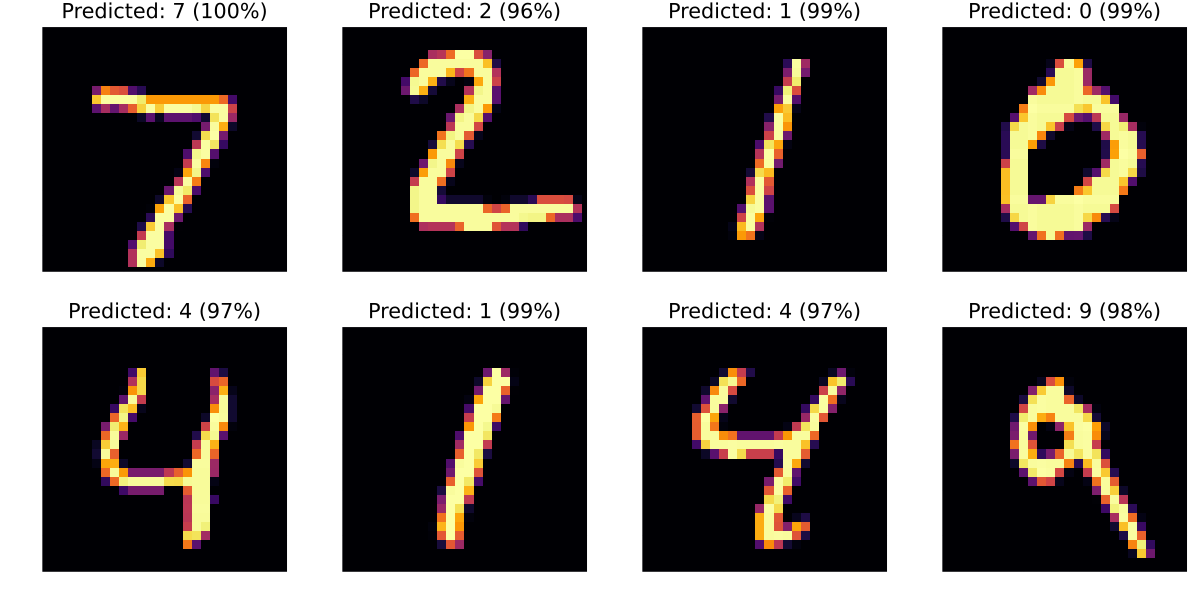

In [270]:
function plot_image(predictor, x::Matrix)
    score, index = findmax(predictor(vec(x)))
    title = "Predicted: $(index - 1) ($(round(Int, 100 * score))%)"
    return plot_image(x; title)
end

plots = [plot_image(predictor, test_data[i].features) for i in 1:8]
Plots.plot(plots...; size = (1200, 600), layout = (2, 4))

We can also look at the best and worst four predictions:

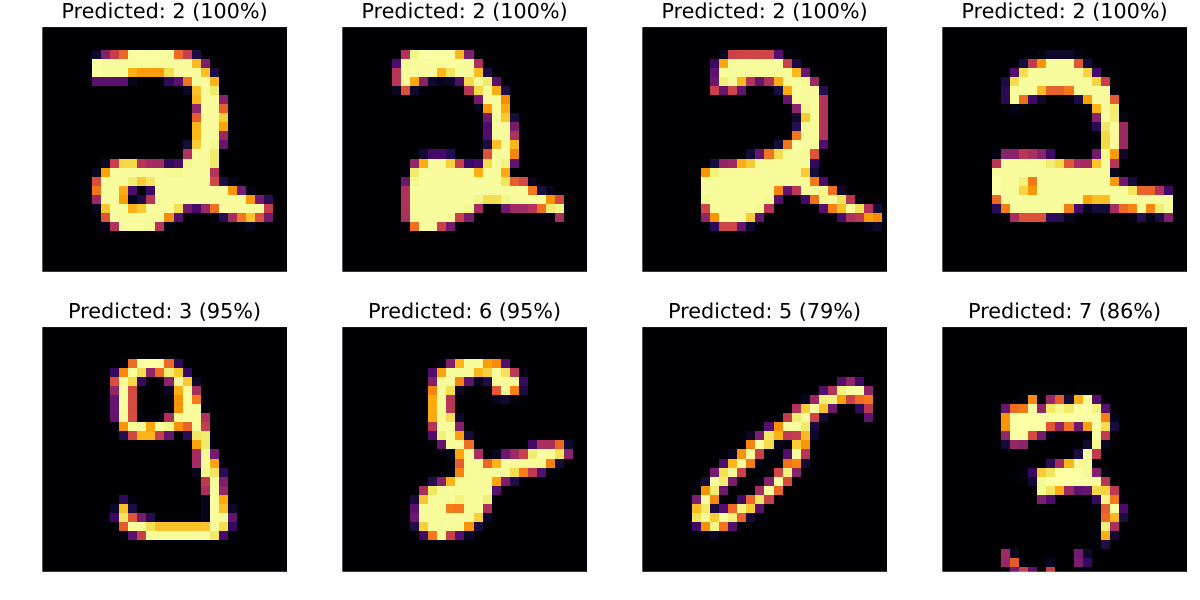

In [271]:
x, y = only(data_loader(test_data; batchsize = length(test_data)))
losses = Flux.crossentropy(predictor(x), y; agg = identity)
indices = sortperm(losses; dims = 2)[[1:4; end-3:end]]
plots = [plot_image(predictor, test_data[i].features) for i in indices]
Plots.plot(plots...; size = (1200, 600), layout = (2, 4))

There are still some fairly bad mistakes. Can you change the model or training
parameters improve to improve things?

## JuMP

Now that we have a trained machine learning model, we can embed it in a JuMP
model.

Here's a function which takes a test case and returns an example that
maximizes the probability of the adversarial example.

In [272]:
function find_adversarial_image(test_case; adversary_label, δ = 0.05)
    model = Model(Ipopt.Optimizer)
    set_silent(model)
    @variable(model, 0 <= x[1:28, 1:28] <= 1)
    @constraint(model, -δ .<= x .- test_case.features .<= δ)
    # Note: we need to use `vec` here because `x` is a 28-by-28 Matrix, but our
    # neural network expects a 28^2 length vector.
    y, _ = MathOptAI.add_predictor(model, predictor, vec(x))
    @objective(model, Max, y[adversary_label+1] - y[test_case.targets+1])
    optimize!(model)
    @assert is_solved_and_feasible(model)
    return value.(x)
end

find_adversarial_image (generic function with 1 method)

Let's try finding an adversarial example to the third test image. The image on
the left is our input image. The network thinks this is a `1` with probability
99%. The image on the right is the adversarial image. The network thinks this
is a `7`, although it is less confident.

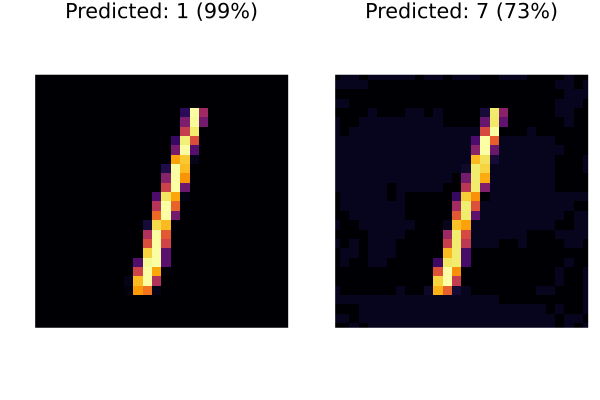

In [273]:
x_adversary = find_adversarial_image(test_data[3]; adversary_label = 7);
Plots.plot(
    plot_image(predictor, test_data[3].features),
    plot_image(predictor, Float32.(x_adversary)),
)

---

# DiffOpt.jl
## Differentiate you favorite optimization problems

In [274]:
using JuMP, DiffOpt, HiGHS

Create a model using the wrapper

In [275]:
model = Model(() -> DiffOpt.diff_optimizer(HiGHS.Optimizer))

A JuMP Model
├ solver: HiGHS
├ objective_sense: FEASIBILITY_SENSE
├ num_variables: 0
├ num_constraints: 0
└ Names registered in the model: none

Define your model and solve it

In [276]:
@variable(model, x)
p1 = 2
p2 = 5
@constraint(model, con, p1 * x >= 3 *p2)
@objective(model, Min, 2x)
optimize!(model)

Running HiGHS 1.8.0 (git hash: fcfb53414): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [2e+00, 2e+00]
  Cost   [2e+00, 2e+00]
  Bound  [0e+00, 0e+00]
  RHS    [2e+01, 2e+01]
Presolving model
0 rows, 0 cols, 0 nonzeros  0s
0 rows, 0 cols, 0 nonzeros  0s
Presolve : Reductions: rows 0(-1); columns 0(-1); elements 0(-1) - Reduced to empty
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Objective value     :  1.5000000000e+01
HiGHS run time      :          0.00


Choose the problem parameters to differentiate with respect to, and set their perturbations.

In [277]:
MOI.set(model, DiffOpt.ForwardConstraintFunction(), con, 1 * x + 0)

Differentiate the model

In [278]:
DiffOpt.forward_differentiate!(model)

fetch the gradients

In [279]:
MOI.get(model, DiffOpt.ForwardVariablePrimal(), x)

-3.75

x(p1, p2) = 3p2 / p1, hence dx/dp1 = - 3 * p2 / (p1 ^ 2)

In [280]:
- 3 * p2 / (p1 ^ 2)

-3.75

---

# Callbacks

References:
- https://jump.dev/JuMP.jl/stable/tutorials/linear/callbacks/
- https://jump.dev/JuMP.jl/stable/tutorials/algorithms/benders_decomposition/

In [281]:
using JuMP
import GLPK

function example_lazy_constraint()
    model = Model(GLPK.Optimizer)
    @variable(model, 0 <= x <= 2.5, Int)
    @variable(model, 0 <= y <= 2.5, Int)
    @objective(model, Max, y)
    lazy_called = false
    function my_callback_function(cb_data)
        lazy_called = true
        x_val = callback_value(cb_data, x)
        y_val = callback_value(cb_data, y)
        println("Called from (x, y) = ($x_val, $y_val)")
        status = callback_node_status(cb_data, model)
        if status == MOI.CALLBACK_NODE_STATUS_FRACTIONAL
            println(" - Solution is integer infeasible!")
        elseif status == MOI.CALLBACK_NODE_STATUS_INTEGER
            println(" - Solution is integer feasible!")
        else
            @assert status == MOI.CALLBACK_NODE_STATUS_UNKNOWN
            println(" - I don't know if the solution is integer feasible :(")
        end
        if y_val - x_val > 1 + 1e-6
            con = @build_constraint(y - x <= 1)
            println("Adding $(con)")
            MOI.submit(model, MOI.LazyConstraint(cb_data), con)
        elseif y_val + x_val > 3 + 1e-6
            con = @build_constraint(y + x <= 3)
            println("Adding $(con)")
            MOI.submit(model, MOI.LazyConstraint(cb_data), con)
        end
    end
    set_attribute(model, MOI.LazyConstraintCallback(), my_callback_function)
    optimize!(model)
    Test.@test is_solved_and_feasible(model)
    Test.@test lazy_called
    Test.@test value(x) == 1
    Test.@test value(y) == 2
    println("Optimal solution (x, y) = ($(value(x)), $(value(y)))")
    return
end

example_lazy_constraint()

Called from (x, y) = (0.0, 2.0)
 - Solution is integer feasible!
Adding ScalarConstraint{AffExpr, MathOptInterface.LessThan{Float64}}(y - x, MathOptInterface.LessThan{Float64}(1.0))
Called from (x, y) = (1.0, 2.0)
 - Solution is integer feasible!
Optimal solution (x, y) = (1.0, 2.0)


---

# The End